# 1 - analyse exploratoire des données (non cleané)
---

**Schéma de la base de données Olist**

![Data schema](https://i.imgur.com/HRhd2Y0.png)

**Imports des données**

In [58]:
import datetime as dt
import numpy as np
import json
import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df_customers = pd.read_csv("data/olist_customers_dataset.csv")
df_geolocalisation = pd.read_csv("data/olist_geolocation_dataset.csv")
df_order_items = pd.read_csv("data/olist_order_items_dataset.csv")
df_order_payments = pd.read_csv("data/olist_order_payments_dataset.csv")
df_order_reviews = pd.read_csv("data/olist_order_reviews_dataset.csv")
df_orders = pd.read_csv("data/olist_orders_dataset.csv")
df_products = pd.read_csv("data/olist_products_dataset.csv")
df_sellers = pd.read_csv("data/olist_sellers_dataset.csv")
df_translation = pd.read_csv("data/product_category_name_translation.csv")

**import fonctions pour exploration**

In [59]:
from math import ceil, sqrt, floor, pow


# Retourne un nombre x  de couleurs avec un espacement homogene contenus dans une colormap
def get_colors_from_listedcolormap(colormap, x):
    colors = []
    for i in range(0, x):
        if x < 2:
            y = 1
        else:
            y = i / (x - 1)
        colors.append(COLORMAP.colors[floor((COLORMAP.N - 1) * y)])
    return colors


# Retourne l'ensemble des labels du dataframe pour un certain dtype
def get_set_of_labels(dataframe, dtype):
    return {index for index, value in dataframe.dtypes.items() if value == dtype}


# Genere une grille carrée d'histogramme pour chaque variables de type dtype
def plot_sghisto(dataframe, dtype, color="", max_items=100, labels=[], title=""):
    if not labels:
        if dtype == "all":
            labels = dataframe.columns.values
        elif dtype == "numbers":
            labels = get_set_of_labels(dataframe, "float64")
            labels = labels.union(get_set_of_labels(dataframe, "int64"))
        else:
            labels = get_set_of_labels(dataframe, dtype)

    labels_length = len(labels)
    dimension = ceil(sqrt(labels_length))
    dimension2 = int(pow(dimension, 2))
    fig, axs = plt.subplots(dimension, dimension, figsize=(30, 30))
    fig.suptitle(title, fontsize=32, x=0.5, y=0.95)

    for i, value in enumerate(labels, start=0):
        x = floor(i / dimension)
        y = i - x * dimension
        if dataframe[value].dtype == "object":
            df_index = dataframe[value].value_counts().index[:max_items]
            df_temp = dataframe[dataframe[value].isin(df_index.values)]
            sns.histplot(
                data=df_temp, x=value, color=color, discrete=True, ax=axs[x, y]
            )
            ax = axs[x, y]
            ax.set_xticklabels([])
        if dataframe[value].dtype == "float64" or dataframe[value].dtype == "int64":
            sns.histplot(data=dataframe, x=value, color=color, ax=axs[x, y])
        ax = axs[x, y]
        ax.set_xlabel(f"{value[0:15]}", fontdict={"fontsize": 18})
        ax.set_ylabel("")

    if dimension2 > labels_length:
        for i in range(labels_length, dimension2):
            x = floor(i / dimension)
            y = i - x * dimension
            axs[x, y].remove()


# Mes couleurs
COLORMAP = sns.color_palette("plasma", as_cmap=True)
COLORS = get_colors_from_listedcolormap(COLORMAP, 5)
COLOR_PRIMARY = COLORS[0]
COLOR_SECONDARY = COLORS[1]
COLOR_TERTIARY = COLORS[4]
COLOR_QUATERNARY = COLORS[2]
COLOR_QUINARY = COLORS[3]

**Parametres divers**

In [60]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_colwidth", 100)
pd.set_option("precision", 3)

**Observer les données**

In [61]:
df_customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
35730,ba7ba28196d8d587efb0976309c93928,14f66befd4b75f7d7340cd3985615cb2,15750,santa albertina,SP
41346,84f36629aa4682f9f544a5c842ebca24,403e1f2bcf10b3cbb11f8573c7ecc5c2,32013,contagem,MG
32596,6d41885118d1c89e00b8a67eb3e74653,d518dd49354820d1ad430f1494afd415,5577,sao paulo,SP
60084,1e8e1c62473f56df55197028a8b67324,eeb1bee15691f9dba515e9bac3b75a7a,8226,sao paulo,SP
93670,dca4146c656edd385afbab8f8e1462b1,f80242bdb5b97002ad7a221092503c3d,99040,passo fundo,RS


In [62]:
df_geolocalisation.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
36848,2862,-23.475,-46.681,sao paulo,SP
339668,14780,-20.558,-48.568,barretos,SP
425774,21235,-22.840,-43.326,rio de janeiro,RJ
875342,85603,-26.048,-53.045,francisco beltrao,PR
820606,78060,-15.611,-56.073,cuiaba,MT


In [63]:
df_order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
77641,b0ba58e96fcf1892b604e398e472af5e,1,53796f826946f6d820d4cf700e2047ef,3da38366e7bd9baf6369071f782ecdf0,2018-01-11 02:37:56,59.47,26.96
87371,c6657be5ece0d6d8475923eabe5b65e7,1,ba4a91633739ceceb2b73b627e2cfbc3,7c67e1448b00f6e969d365cea6b010ab,2017-12-22 04:09:17,139.99,28.34
38851,584fa640e7dbb97b52206a50abfa4d0a,1,3a7c9b0413d7b9cc7f4a18318fc5afb3,7a67c85e85bb2ce8582c35f2203ad736,2017-09-28 12:05:15,129.99,18.16
20360,2eac75a073b158b0cc84863c566300b2,1,42a2c92a0979a949ca4ea89ec5c7b934,813348c996469b40f2e028d5429d3495,2017-06-28 02:15:25,59.90,14.13
87359,c65d58d799052b1354bb0a7063b29621,1,5b226d7c52f86ac72457617f78cff95d,1835b56ce799e6a4dc4eddc053f04066,2018-06-11 03:35:15,80.00,23.14


In [64]:
df_order_payments.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
77395,4020cb1ac77d7c6009ac62522296521b,1,credit_card,6,355.98
8028,0c17d2ca8fea3e6d807410a0c0c44746,1,credit_card,4,241.25
34652,f5e9edb4041a4f6ddaac3851ae7992ee,1,debit_card,1,33.37
70574,3456e4510b8dbddfb1d17d38deb2bbe6,1,credit_card,1,58.71
32710,e0bd62e007e5e88656338ab10a5c0f42,4,voucher,1,0.48


In [65]:
df_order_reviews.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
74978,2c504615ce5bd2e3aa83c2bb39f47256,3f72f100dae2b5099ad6e5a486e95ec0,3,NaN,Ainda aguardando o produto,2018-03-24 00:00:00,2018-03-28 11:03:24
61660,62f1806ff8356054734d2f8b7d1bbf8e,9b110bcfcede60b4891f99a5b7578f74,5,NaN,excelente indico para todos\r\n,2018-04-20 00:00:00,2018-04-24 15:55:55
44855,def23945f7b56830fbb597f2d66c9ee8,b0824d7e22fb8f487be1f22753268ce2,5,NaN,NaN,2018-02-23 00:00:00,2018-02-26 00:31:32
36924,e024021e0e4ff459122c700657007ccd,18bf036204cea32b152a8e2a2f2bab40,5,NaN,NaN,2017-05-16 00:00:00,2017-05-18 12:15:58
21495,11ef0a68b4f16f04e4ca18c6977b719e,f72322b96b8a40b181a18018f99d72a4,1,NaN,"Moito imatura essa loja, não cumpre com seus clientes o que promete, atraso e ainda cobra um fre...",2017-09-10 00:00:00,2017-09-12 09:59:31


In [66]:
# Plusieurs notes pour la même commande
df_order_reviews[df_order_reviews["order_id"] == "03c939fd7fd3b38f8485a0f95798f1f6"]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
8329,b04ed893318da5b863e878cd3d0511df,03c939fd7fd3b38f8485a0f95798f1f6,3,NaN,"Um ponto negativo que achei foi a cobrança de 3 taxas de entregas, sendo que comprei os 3 produt...",2018-03-20 00:00:00,2018-03-21 02:28:23
51931,f4bb9d6dd4fb6dcc2298f0e7b17b8e1e,03c939fd7fd3b38f8485a0f95798f1f6,4,NaN,NaN,2018-03-29 00:00:00,2018-03-30 00:29:09
70005,405eb2ea45e1dbe2662541ae5b47e2aa,03c939fd7fd3b38f8485a0f95798f1f6,3,NaN,Seria ótimo se tivesem entregue os 3 (três) pedidos de uma única vez.,2018-03-06 00:00:00,2018-03-06 19:50:32


In [67]:
df_orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
33457,dcd8ae10d3d29ae2ef27cbe41848380b,37249a38bb2565aabae11a5b88e409d5,delivered,2018-03-22 13:37:34,2018-03-22 13:55:34,2018-03-23 00:53:48,2018-03-23 19:23:03,2018-04-04 00:00:00
53413,742bb86f369fadd10d68946fd903aaed,acebd967d532546739f68217c058b29b,delivered,2017-08-31 10:28:39,2017-08-31 19:55:12,2017-09-01 21:22:33,2017-09-05 18:43:04,2017-09-13 00:00:00
56388,502b66ddeae1875100eae9074f5d189a,e0d0e51f1bc61b27465dd7c88d25874d,delivered,2017-11-03 21:22:38,2017-11-03 21:35:23,2017-11-16 20:21:36,2017-11-22 20:14:40,2017-11-27 00:00:00
78023,c05d6a79e55da72ca780ce90364abed9,3b54b5978e9ace64a63f90d176ffb158,delivered,2018-05-13 13:05:02,2018-05-13 13:33:22,2018-05-14 15:17:00,2018-05-15 19:37:06,2018-05-24 00:00:00
19430,f371dc0b3fbb3fad54484f71ccbd0cc6,741488a61f59b1f0a0e02501db47fd8e,delivered,2018-02-14 08:06:02,2018-02-14 08:15:29,2018-02-15 21:11:51,2018-02-20 23:03:07,2018-02-26 00:00:00


In [68]:
df_products.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
20499,375e5a8fcf452959ad89ad40ea2839aa,utilidades_domesticas,40.0,649.0,1.0,200.0,22.0,13.0,23.0
9924,a7868f5ae25dcf473c8997f82cfd06a3,esporte_lazer,49.0,210.0,5.0,150.0,20.0,4.0,15.0
4998,a037c98ed926711d7513cf779d788536,ferramentas_jardim,43.0,1183.0,1.0,250.0,30.0,6.0,11.0
14295,9ee8f71db966916c4bc13c3ede22c146,telefonia,55.0,679.0,3.0,150.0,17.0,8.0,11.0
8483,c169014808557ef3fc3783ac1e02c0d8,moveis_escritorio,39.0,2268.0,1.0,11950.0,58.0,28.0,58.0


In [69]:
df_sellers.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1897,b64d51f0435e884e8de603b1655155ae,7077,garulhos,SP
2252,ea4e9ce63a2134743b4a92777437fcdd,88135,palhoca,SC
2480,6624bc09786f0e41ae48dfc5eeb1a9e2,30390,belo horizonte,MG
1493,1127b7f2594683f2510f1c2c834a486b,13087,campinas,SP
720,4a1917ef994878940e1fb03eeb787ad7,70610,brasilia,DF


In [70]:
df_translation.sample(5)

,product_category_name,product_category_name_english
22,cool_stuff,cool_stuff
40,casa_construcao,home_construction
66,flores,flowers
33,eletrodomesticos,home_appliances
13,tablets_impressao_imagem,tablets_printing_image


**Création d'un dictionnaire contenant les dataframes**

In [71]:
names_dataframes = [
    "df_customers",
    "df_geolocalisation",
    "df_order_items",
    "df_order_payments",
    "df_order_reviews",
    "df_orders",
    "df_products",
    "df_sellers",
    "df_translation",
]

dict_dataframes = {name: eval(name) for name in names_dataframes}

**Informations sur l'ensemble des dataframes**

In [72]:
def info(dict_dataframes):
    df_info = pd.DataFrame({})
    df_info["dataframe"] = [k for k in dict_dataframes.keys()]
    df_info["n_rows"] = [v.shape[0] for v in dict_dataframes.values()]
    df_info["n_cols"] = [v.shape[1] for v in dict_dataframes.values()]
    df_info["null_amount"] = [v.isnull().sum().sum() for v in dict_dataframes.values()]
    df_info["qty_null_columns"] = [
        len([col for col, null in v.isnull().sum().items() if null > 0])
        for v in dict_dataframes.values()
    ]
    df_info["null_columns"] = [
        ", ".join([col for col, null in v.isnull().sum().items() if null > 0])
        for v in dict_dataframes.values()
    ]

    return df_info

In [73]:
info(dict_dataframes)

,dataframe,n_rows,n_cols,null_amount,qty_null_columns,null_columns
0,df_customers,99441,5,0,0,
1,df_geolocalisation,1000163,5,0,0,
2,df_order_items,112650,7,0,0,
3,df_order_payments,103886,5,0,0,
4,df_order_reviews,100000,7,146532,2,"review_comment_title, review_comment_message"
5,df_orders,99441,8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,df_products,32951,9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, prod..."
7,df_sellers,3095,4,0,0,
8,df_translation,71,2,0,0,


**Identifier les valeurs manquantes pour chaques dataframes**

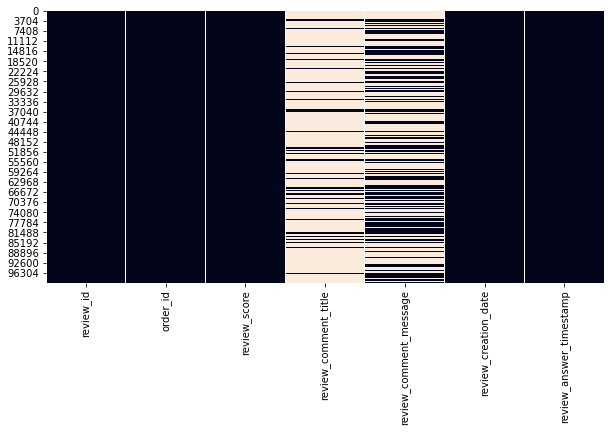

In [74]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_order_reviews.isna(), cbar=False)
plt.show()

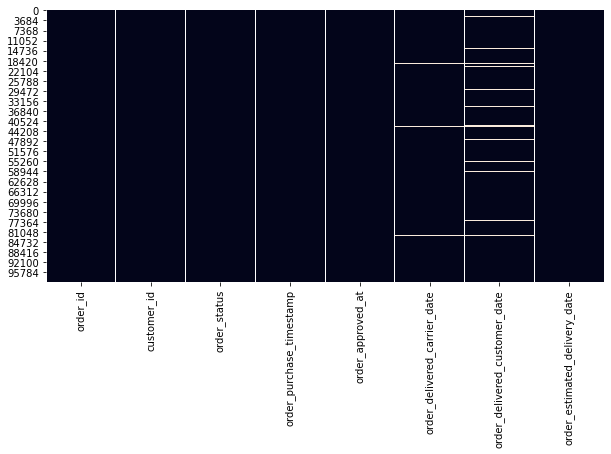

In [75]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_orders.isna(), cbar=False)
plt.show()

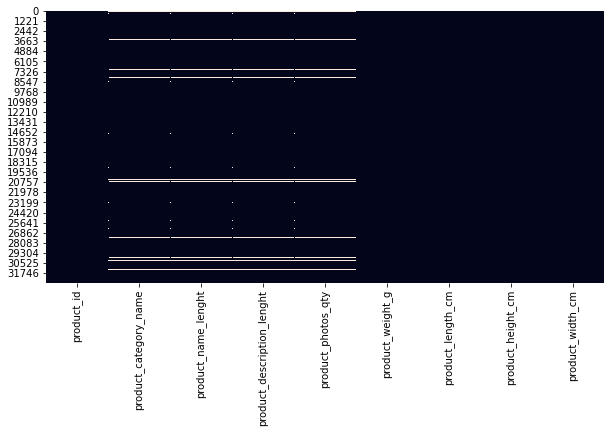

In [76]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_products.isna(), cbar=False)
plt.show()

**Informations sur toutes les colonnes des dataframes**

In [77]:
def overview(name, dataframe):
    df_overview = pd.DataFrame({})

    df_overview["dataframe"] = [name for col in dataframe.columns]
    df_overview["column"] = [col for col in dataframe.columns]
    df_overview["qty_null_column"] = [
        dataframe[col].isna().sum() for col in dataframe.columns
    ]
    df_overview["percent_null"] = (
        df_overview["qty_null_column"] / dataframe.shape[0] * 100.00
    )
    df_overview["dtype"] = [dtype for dtype in dataframe.dtypes]
    df_overview["qty_category_unique"] = [
        len(dataframe[col].value_counts()) for col in dataframe.columns
    ]

    return df_overview

In [78]:
def overview_dict(dict_dataframes):
    df_overview_agg = pd.DataFrame({})

    for name, df in dict_dataframes.items():
        df_overview_agg = df_overview_agg.append(overview(name, df), ignore_index=True)

    return df_overview_agg

In [79]:
overview_dict(dict_dataframes)

,dataframe,column,qty_null_column,percent_null,dtype,qty_category_unique
0,df_customers,customer_id,0,0.0,object,99441
1,df_customers,customer_unique_id,0,0.0,object,96096
2,df_customers,customer_zip_code_prefix,0,0.0,int64,14994
3,df_customers,customer_city,0,0.0,object,4119
4,df_customers,customer_state,0,0.0,object,27
...,...,...,...,...,...,...
47,df_sellers,seller_zip_code_prefix,0,0.0,int64,2246
48,df_sellers,seller_city,0,0.0,object,611
49,df_sellers,seller_state,0,0.0,object,23
50,df_translation,product_category_name,0,0.0,object,71


**Gestion des doublons**

In [80]:
for name, df in dict_dataframes.items():
    print(name, " : ", df.duplicated().sum())

df_customers  :  0
df_geolocalisation  :  261831
df_order_items  :  0
df_order_payments  :  0
df_order_reviews  :  0
df_orders  :  0
df_products  :  0
df_sellers  :  0
df_translation  :  0


In [81]:
df_geolocalisation.drop_duplicates(inplace=True)

**Gestion des valeurs manquantes**

In [82]:
df_order_reviews["review_comment_title"].fillna(" ", inplace=True)
df_order_reviews["review_comment_message"].fillna(" ", inplace=True)

df_orders["order_approved_at"].fillna(0, inplace=True)
df_orders["order_delivered_carrier_date"].fillna(0, inplace=True)
df_orders["order_delivered_customer_date"].fillna(0, inplace=True)

df_products["product_category_name"].fillna("desconhecido", inplace=True)
df_products["product_name_lenght"].fillna(0, inplace=True)
df_products["product_description_lenght"].fillna(0, inplace=True)
df_products["product_photos_qty"].fillna(0, inplace=True)
df_products["product_weight_g"].fillna(0, inplace=True)
df_products["product_length_cm"].fillna(0, inplace=True)
df_products["product_height_cm"].fillna(0, inplace=True)
df_products["product_width_cm"].fillna(0, inplace=True)

**Ajout de valeur pour translation de catégories**

In [83]:
row_1 = dict(
    product_category_name="desconhecido", product_category_name_english="unknown"
)
row_2 = dict(
    product_category_name="portateis_cozinha_e_preparadores_de_alimentos",
    product_category_name_english="small_appliances",
)
row_3 = dict(product_category_name="pc_gamer", product_category_name_english="pc_gamer")
df_translation = df_translation.append([row_1, row_2, row_3], ignore_index=True)

**Gestion des types / Convertir les timestamps**

In [84]:
columns_orders_ts = [
    "order_purchase_timestamp",
    "order_delivered_customer_date",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_estimated_delivery_date",
]
for col in columns_orders_ts:
    df_orders[col] = pd.to_datetime(df_orders[col], errors="coerce")

In [85]:
df_orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
57515,b41c58f1cdb089998bf02e8fae313c90,0efd4ac57927695b9fbfbd8780d70f23,delivered,2018-02-15 15:18:37,2018-02-16 17:35:29,2018-02-19 23:23:19,2018-03-20 17:38:51,2018-03-26
2859,ddf574153803a9012e68e479fa941b0f,84f9776d9f55cb53b6690857744ca1ba,delivered,2018-04-04 21:40:03,2018-04-04 21:55:21,2018-04-05 23:06:40,2018-04-21 06:19:16,2018-04-26
10473,f2eabb23f8f91015f9478076d73ba8f2,688289582ad02e4b73a07f629d7ddd22,delivered,2017-06-27 23:21:05,2017-06-27 23:35:12,2017-06-28 11:19:00,2017-06-30 13:03:09,2017-07-10
25111,5635c4d926a70f077059cfbc66700181,73a888920ff9b346bdee4b1fdccde84f,delivered,2017-05-12 12:16:26,2017-05-12 13:06:35,2017-05-13 10:12:09,2017-05-23 14:26:38,2017-06-01
60571,04f026e6517b3845e4ea1a9d0328adfc,d6f6a039d3fcbeb5392bd0739b5e1833,delivered,2018-04-18 11:12:39,2018-04-18 11:31:41,2018-04-18 22:11:47,2018-04-24 13:48:51,2018-05-08


**Verification valeurs manquantes et types**

In [86]:
overview_dict(dict_dataframes)

,dataframe,column,qty_null_column,percent_null,dtype,qty_category_unique
0,df_customers,customer_id,0,0.0,object,99441
1,df_customers,customer_unique_id,0,0.0,object,96096
2,df_customers,customer_zip_code_prefix,0,0.0,int64,14994
3,df_customers,customer_city,0,0.0,object,4119
4,df_customers,customer_state,0,0.0,object,27
...,...,...,...,...,...,...
47,df_sellers,seller_zip_code_prefix,0,0.0,int64,2246
48,df_sellers,seller_city,0,0.0,object,611
49,df_sellers,seller_state,0,0.0,object,23
50,df_translation,product_category_name,0,0.0,object,71


### 1) traitement et assemblage pour segmentation RFM - 3 dimensions  

RFM signifie Récence, Fréquence et Monétaire. Il s'agit d'une technique de segmentation des clients qui utilise le comportement d'achat passé pour diviser les clients en groupes.
On va donc s'interesser a :

-df_orders   
-df_order_payments   
-df_customers pour obtenir les id de clients uniques

**copie**

In [30]:
df_customers_c = df_customers.copy()
df_orders_c = df_orders.copy()
df_order_payments_c = df_order_payments.copy()

**merge df_orders / df_customers**

In [31]:
df_orders_c = df_orders_c.merge(
    df_customers_c, how="left", left_on="customer_id", right_on="customer_id"
)

In [32]:
df_orders_c = df_orders_c.drop(
    ["customer_zip_code_prefix", "customer_city", "customer_state"], axis=1
)

**visualisation des distributions**

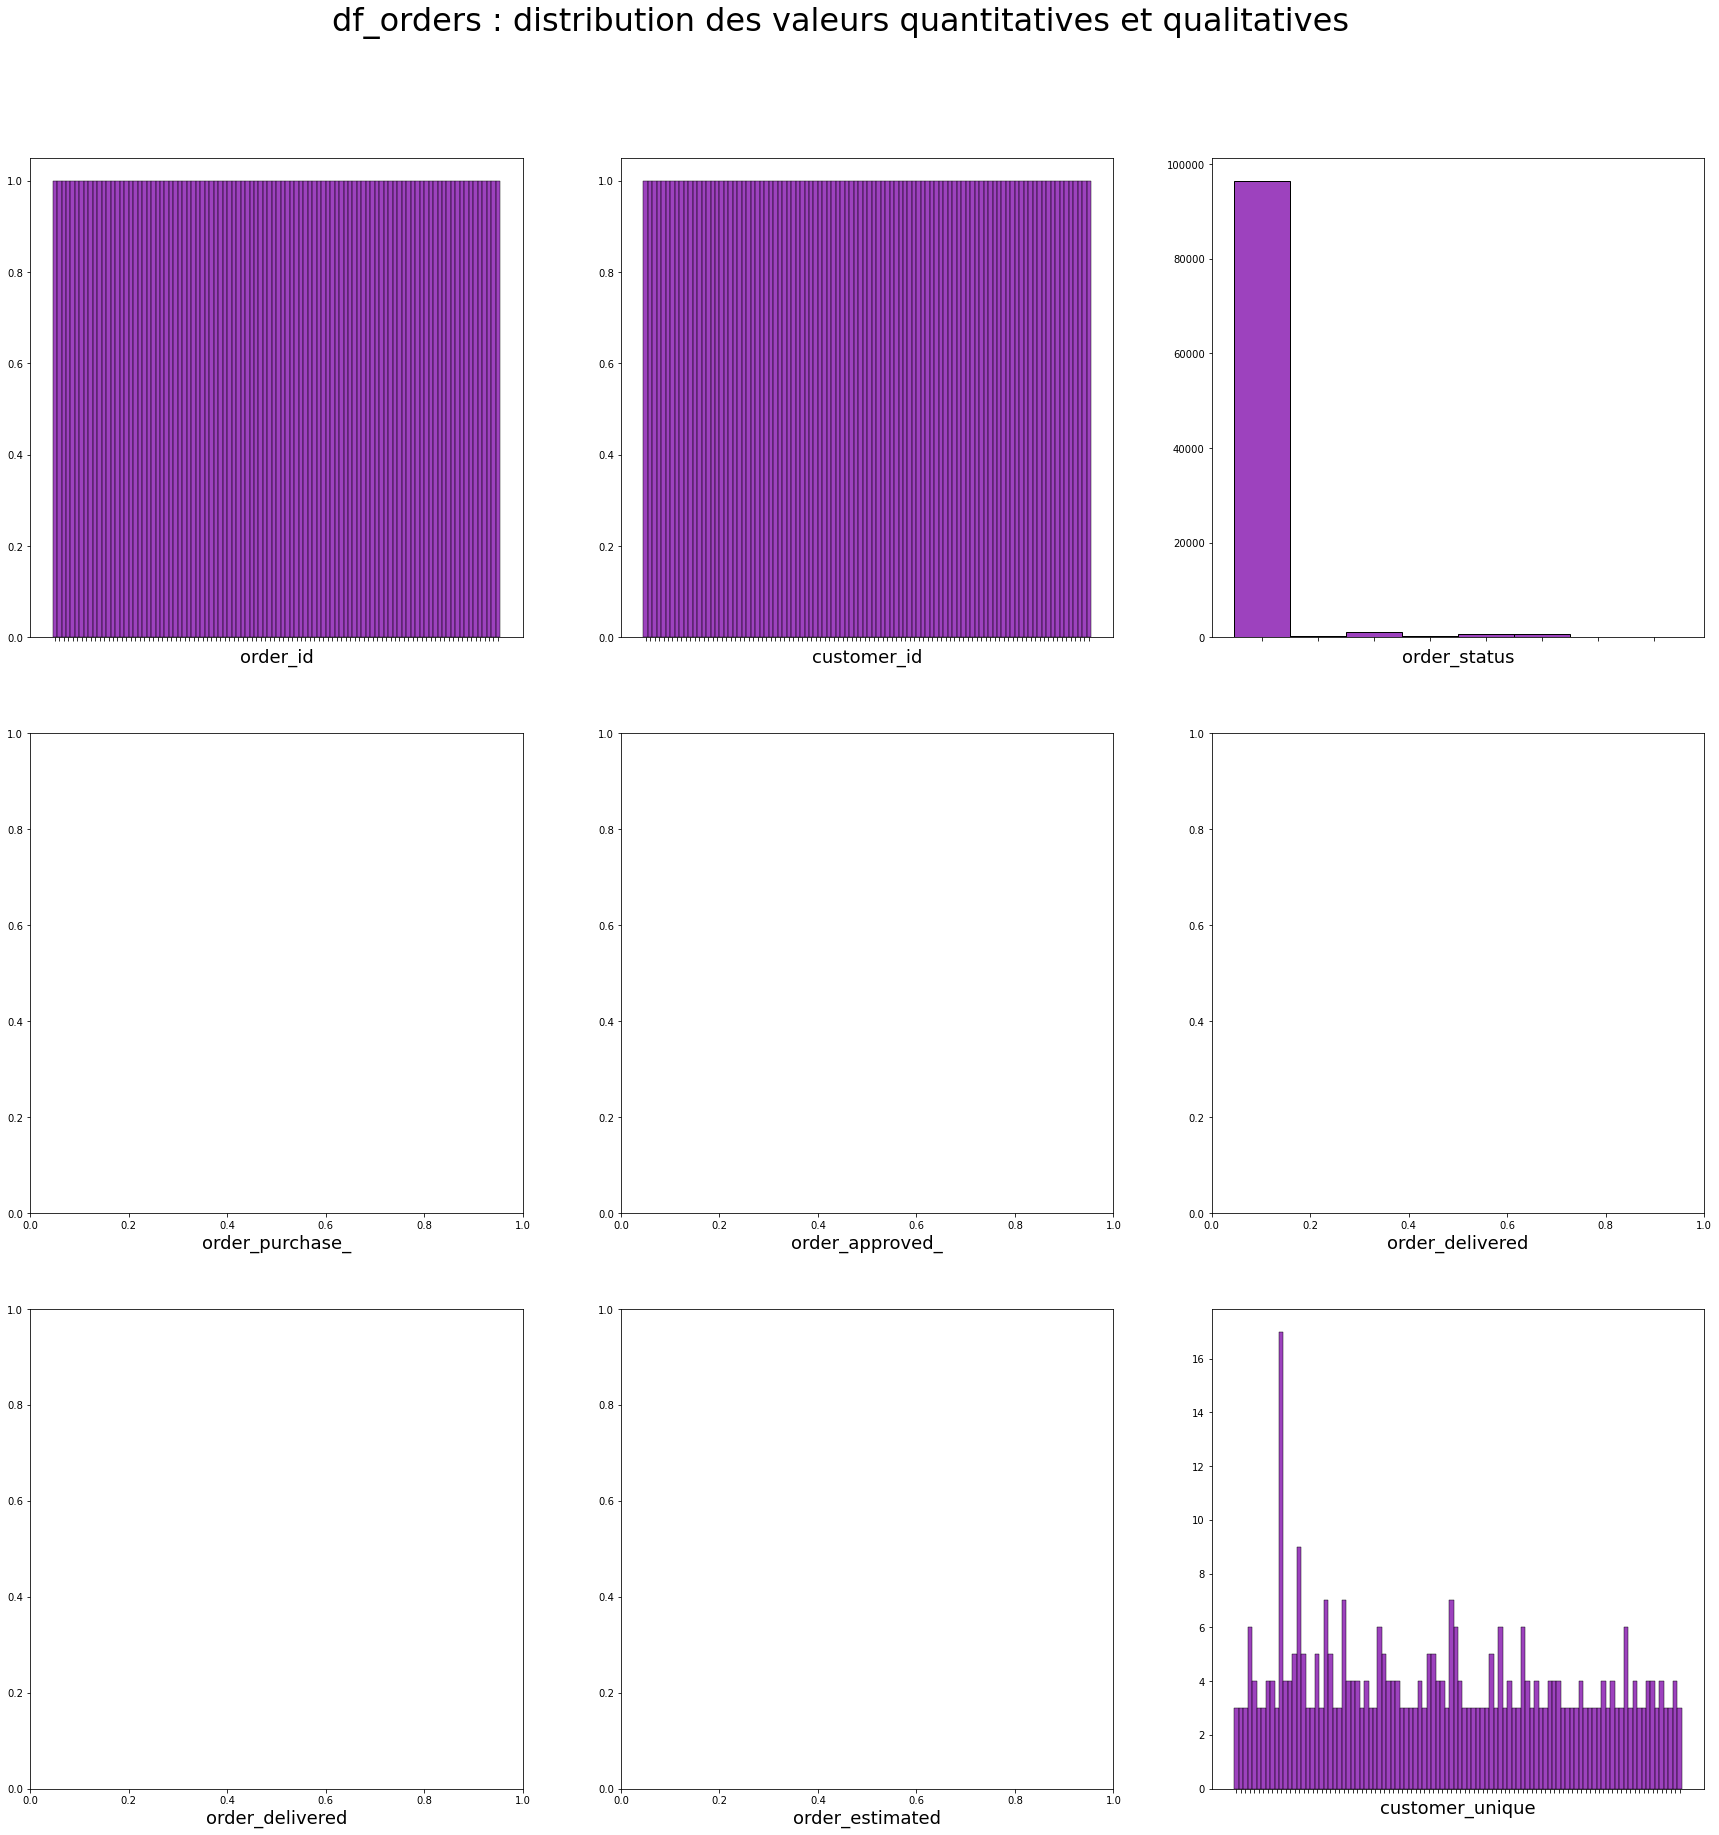

In [33]:
plot_sghisto(
    df_orders_c,
    dtype="all",
    title="df_orders : distribution des valeurs quantitatives et qualitatives",
    color=COLOR_SECONDARY,
)

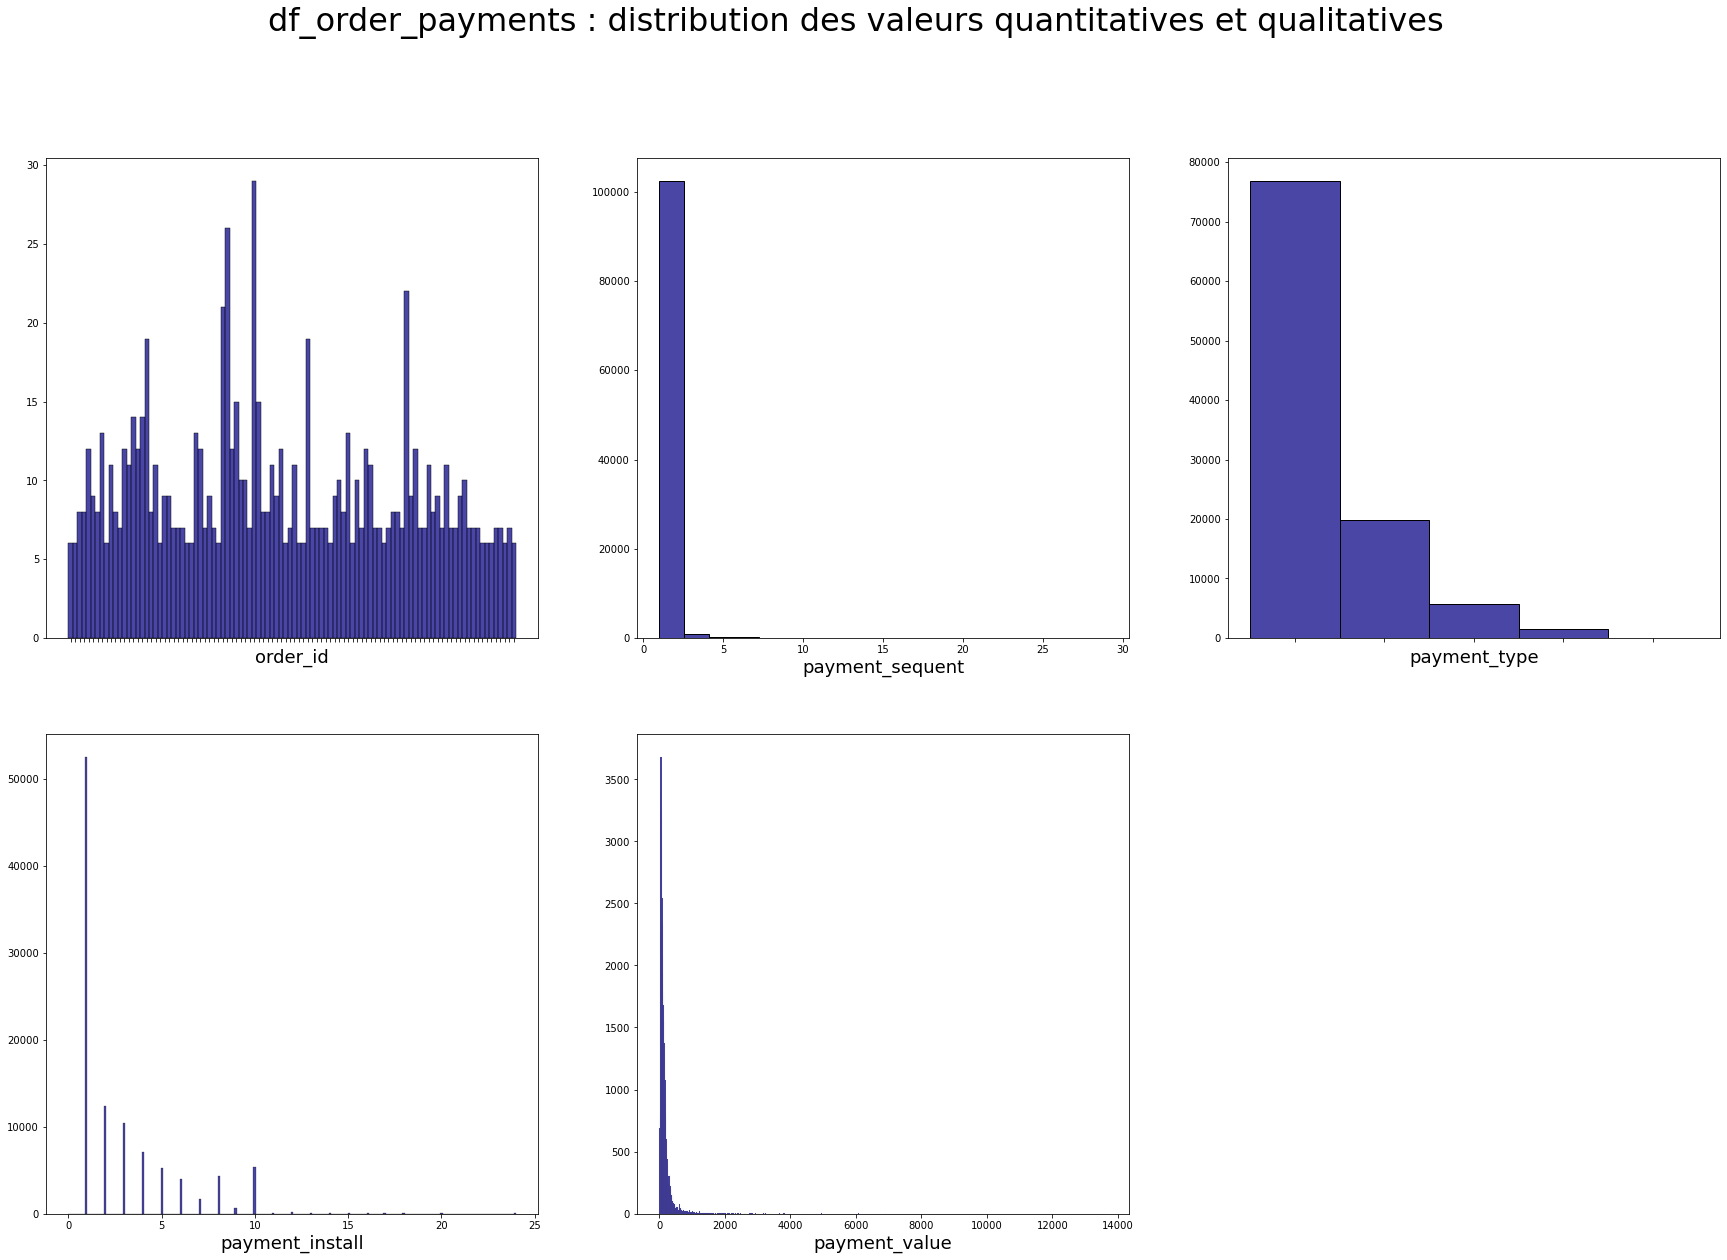

In [34]:
plot_sghisto(
    df_order_payments_c,
    dtype="all",
    title="df_order_payments : distribution des valeurs quantitatives et qualitatives",
    color=COLOR_PRIMARY,
)

**merge df_orders / df_order_payments**

In [35]:
df_rfm = df_orders_c.merge(
    df_order_payments_c, how="left", left_on="order_id", right_on="order_id"
)

In [36]:
df_rfm["order_status"].value_counts()

delivered      100757
shipped          1166
canceled          664
unavailable       649
invoiced          325
processing        319
created             5
approved            2
Name: order_status, dtype: int64

In [37]:
df_rfm["order_id"].value_counts()

fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
8810a5e7c83bd0f3fd59dec5491fbb2f     1
f2ab21913f1fad01052d3a92b5be2b71     1
71035ba1aacb91b34786a7c4647e6486     1
42c45d946a9e7492bfa6da1ab459d23e     1
772e38d3917d94f38c6484dde513877f     1
Name: order_id, Length: 99441, dtype: int64

In [38]:
df_rfm.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,payment_sequential,payment_type,payment_installments,payment_value
71269,39863c5c4361d19d8c48522f77fb3bed,1a0b3aac9e3bb37ee6ecb39d97f5eaed,delivered,2017-07-25 13:52:07,2017-07-25 14:03:21,2017-07-28 19:26:42,2017-08-03 20:13:04,2017-08-16,7a443ff6dbc48349835cb18a9355ea1b,1.0,credit_card,3.0,34.30
82835,698642d4db0df8b8c4710af6bdff1acc,3920e62a14350104e67c0b4222cb8e26,delivered,2018-07-15 23:59:54,2018-07-16 00:15:20,2018-07-17 12:38:00,2018-07-30 16:26:37,2018-08-01,538cf24f0e8a9bbcefa7e0106591674d,1.0,credit_card,2.0,114.18
32626,22fe0bf39d80f86f5f4a106875e9adf9,9ca8d3e162050ac6598654057255a86c,delivered,2018-03-02 20:34:57,2018-03-03 20:30:32,2018-03-06 19:10:19,2018-03-16 15:26:50,2018-03-14,a2cb67b24e7062f1163616db07c065fe,5.0,voucher,1.0,8.85
93570,08724b06f2204993989fa6c331dfa3d6,b39f78012ca3eac8a5c46e5817b1c5bf,delivered,2018-05-29 18:02:38,2018-05-30 14:16:41,2018-06-06 11:26:00,2018-06-11 17:12:12,2018-07-03,c03e11c0a9a101516579db35234b1e8a,1.0,boleto,1.0,76.30
34185,4bbd33a0def862d1273f79f0fb4d597a,ba7e1e959b775b9f00b4dd4fc937d607,delivered,2018-06-12 09:15:43,2018-06-12 09:40:35,2018-06-15 14:43:00,2018-06-26 17:21:06,2018-07-11,bbc0f6a39f5276b4b836d70e8fa12ca0,1.0,credit_card,1.0,74.69
13374,f232f2ea81a3f61313f6bb0f759e624d,d1b373f540c9e9081095b729cb55e953,delivered,2017-06-13 18:15:36,2017-06-13 18:25:36,2017-06-14 16:04:11,2017-06-19 18:32:15,2017-07-06,f2fe22b3ba029cb104f5f306b4fb5310,1.0,credit_card,4.0,53.09
18215,5a45d91a6a45708d28e1f018a24a2607,919aa64a6d7c36fe7b543e67a44aa203,delivered,2018-04-21 18:35:45,2018-04-24 19:06:34,2018-04-23 17:27:42,2018-04-26 17:58:26,2018-05-21,b7ec380a938b8be3e45ab4d6871e3bcc,1.0,credit_card,2.0,109.59
83298,d6e4c66836507e15b054fd436417a9d0,30aa6e2e5bce6448ef6c3a0bfca52806,delivered,2017-10-17 10:04:01,2017-10-17 10:14:44,2017-10-19 20:53:03,2017-11-17 15:58:59,2017-11-10,db3d2c340a500126dec4308cee9135ae,1.0,credit_card,10.0,1040.01
53610,ff9150d22b184f4491b6732e1ca8d81e,6f54dde5119c6224620ffb20a6ceaa82,delivered,2017-03-03 10:11:03,2017-03-03 10:21:54,2017-03-13 08:08:34,2017-04-07 10:47:18,2017-04-03,c6d9f3a4efb8527f38533dd75805d9b0,1.0,credit_card,3.0,55.46
685,e6c3435aca88a50c893f06b6b13e9242,0dae7978fb6595f295dd3fd9ede02cda,delivered,2017-06-19 18:00:01,2017-06-19 18:10:19,2017-06-20 15:47:27,2017-06-26 16:21:57,2017-07-10,0dd47ea03f3e61825df9e2bc94c292f1,1.0,credit_card,6.0,64.39


**Traitement des ordres sans paiements**

In [39]:
df_rfm.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
payment_sequential               1
payment_type                     1
payment_installments             1
payment_value                    1
dtype: int64

In [40]:
df_rfm.dropna(inplace=True)

**Suppression des ordres non livrés**

In [41]:
df_rfm = df_rfm.loc[df_rfm["order_status"] == "delivered"]

In [42]:
df_rfm["order_status"].value_counts()

delivered    100756
Name: order_status, dtype: int64

In [43]:
df_rfm.shape

(100756, 13)

**Agrégation des données RFM**

In [44]:
# now = last date achat client
NOW = dt.datetime(2018, 10, 25)

df_rfm = df_rfm.groupby("customer_unique_id").agg(
    Recency=("order_purchase_timestamp", lambda x: (NOW - x.max()).days),
    Frequency=("order_id", lambda x: len(x)),
    MonetaryValue=("payment_value", "sum"),
)

In [45]:
df_rfm.sample(10)

,Recency,Frequency,MonetaryValue
customer_unique_id,,,
628c60c3fafec90dacf2ea3618519d3a,170,1,126.66
a5691fa7bd4401e76eb85545f64dfa07,469,1,368.75
be0606f39c5d49fbc9ca5192e174a4b3,88,1,143.82
a8ef0f94947717fb147de01ba6ab13f1,241,1,31.09
7dd163b8e3d4e09daa9e16091dd6dd26,175,1,271.24
6627561739ed1d8426400696df79f653,306,1,248.36
adb179736cd012663455d999399bd2b5,420,1,133.05
69d5451bdb58302b28ba780ae9f2ef5d,243,1,78.09
ff2879fe71a6d417933aa4ecc6ea8754,284,1,172.81


In [46]:
# 94% des clients ne passent qu'un seul ordre
df_rfm.describe(percentiles=[0.94])

,Recency,Frequency,MonetaryValue
count,93357.000,93357.000,93357.000
mean,293.474,1.079,165.199
std,152.588,0.449,226.315
min,56.000,1.000,9.590
50%,274.000,1.000,107.780
94%,563.000,1.000,419.060
max,751.000,33.000,13664.080


**Filtre outliers zscore 3std**

In [47]:
df_rfm.shape

(93357, 3)

In [48]:
# Kmeans sensible outliers, meilleure visualisation en 3d
zscore = stats.zscore(df_rfm["MonetaryValue"])
df_rfm = df_rfm.loc[zscore < 3]

In [49]:
# Vérification du nombre de lignes supprimées
df_rfm.shape

(91743, 3)

**Visualisation avant export**

Manifestement il n'y a presque que des clients avec une seule commande, le jeu de données parait anormal ou biaisé

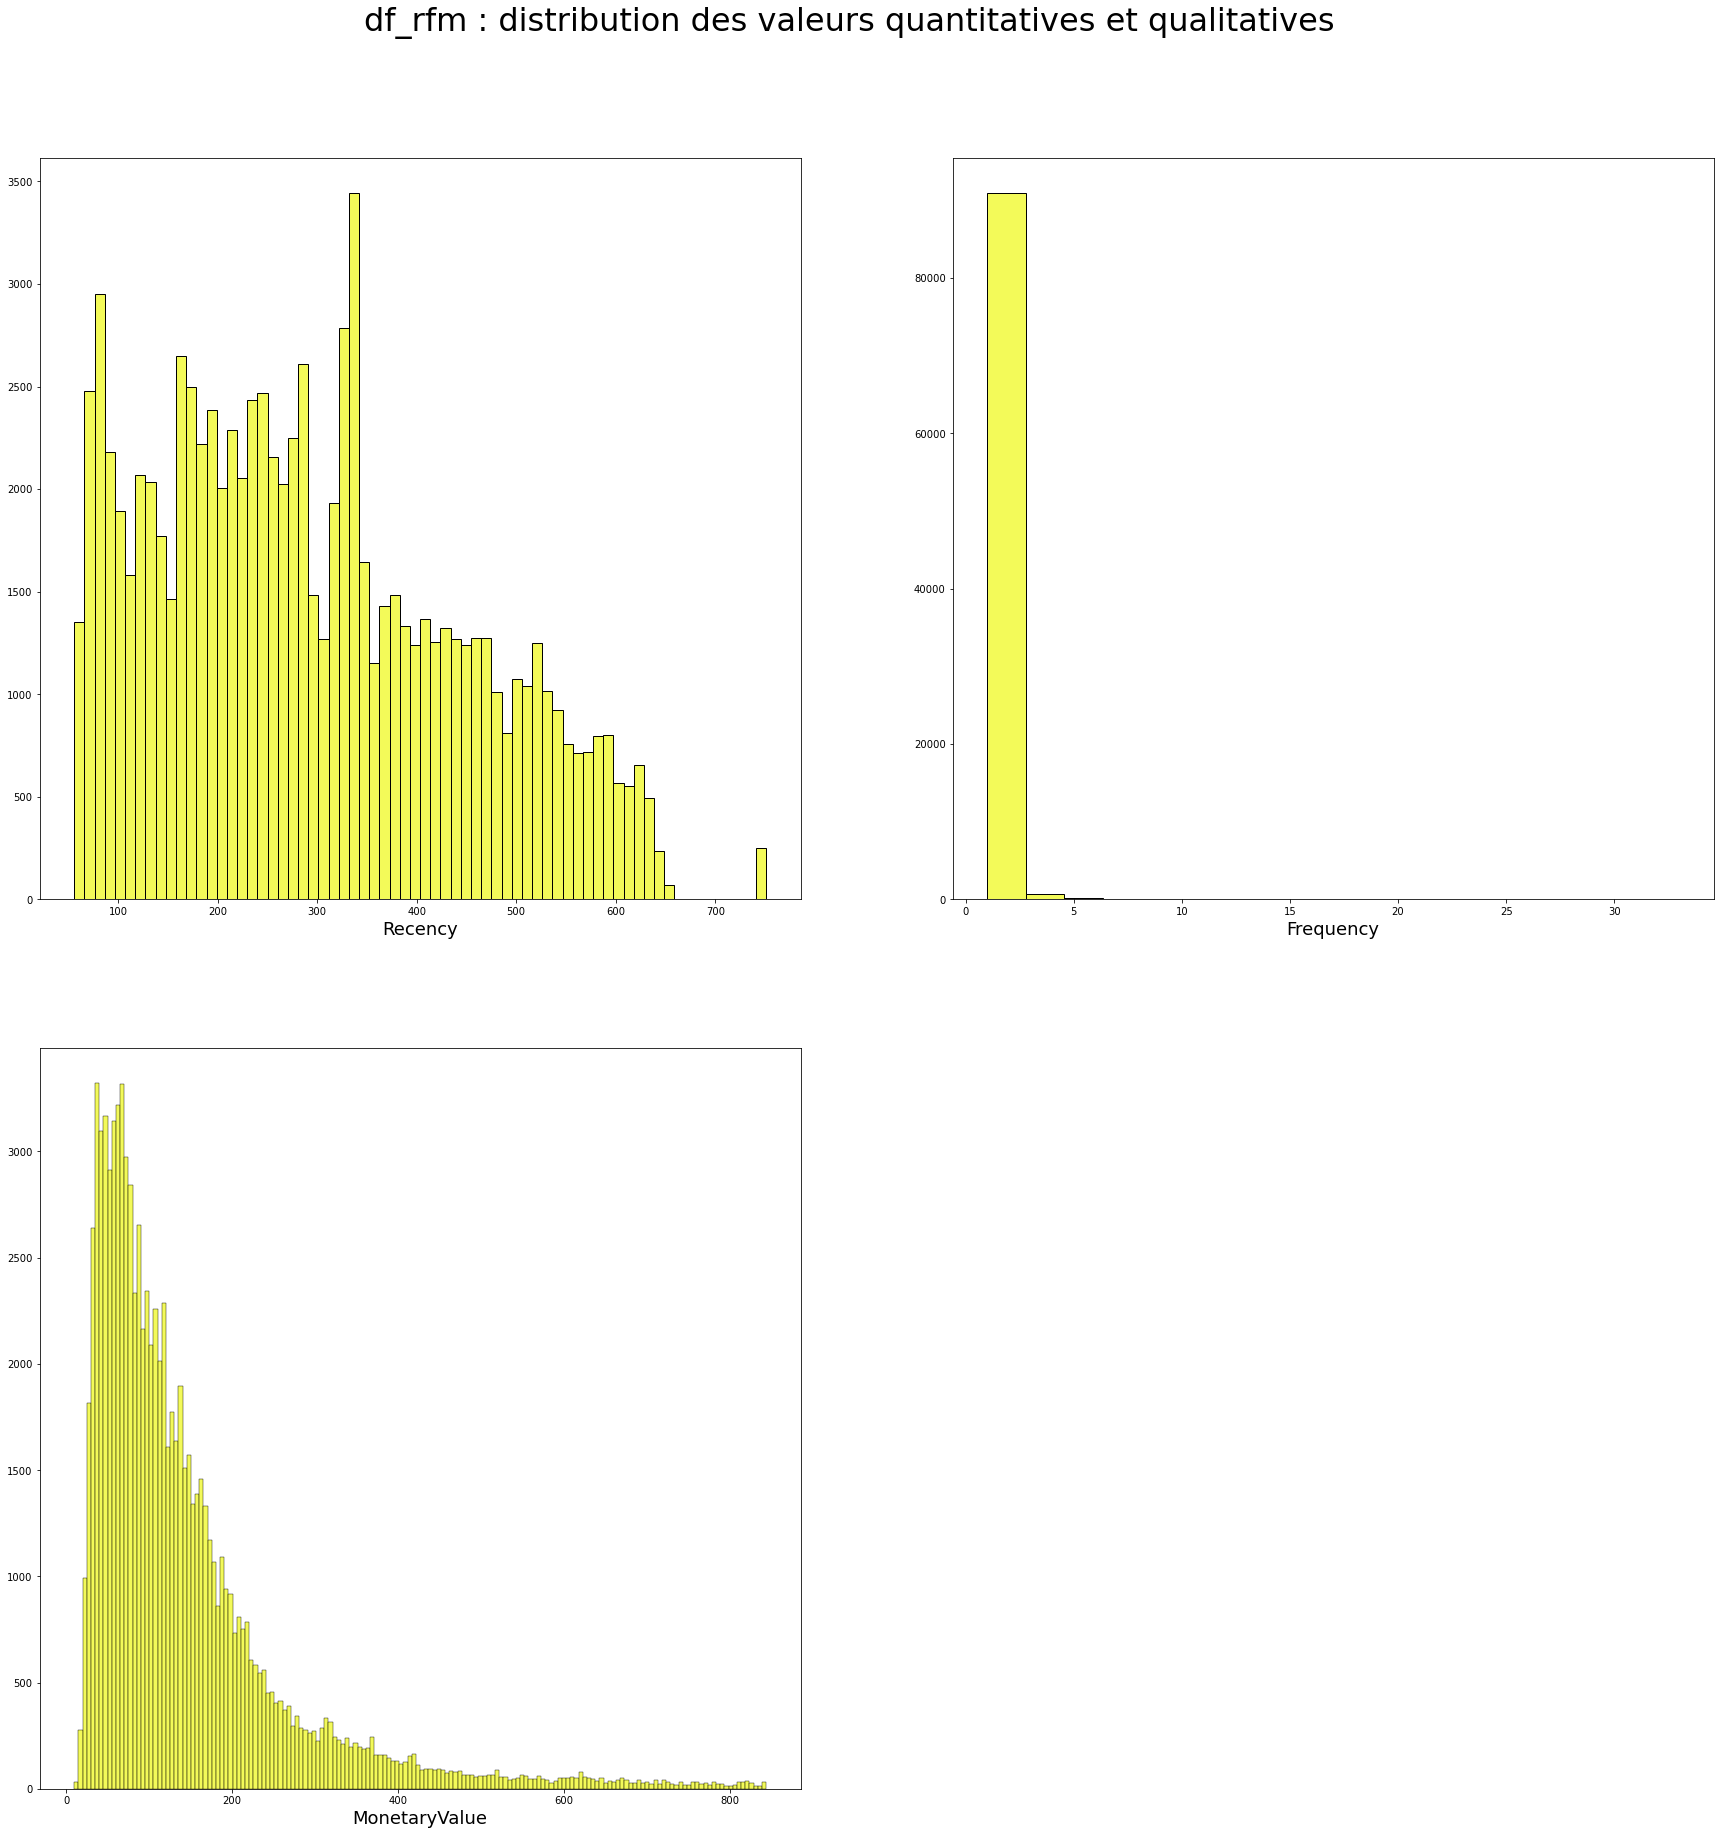

In [50]:
plot_sghisto(
    df_rfm,
    dtype="all",
    title="df_rfm : distribution des valeurs quantitatives et qualitatives",
    color=COLOR_TERTIARY,
)

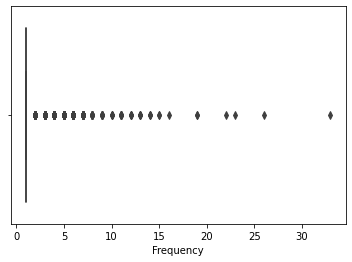

In [51]:
ax = sns.boxplot(x=df_rfm["Frequency"], data=df_rfm)

**Export des données pour segmentation RFM**

In [52]:
df_rfm.to_csv("data/df_rfm.csv")

### 2) traitement et assemblage pour segmentation avançée - N dimensions

**copie**

In [53]:
df_customers_c = df_customers.copy()
df_geolocalisation_c = df_geolocalisation.copy()
df_order_items_c = df_order_items.copy()
df_order_payments_c = df_order_payments.copy()
df_order_reviews_c = df_order_reviews.copy()
df_orders_c = df_orders.copy()
df_products_c = df_products.copy()
df_sellers_c = df_sellers.copy()
df_translation_c = df_translation.copy()

**augmentation sur translation par ajout des 4 types de produits**

In [54]:
mapper_categories_to_four_types = {
    "health_beauty": "convenience",
    "computers_accessories": "shopping",
    "auto": "shopping",
    "bed_bath_table": "shopping",
    "furniture_decor": "shopping",
    "sports_leisure": "shopping",
    "perfumery": "convenience",
    "housewares": "shopping",
    "telephony": "shopping",
    "watches_gifts": "shopping",
    "food_drink": "convenience",
    "baby": "convenience",
    "stationery": "shopping",
    "tablets_printing_image": "shopping",
    "toys": "shopping",
    "fixed_telephony": "shopping",
    "garden_tools": "shopping",
    "fashion_bags_accessories": "shopping",
    "small_appliances": "shopping",
    "consoles_games": "shopping",
    "audio": "shopping",
    "fashion_shoes": "shopping",
    "cool_stuff": "other",
    "luggage_accessories": "shopping",
    "air_conditioning": "shopping",
    "construction_tools_construction": "shopping",
    "kitchen_dining_laundry_garden_furniture": "shopping",
    "costruction_tools_garden": "shopping",
    "fashion_male_clothing": "shopping",
    "pet_shop": "convenience",
    "office_furniture": "shopping",
    "market_place": "specialty",
    "electronics": "shopping",
    "home_appliances": "shopping",
    "party_supplies": "shopping",
    "home_confort": "shopping",
    "costruction_tools_tools": "shopping",
    "agro_industry_and_commerce": "specialty",
    "furniture_mattress_and_upholstery": "shopping",
    "books_technical": "specialty",
    "home_construction": "shopping",
    "musical_instruments": "specialty",
    "furniture_living_room": "shopping",
    "construction_tools_lights": "shopping",
    "industry_commerce_and_business": "specialty",
    "food": "convenience",
    "art": "shopping",
    "furniture_bedroom": "shopping",
    "books_general_interest": "shopping",
    "construction_tools_safety": "shopping",
    "fashion_underwear_beach": "shopping",
    "fashion_sport": "shopping",
    "signaling_and_security": "specialty",
    "computers": "shopping",
    "christmas_supplies": "shopping",
    "fashio_female_clothing": "shopping",
    "home_appliances_2": "shopping",
    "books_imported": "shopping",
    "drinks": "convenience",
    "cine_photo": "shopping",
    "la_cuisine": "shopping",
    "music": "shopping",
    "home_comfort_2": "shopping",
    "small_appliances_home_oven_and_coffee": "shopping",
    "cds_dvds_musicals": "shopping",
    "dvds_blu_ray": "shopping",
    "flowers": "convenience",
    "arts_and_craftmanship": "shopping",
    "diapers_and_hygiene": "convenience",
    "fashion_childrens_clothes": "shopping",
    "security_and_services": "specialty",
    "unknown": "other",
    "pc_gamer": "shopping",
}

In [55]:
for key, value in mapper_categories_to_four_types.items():
    index = df_translation_c[
        df_translation_c["product_category_name_english"] == key
    ].index
    df_translation_c.loc[index, "product_type"] = value

In [56]:
df_translation_c.head(2)

,product_category_name,product_category_name_english,product_type
0,beleza_saude,health_beauty,convenience
1,informatica_acessorios,computers_accessories,shopping


**augmentation sur order par ajout temps de livraison**

In [57]:
df_orders_c["delivery_time"] = (
    df_orders_c["order_delivered_customer_date"]
    - df_orders_c["order_purchase_timestamp"]
)

In [58]:
delivery_time_mean = df_orders_c[
    df_orders_c["order_delivered_customer_date"]
    > df_orders_c["order_purchase_timestamp"]
]["delivery_time"].mean()

In [59]:
def check_valeurs(x):
    if x.total_seconds() < 0:
        x = delivery_time_mean
    return x

In [60]:
# correction des valeurs aberrantes, replace par la moyenne
df_orders_c["delivery_time"] = df_orders_c.loc[:, "delivery_time"].map(check_valeurs)

In [61]:
df_orders_c["delivery_time"].describe()

count                         99441
mean     12 days 13:24:31.879068369
std       9 days 09:40:30.303661551
min                 0 days 12:48:07
25%                 6 days 20:58:16
50%                10 days 11:39:52
75%                15 days 08:42:51
max               209 days 15:05:12
Name: delivery_time, dtype: object

In [62]:
def conversion_timedelta(x):
    return x.total_seconds()

In [63]:
# conversion en seconde
df_orders_c["delivery_time_s"] = df_orders_c.loc[:, "delivery_time"].map(
    conversion_timedelta
)

In [64]:
df_orders_c["delivery_time_s"].describe()

count    9.944e+04
mean     1.085e+06
std      8.124e+05
min      4.609e+04
25%      5.939e+05
50%      9.060e+05
75%      1.327e+06
max      1.811e+07
Name: delivery_time_s, dtype: float64

**merge et observer**

In [65]:
ordres_par_client = pd.merge(
    df_orders_c,
    df_customers_c,
    how="left",
    left_on="customer_id",
    right_on="customer_id",
)
ordres_par_client.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_time_s,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,7.289e+05,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,1.191e+06,af07308b275d755c9edb36a90c618231,47813,barreiras,BA


In [66]:
paiements_ordres_par_client = pd.merge(
    df_order_payments_c,
    ordres_par_client,
    how="left",
    left_on="order_id",
    right_on="order_id",
)
paiements_ordres_par_client.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_time_s,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,13 days 19:35:02,1.194e+06,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,3 days 09:30:31,2.934e+05,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP


In [67]:
df_order_items_c = pd.merge(
    df_order_items_c,
    df_products_c,
    how="left",
    left_on="product_id",
    right_on="product_id",
)
df_order_items_c = pd.merge(
    df_order_items_c,
    df_translation_c,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name",
)
df_order_items_c.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,product_type
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,other
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,convenience


In [68]:
produits_par_ordre = pd.merge(
    df_orders_c, df_order_items_c, how="left", left_on="order_id", right_on="order_id"
)
produits_par_ordre.head(2)
produits_par_ordre

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_time_s,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,product_type
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,7.289e+05,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,shopping
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,1.191e+06,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,convenience
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,8.117e+05,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,shopping
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36,1.141e+06,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop,convenience
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23,2.483e+05,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery,shopping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22 days 04:38:58,1.918e+06,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,baby,convenience
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24 days 20:37:34,2.148e+06,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2,shopping
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17 days 02:04:27,1.476e+06,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories,shopping
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17 days 02:04:27,1.476e+06,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories,shopping


In [69]:
produits_par_client = pd.merge(
    produits_par_ordre,
    df_customers_c,
    how="left",
    left_on="customer_id",
    right_on="customer_id",
)
produits_par_client.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_time_s,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,product_type,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,7.289e+05,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,shopping,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,1.191e+06,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,convenience,af07308b275d755c9edb36a90c618231,47813,barreiras,BA


In [70]:
reviews_par_client = pd.merge(
    df_order_reviews_c,
    ordres_par_client,
    how="left",
    left_on="order_id",
    right_on="order_id",
    validate="many_to_one",
)
reviews_par_client.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_time_s,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,6 days 03:11:52,529912.0,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,9 days 10:52:01,816721.0,64190b91b656ab8f37eb89b93dc84584,13380,nova odessa,SP


**feature engineering**

In [71]:
# Nombre d'ordres par client
nb_ordres = ordres_par_client.groupby("customer_unique_id").agg(
    nb_ordres=("order_id", "count")
)
nb_ordres

,nb_ordres
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1
fffea47cd6d3cc0a88bd621562a9d061,1
ffff371b4d645b6ecea244b27531430a,1


In [72]:
# stats sur paiements par client
paiements = paiements_ordres_par_client.groupby(["customer_unique_id"]).agg(
    min_paiements=("payment_value", "min"),
    max_paiements=("payment_value", "max"),
    mean_paiements=("payment_value", "mean"),
    sum_paiements=("payment_value", "sum"),
)
paiements

,min_paiements,max_paiements,mean_paiements,sum_paiements
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,141.90,141.90,141.90,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,27.19,27.19,27.19
0000f46a3911fa3c0805444483337064,86.22,86.22,86.22,86.22
0000f6ccb0745a6a4b88665a16c9f078,43.62,43.62,43.62,43.62
0004aac84e0df4da2b147fca70cf8255,196.89,196.89,196.89,196.89
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,2067.42,2067.42,2067.42
fffea47cd6d3cc0a88bd621562a9d061,84.58,84.58,84.58,84.58
ffff371b4d645b6ecea244b27531430a,112.46,112.46,112.46,112.46


In [73]:
# Nombre de paiements pour differents moyens de paiement par client (boleto	credit_card	debit_card	not_defined	voucher)
nb_paiements_pour_differents_moyens_de_paiement = pd.crosstab(
    paiements_ordres_par_client["customer_unique_id"],
    paiements_ordres_par_client["payment_type"],
)
nb_paiements_pour_differents_moyens_de_paiement

payment_type,boleto,credit_card,debit_card,not_defined,voucher
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0,1,0,0,0
0000b849f77a49e4a4ce2b2a4ca5be3f,0,1,0,0,0
0000f46a3911fa3c0805444483337064,0,1,0,0,0
0000f6ccb0745a6a4b88665a16c9f078,0,1,0,0,0
0004aac84e0df4da2b147fca70cf8255,0,1,0,0,0
...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0,1,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,0,1,0,0,0
ffff371b4d645b6ecea244b27531430a,0,1,0,0,0


In [74]:
# Nombre de paiements
nb_paiements = nb_paiements_pour_differents_moyens_de_paiement.sum(axis=1)

In [75]:
# Ratio des differents moyens de paiement par client
ratio_differents_moyens_de_paiement = nb_paiements_pour_differents_moyens_de_paiement.divide(
    nb_paiements, axis=0
)

In [76]:
# verification du ratio
ratio_differents_moyens_de_paiement.sum(axis=1).describe()

count    96095.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
dtype: float64

In [77]:
# Nombre de produits achetés par client
nb_produits_achetes = produits_par_client.groupby("customer_unique_id").agg(
    nb_produits_achetes=("order_item_id", "count")
)
nb_produits_achetes

,nb_produits_achetes
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2
fffea47cd6d3cc0a88bd621562a9d061,1
ffff371b4d645b6ecea244b27531430a,1


In [78]:
# Certains clients ont un ordre mais pas de produits achetés car l'ordre a été annulé ou indisponible
ordres_par_client[
    ordres_par_client["customer_unique_id"] == "009b0127b727ab0ba422f6d9604487c7"
]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_time_s,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,1970-01-01,1970-01-01,2016-09-30,12 days 13:24:31.879068369,1.085e+06,009b0127b727ab0ba422f6d9604487c7,12244,sao jose dos campos,SP


In [79]:
# Nombre moyen de produits achetés par ordre et par client
nb_moyen_produits_achetes_par_ordre = (
    nb_produits_achetes["nb_produits_achetes"] / nb_ordres["nb_ordres"]
).to_frame(name="nb_moyen_produits_achetes_par_ordre")

In [80]:
# Nombre de comptes clients par client
nb_comptes = df_customers_c.groupby("customer_unique_id").agg(
    nb_comptes=("customer_id", "count")
)
nb_comptes

,nb_comptes
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1
fffea47cd6d3cc0a88bd621562a9d061,1
ffff371b4d645b6ecea244b27531430a,1


In [81]:
# stats notes du client
notes = reviews_par_client.groupby("customer_unique_id").agg(
    min_note=("review_score", "min"),
    max_note=("review_score", "max"),
    mean_note=("review_score", "mean"),
)
notes

,min_note,max_note,mean_note
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,5,5,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,4,4,4.0
0000f46a3911fa3c0805444483337064,3,3,3.0
0000f6ccb0745a6a4b88665a16c9f078,4,4,4.0
0004aac84e0df4da2b147fca70cf8255,5,5,5.0
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,5,5,5.0
fffea47cd6d3cc0a88bd621562a9d061,4,4,4.0
ffff371b4d645b6ecea244b27531430a,5,5,5.0


In [82]:
# Nombre d'ordres pour chaque categories
nb_ordres_categories = pd.crosstab(
    produits_par_client["customer_unique_id"],
    produits_par_client["product_category_name_english"],
)
nb_ordres_categories

product_category_name_english,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_musicals,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,...,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,pc_gamer,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,unknown,watches_gifts
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0000b849f77a49e4a4ce2b2a4ca5be3f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0000f46a3911fa3c0805444483337064,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
0000f6ccb0745a6a4b88665a16c9f078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
0004aac84e0df4da2b147fca70cf8255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ffff371b4d645b6ecea244b27531430a,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
# Nombre d'ordres des clients ayants commandés
nb_ordres_not_na = nb_ordres_categories.sum(axis=1)

In [84]:
nb_ordres_categories.describe()

product_category_name_english,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_musicals,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,...,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,pc_gamer,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,unknown,watches_gifts
count,95420.000,95420.000,95420.000,9.542e+04,95420.000,95420.000,95420.000,95420.000,95420.000,9.542e+04,95420.000,9.542e+04,95420.000,9.542e+04,95420.000,95420.000,95420.000,95420.000,95420.000,95420.000,95420.000,95420.000,95420.000,9.542e+04,95420.000,...,95420.000,95420.000,95420.000,95420.000,9.542e+04,95420.000,95420.000,9.542e+04,95420.000,95420.000,9.542e+04,9.542e+04,95420.000,95420.000,9.542e+04,95420.000,95420.000,9.542e+04,95420.000,95420.000,9.542e+04,95420.000,95420.000,95420.000,95420.000
mean,0.002,0.003,0.002,2.515e-04,0.004,0.044,0.032,0.116,0.006,6.288e-04,0.003,1.467e-04,0.002,7.546e-04,0.002,0.082,0.012,0.010,0.003,0.002,0.040,0.002,0.001,4.087e-04,0.004,...,0.006,0.073,0.003,0.003,1.467e-04,0.011,0.003,3.982e-04,0.007,0.018,4.506e-04,9.432e-05,0.036,0.020,2.096e-05,0.002,0.007,7.965e-04,0.091,0.026,8.698e-04,0.048,0.043,0.017,0.063
std,0.058,0.067,0.050,1.773e-02,0.064,0.238,0.195,0.405,0.084,2.822e-02,0.055,1.373e-02,0.051,3.104e-02,0.053,0.353,0.118,0.131,0.074,0.056,0.209,0.061,0.035,3.871e-02,0.090,...,0.101,0.335,0.061,0.062,1.295e-02,0.114,0.067,1.995e-02,0.094,0.190,2.311e-02,1.074e-02,0.207,0.166,4.578e-03,0.066,0.093,2.858e-02,0.340,0.178,3.087e-02,0.253,0.221,0.146,0.273
min,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000e+00,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,...,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,0.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000e+00,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,...,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,0.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000e+00,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,...,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,0.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000
75%,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000e+00,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,...,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,0.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000
max,6.000,7.000,6.000,2.000e+00,3.000,20.000,12.000,13.000,4.000,2.000e+00,3.000,2.000e+00,6.000,4.000e+00,4.000,20.000,6.000,10.000,6.000,6.000,7.000,5.000,2.000,1.000e+01,10.000,...,6.000,12.000,4.000,5.000,2.000e+00,5.000,6.000,1.000e+00,6.000,15.000,2.000e+00,2.000e+00,6.000,7.000,1.000e+00,6.000,6.000,2.000e+00,11.000,6.000,2.000e+00,24.000,6.000,6.000,12.000


In [85]:
# Ratio des differents moyens de paiement par client
ratio_ordres_categories = nb_ordres_categories.divide(nb_ordres_not_na, axis=0)

In [86]:
# verification du ratio
ratio_ordres_categories.sum(axis=1).sum()

95420.0

In [87]:
# Nombre d'ordres pour differents types de produits ( 1-4)
nb_ordres_types = pd.crosstab(
    produits_par_client["customer_unique_id"], produits_par_client["product_type"]
)
nb_ordres_types

product_type,convenience,other,shopping,specialty
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0,0,1,0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,0,0,0
0000f46a3911fa3c0805444483337064,0,0,1,0
0000f6ccb0745a6a4b88665a16c9f078,0,0,1,0
0004aac84e0df4da2b147fca70cf8255,0,0,1,0
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,1,0,0,0
ffff371b4d645b6ecea244b27531430a,0,0,1,0


In [88]:
# Ratio des differents types de produits
ratio_ordres_types = nb_ordres_types.divide(nb_ordres_types.sum(axis=1), axis=0)

In [89]:
# verification du ratio
ratio_ordres_types.sum(axis=1).sum()

95420.0

In [90]:
# Montant total depensé par client pour differents types de produits ( 1-4) hors frais

montant_total_types = produits_par_client.groupby(
    ["customer_unique_id", "product_type"]
).agg(montant_total_types=("price", "sum"))
montant_total_types = montant_total_types.unstack().fillna(0)
montant_total_types = montant_total_types["montant_total_types"]
montant_total_types = montant_total_types.add_prefix("montant_total_")
montant_total_types

product_type,montant_total_convenience,montant_total_other,montant_total_shopping,montant_total_specialty
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.00,0.0,129.90,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,0.0,0.00,0.0
0000f46a3911fa3c0805444483337064,0.00,0.0,69.00,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.00,0.0,25.99,0.0
0004aac84e0df4da2b147fca70cf8255,0.00,0.0,180.00,0.0
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,0.0,0.00,0.0
fffea47cd6d3cc0a88bd621562a9d061,64.89,0.0,0.00,0.0
ffff371b4d645b6ecea244b27531430a,0.00,0.0,89.90,0.0


In [91]:
# stats sur delais de livraison par client
delais_livraison = ordres_par_client.groupby(["customer_unique_id"]).agg(
    min_delivery_time=("delivery_time_s", "min"),
    max_delivery_time=("delivery_time_s", "max"),
    mean_delivery_time=("delivery_time_s", "mean"),
    sum_delivery_time=("delivery_time_s", "sum"),
)
delais_livraison

,min_delivery_time,max_delivery_time,mean_delivery_time,sum_delivery_time
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,5.539e+05,5.539e+05,5.539e+05,5.539e+05
0000b849f77a49e4a4ce2b2a4ca5be3f,2.839e+05,2.839e+05,2.839e+05,2.839e+05
0000f46a3911fa3c0805444483337064,2.223e+06,2.223e+06,2.223e+06,2.223e+06
0000f6ccb0745a6a4b88665a16c9f078,1.731e+06,1.731e+06,1.731e+06,1.731e+06
0004aac84e0df4da2b147fca70cf8255,1.135e+06,1.135e+06,1.135e+06,1.135e+06
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2.377e+06,2.377e+06,2.377e+06,2.377e+06
fffea47cd6d3cc0a88bd621562a9d061,2.600e+06,2.600e+06,2.600e+06,2.600e+06
ffff371b4d645b6ecea244b27531430a,1.285e+06,1.285e+06,1.285e+06,1.285e+06


In [92]:
# buckets sur delais de livraison par client
max_delais_livraison = delais_livraison["max_delivery_time"].max()
# 0-3j-7j-14j-60j
bins = pd.IntervalIndex.from_tuples(
    [(0, 259200), (259200, 604800), (604800, 1209600), (1209600, max_delais_livraison)]
)

delais_livraisons_buckets = (
    ordres_par_client.groupby(
        ["customer_unique_id", pd.cut(ordres_par_client.delivery_time_s, bins=bins)]
    )
    .size()
    .unstack()
)

In [93]:
# rename columns
columns = pd.CategoricalIndex(
    [
        "delais_livraisons_0_3j",
        "delais_livraisons_3_7j",
        "delais_livraisons_7_14j",
        "delais_livraisons_14_maxj",
    ]
)
delais_livraisons_buckets.columns = columns

In [94]:
# Ratio delais_livraisons_buckets
ratio_delais_livraisons_buckets = delais_livraisons_buckets.divide(
    delais_livraisons_buckets.sum(axis=1), axis=0
)

In [95]:
ratio_delais_livraisons_buckets.describe()

,delais_livraisons_0_3j,delais_livraisons_3_7j,delais_livraisons_7_14j,delais_livraisons_14_maxj
count,96096.000,96096.000,96096.000,96096.000
mean,0.048,0.214,0.434,0.304
std,0.212,0.408,0.492,0.457
min,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000
75%,0.000,0.000,1.000,1.000
max,1.000,1.000,1.000,1.000


In [96]:
# verification du ratio
ratio_delais_livraisons_buckets.sum(axis=1).sum()

96096.0

In [97]:
# recency
NOW = dt.datetime(2018, 10, 25)

recency = ordres_par_client.groupby("customer_unique_id").agg(
    recency=("order_purchase_timestamp", lambda x: (NOW - x.max()).days)
)

In [98]:
recency

,recency
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,167
0000b849f77a49e4a4ce2b2a4ca5be3f,170
0000f46a3911fa3c0805444483337064,593
0000f6ccb0745a6a4b88665a16c9f078,377
0004aac84e0df4da2b147fca70cf8255,344
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,503
fffea47cd6d3cc0a88bd621562a9d061,318
ffff371b4d645b6ecea244b27531430a,624


**Création du dataframe de features**

In [99]:
list_df_features = [
    paiements,
    ratio_differents_moyens_de_paiement,
    nb_moyen_produits_achetes_par_ordre,
    nb_ordres,
    nb_comptes,
    notes,
    ratio_ordres_categories,
    ratio_ordres_types,
    montant_total_types,
    delais_livraison,
    ratio_delais_livraisons_buckets,
    recency,
]
df_customers = pd.DataFrame({})
for df in list_df_features:
    df_customers = pd.merge(
        df_customers, df, how="outer", left_index=True, right_index=True
    )

In [100]:
df_customers.sample(5)

,min_paiements,max_paiements,mean_paiements,sum_paiements,boleto,credit_card,debit_card,not_defined,voucher,nb_moyen_produits_achetes_par_ordre,nb_ordres,nb_comptes,min_note,max_note,mean_note,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,unknown,watches_gifts,convenience,other,shopping,specialty,montant_total_convenience,montant_total_other,montant_total_shopping,montant_total_specialty,min_delivery_time,max_delivery_time,mean_delivery_time,sum_delivery_time,delais_livraisons_0_3j,delais_livraisons_3_7j,delais_livraisons_7_14j,delais_livraisons_14_maxj,recency
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
88a2fc64349b9041005a3e01ea280825,46.65,46.65,46.65,46.65,1.0,0.0,0.0,0.0,0.0,1.0,1,1,5,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,34.8,0.0,1.412e+06,1.412e+06,1.412e+06,1.412e+06,0.0,0.0,0.0,1.0,282
e308ebcaa4a772d62021970d05532860,319.14,319.14,319.14,319.14,1.0,0.0,0.0,0.0,0.0,1.0,1,1,5,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,299.0,0.0,6.316e+05,6.316e+05,6.316e+05,6.316e+05,0.0,0.0,1.0,0.0,84
ae34c047daead32e39200cad49c76ac6,36.17,36.17,36.17,36.17,0.0,1.0,0.0,0.0,0.0,1.0,1,1,5,5,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,27.9,0.0,1.719e+05,1.719e+05,1.719e+05,1.719e+05,1.0,0.0,0.0,0.0,233
9a07e60345e320d904ab205aa8a1e4ad,147.15,147.15,147.15,147.15,0.0,1.0,0.0,0.0,0.0,1.0,1,1,5,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,129.0,0.0,0.0,0.0,7.626e+05,7.626e+05,7.626e+05,7.626e+05,0.0,0.0,1.0,0.0,373
37b708a378a17996174d1b8f6ed3d3e9,37.17,37.17,37.17,37.17,0.0,1.0,0.0,0.0,0.0,1.0,1,1,4,4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,28.9,0.0,0.0,0.0,5.603e+05,5.603e+05,5.603e+05,5.603e+05,0.0,1.0,0.0,0.0,385


In [101]:
pd.set_option("display.max_rows", 100)
df_customers.isna().sum()

min_paiements                1
max_paiements                1
mean_paiements               1
sum_paiements                1
boleto                       1
                            ..
delais_livraisons_0_3j       0
delais_livraisons_3_7j       0
delais_livraisons_7_14j      0
delais_livraisons_14_maxj    0
recency                      0
Length: 105, dtype: int64

In [102]:
# Suppression des valeurs ayant un probleme d'intégrité sur orderid (hard delete sur bdd)
# Personne ayant commandé et payé puis annulé
df_customers = df_customers.dropna()

**Export des données pour segmentation a posteriori**

In [103]:
df_customers.to_csv("data/df_customers.csv")

### 3) Exploration

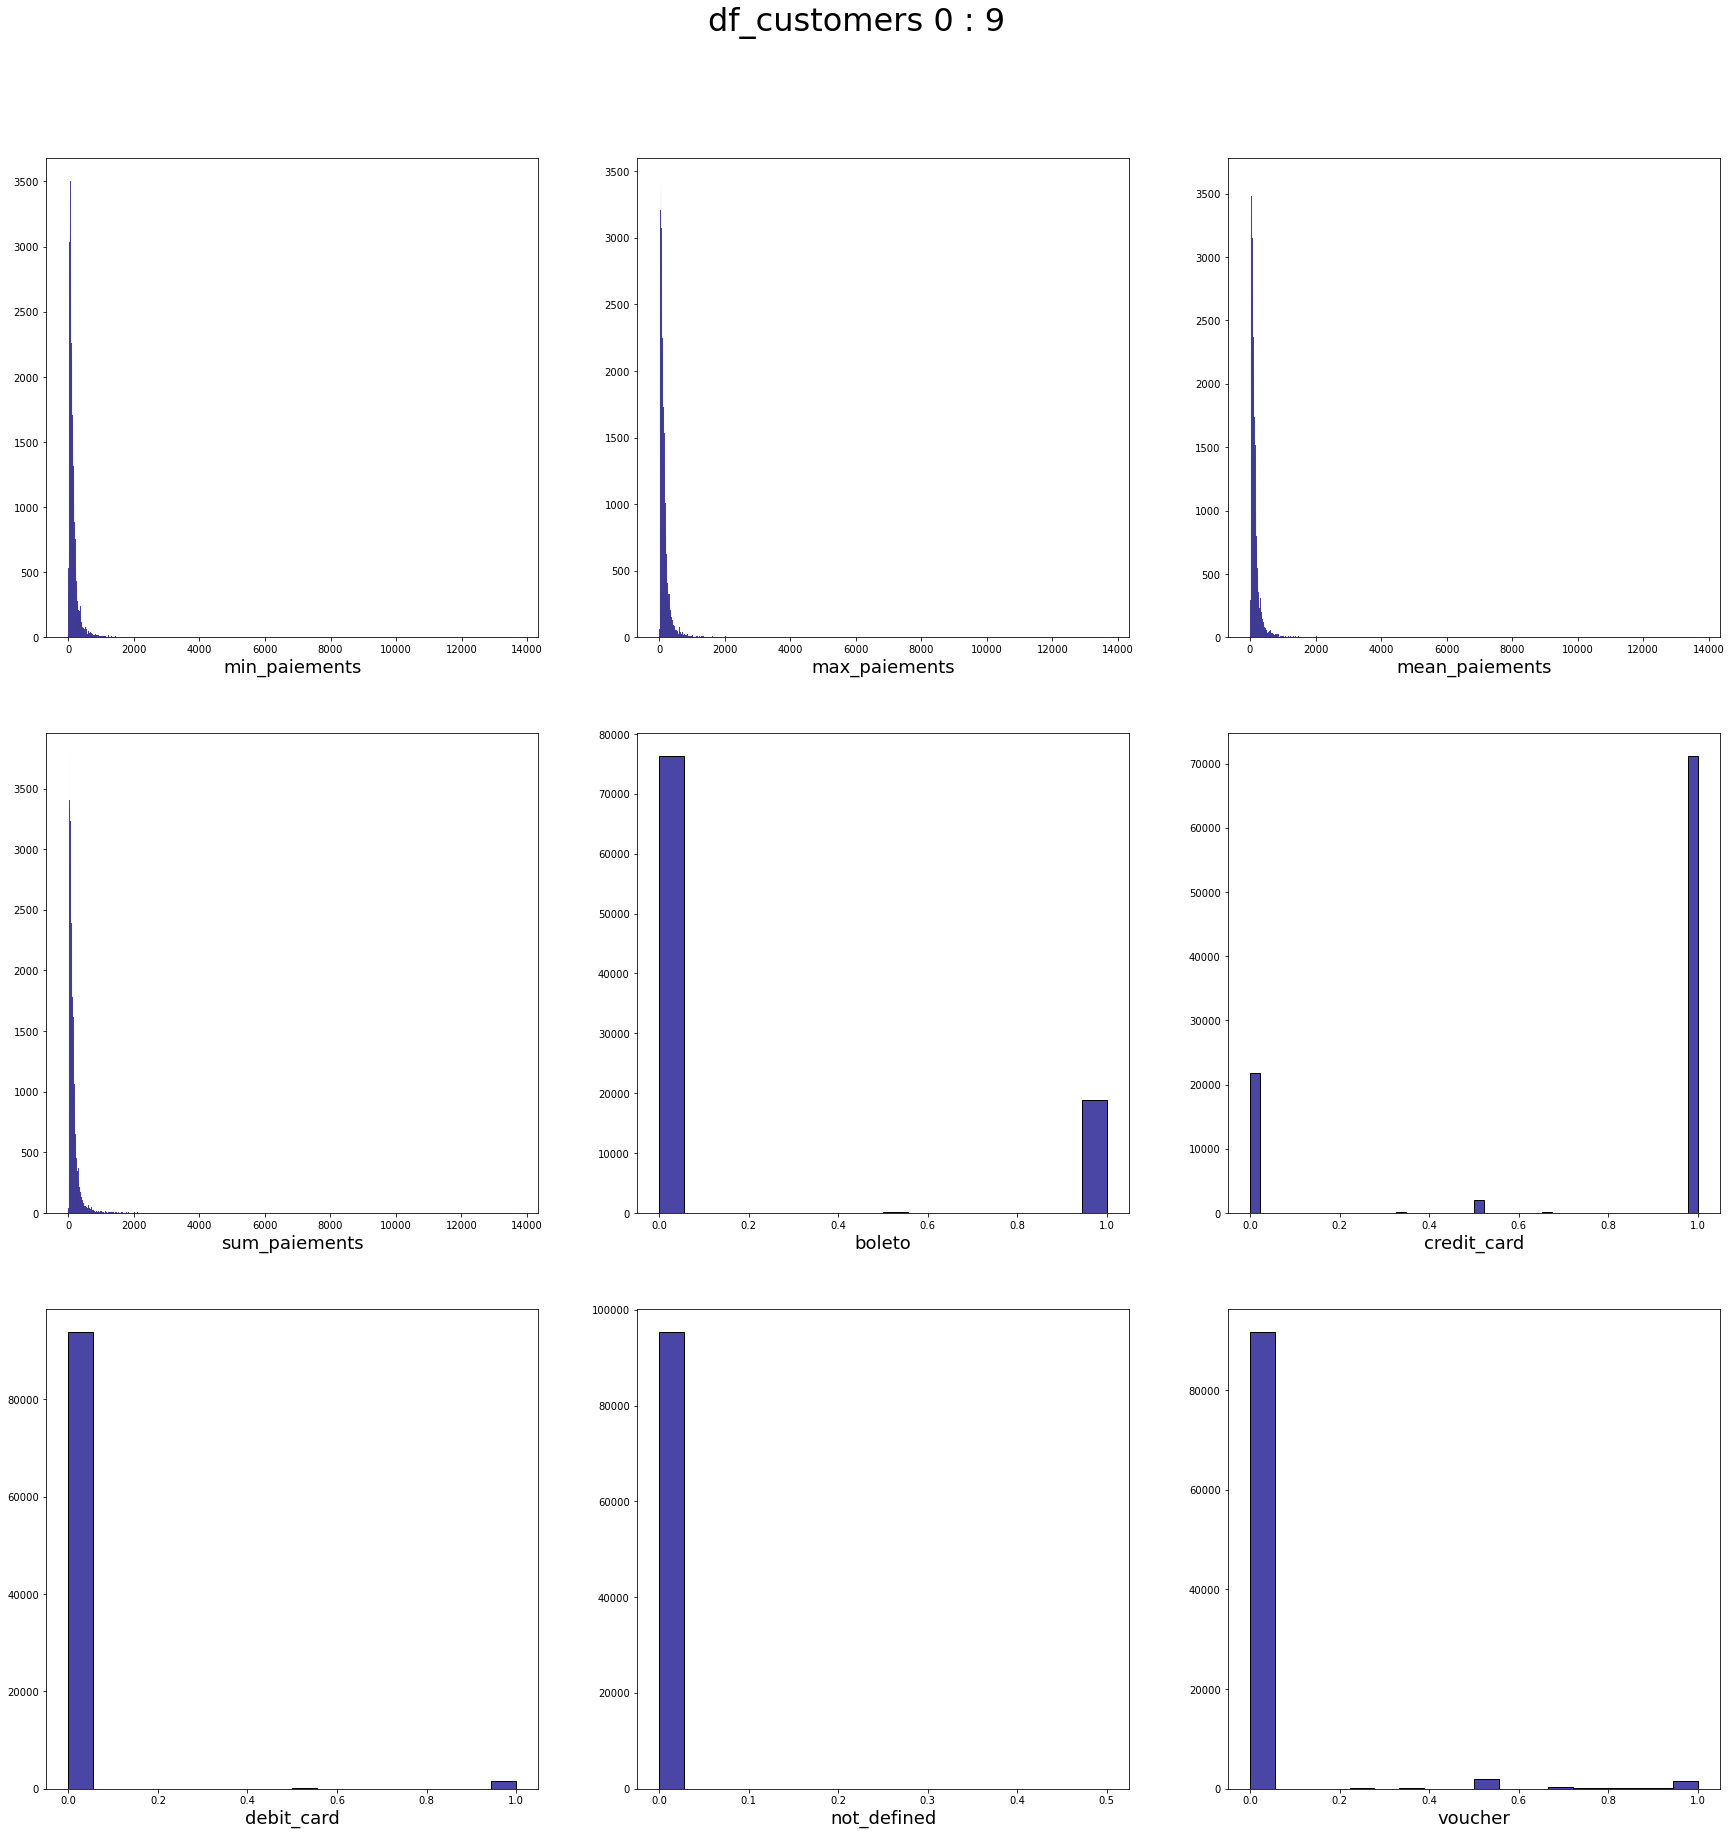

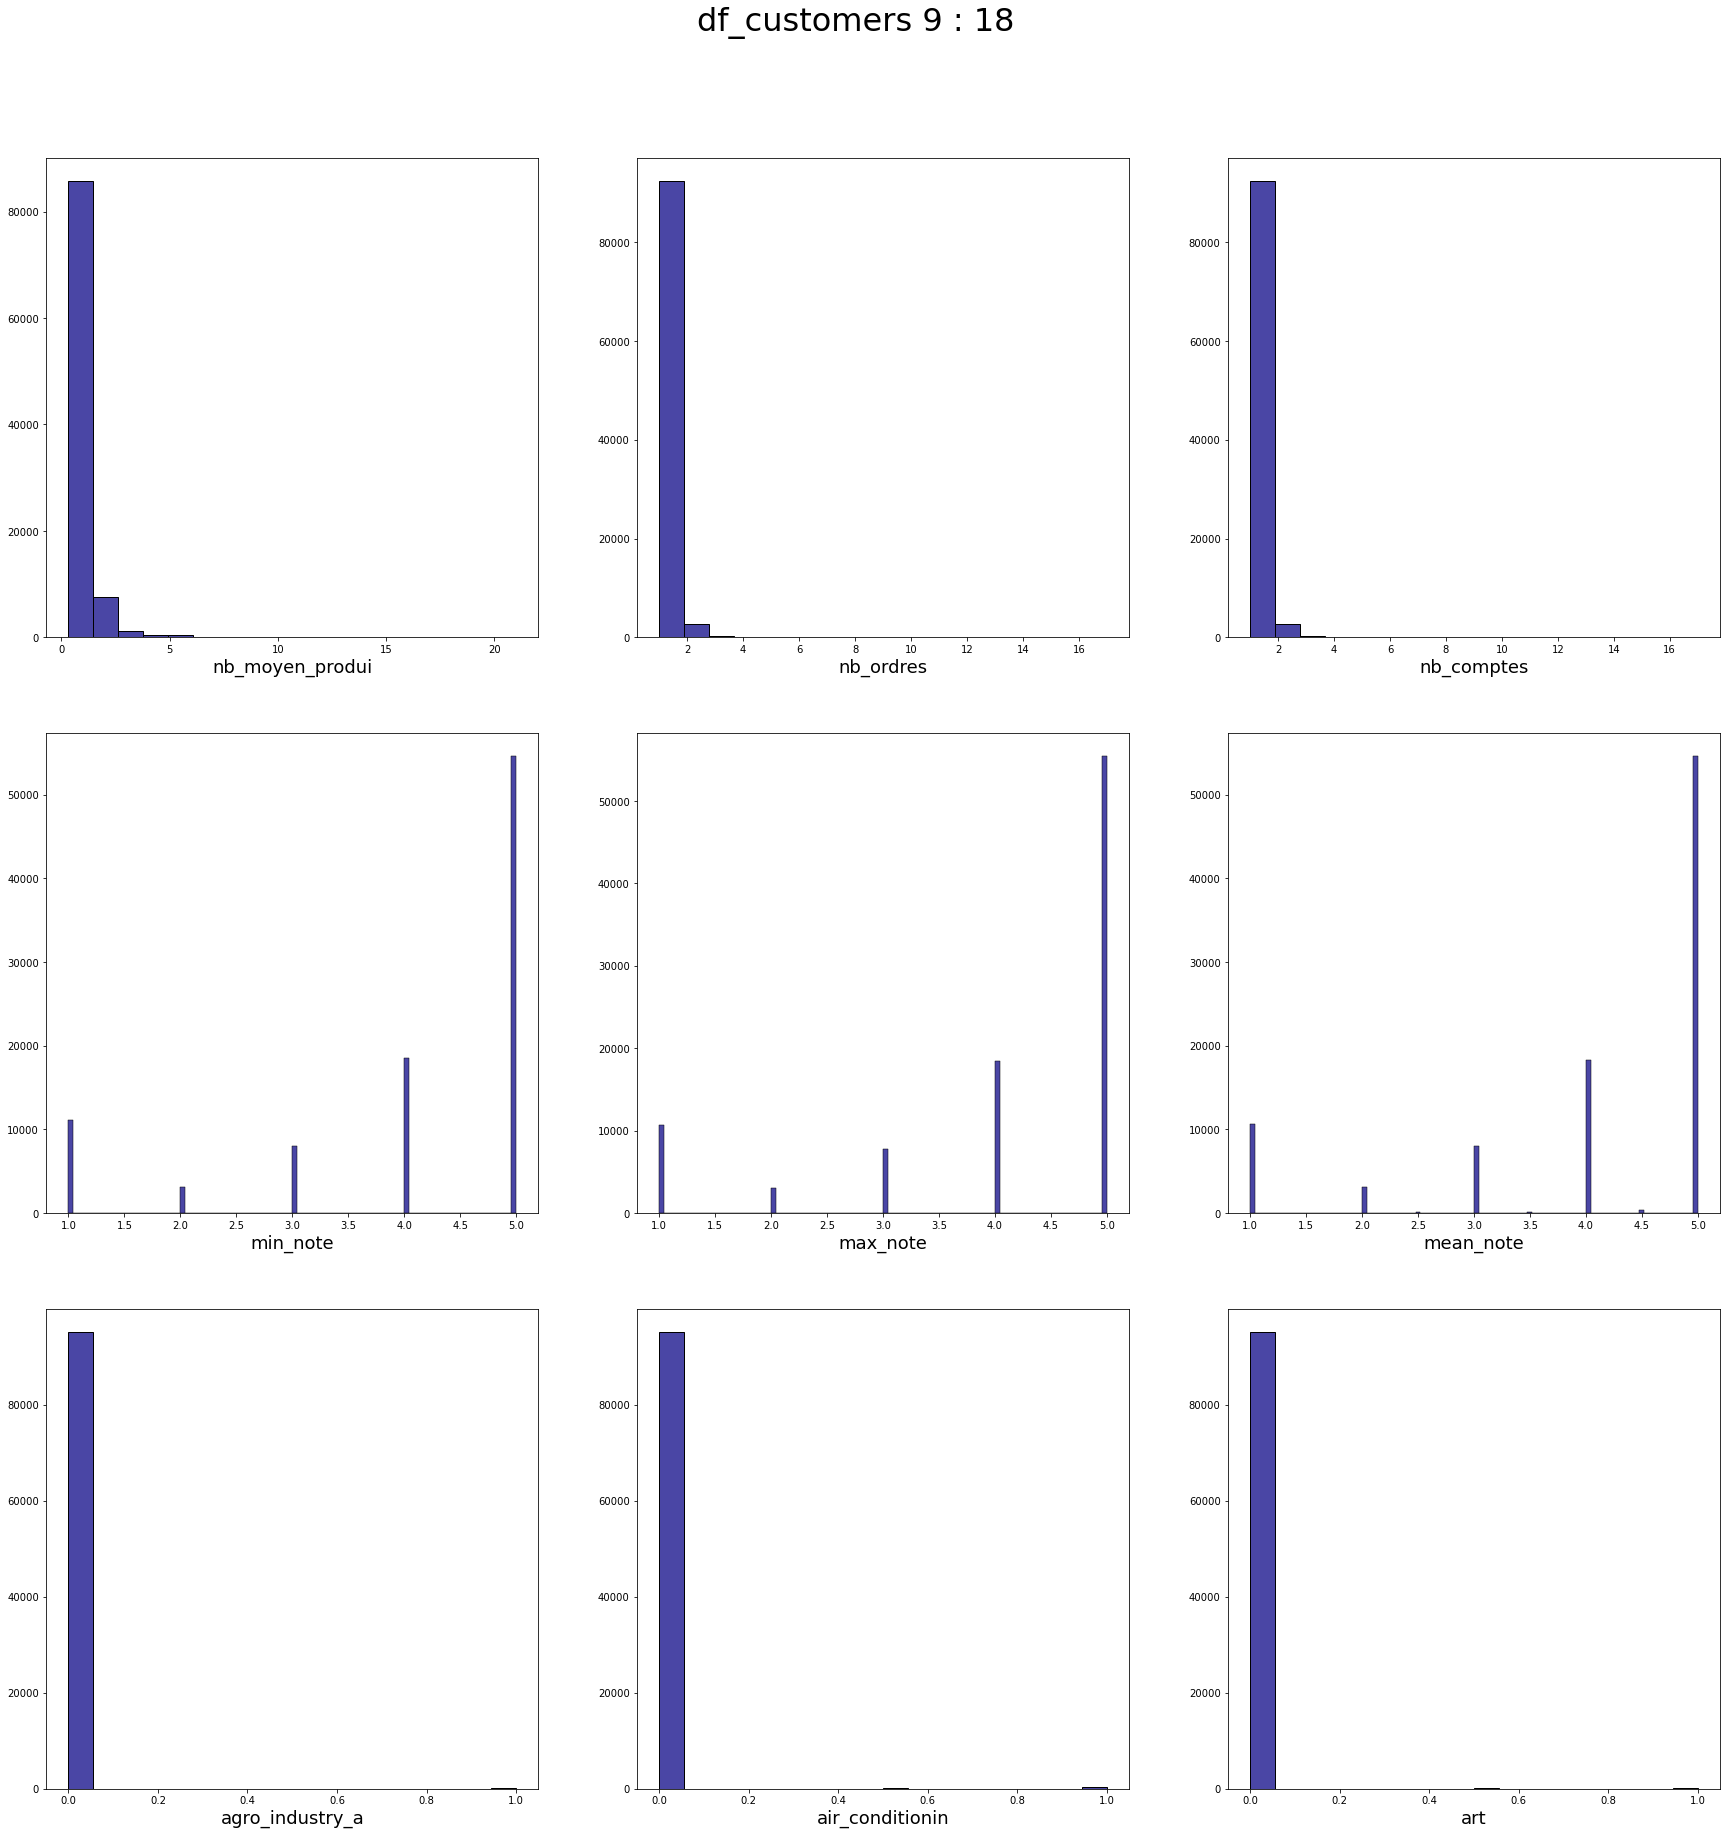

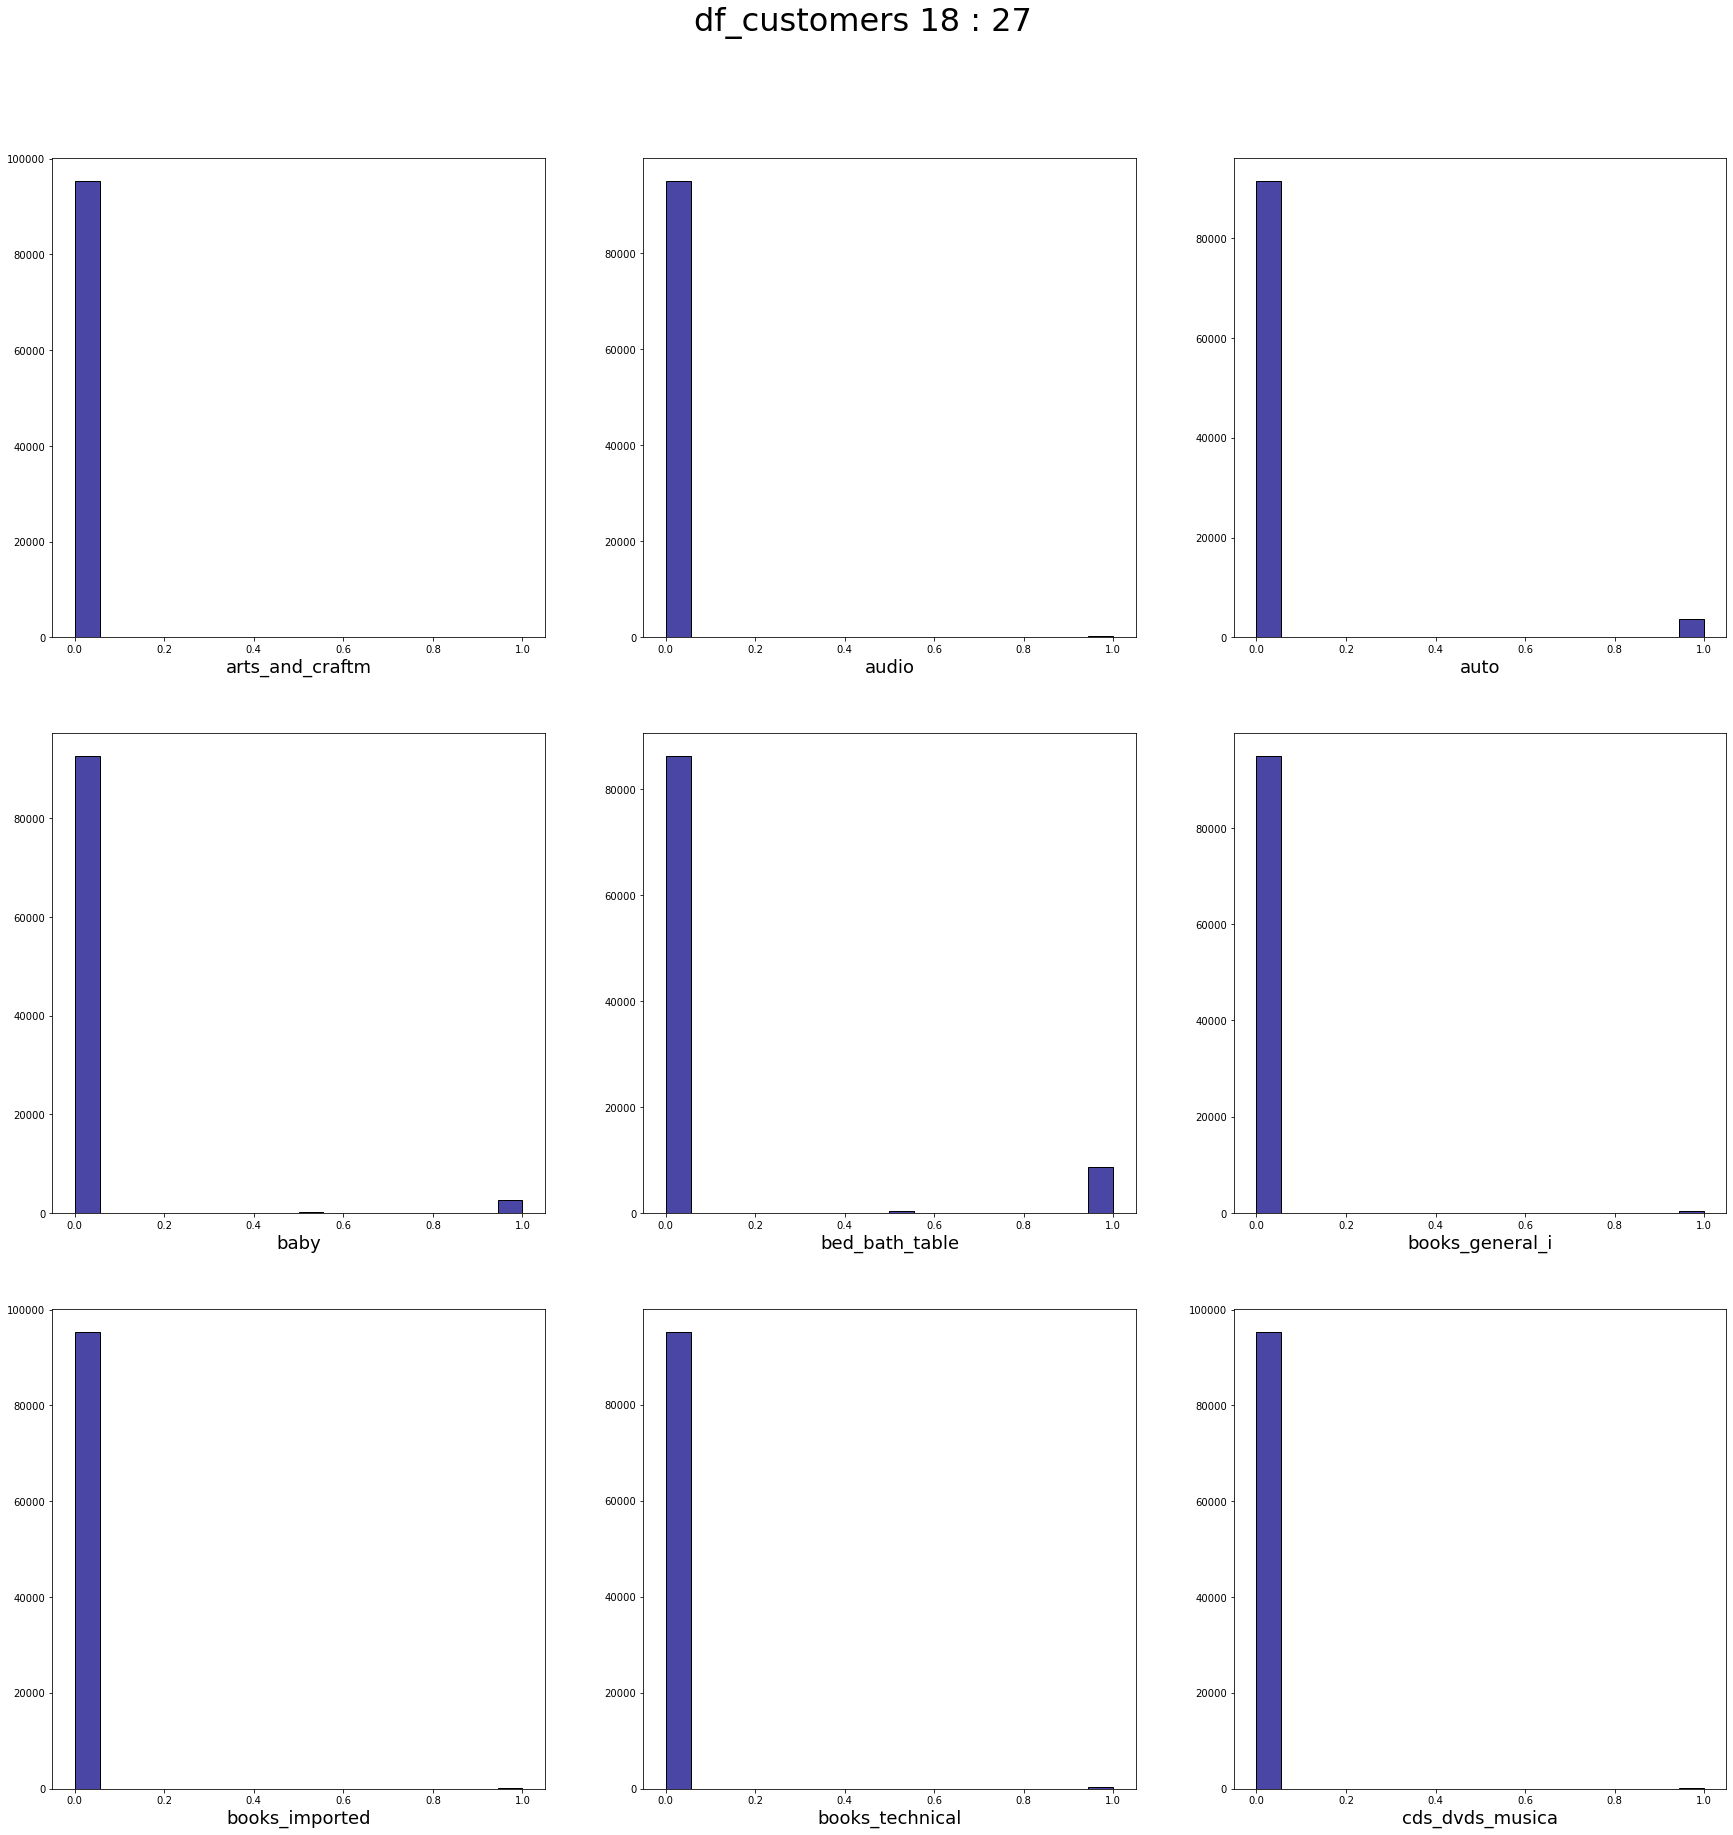

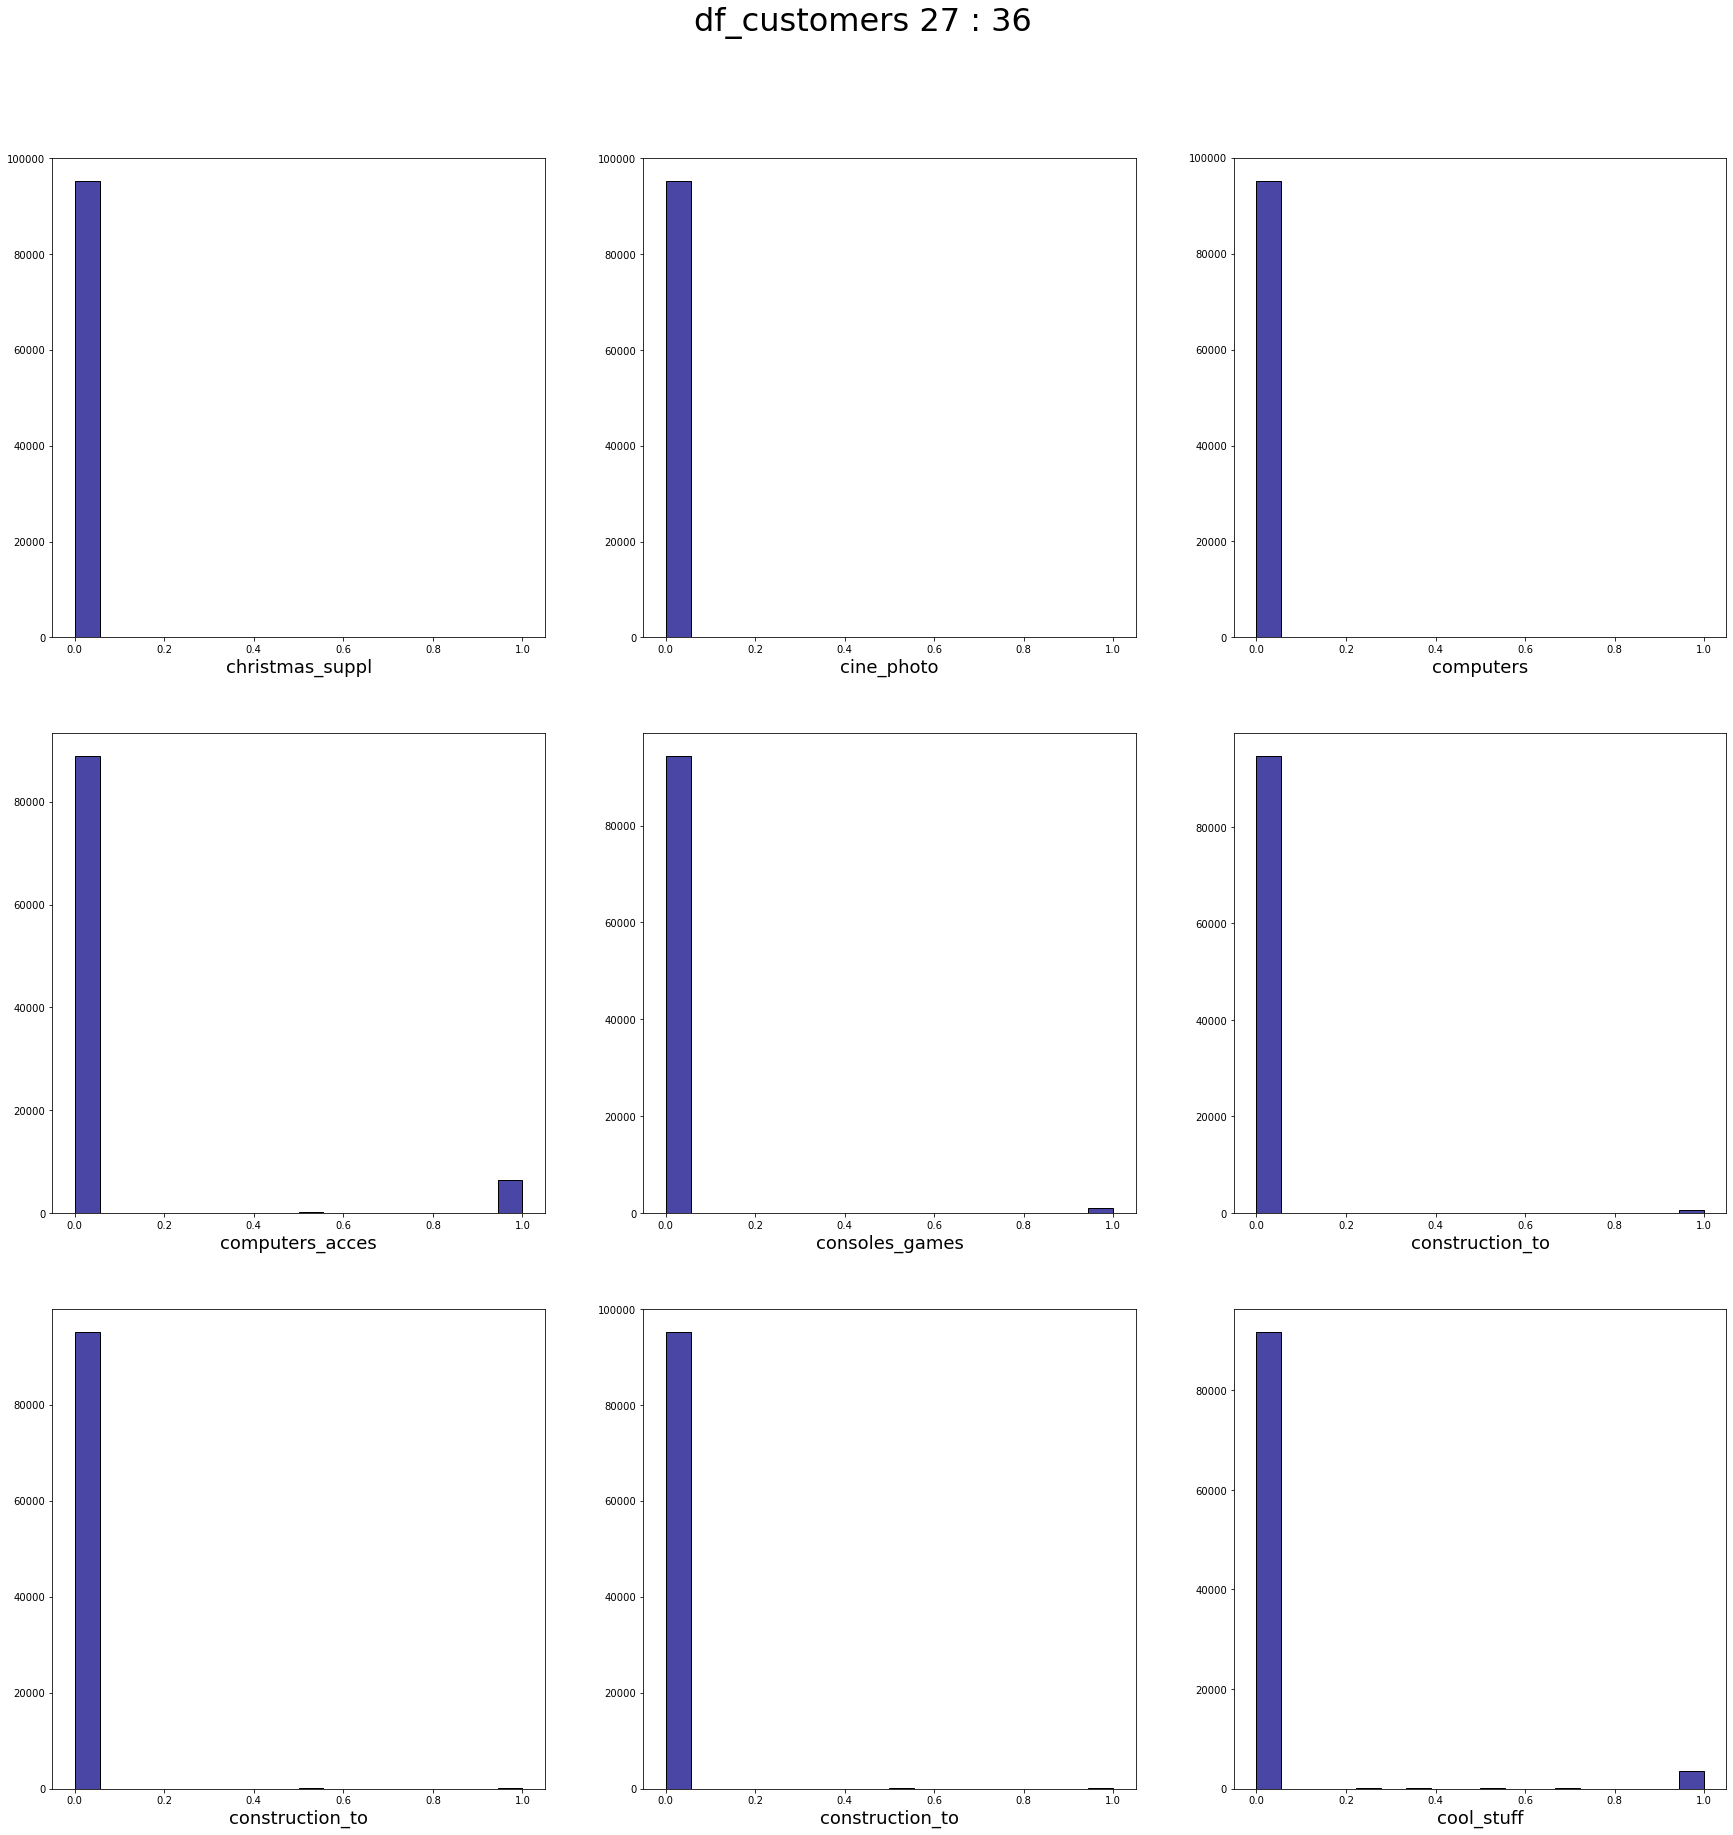

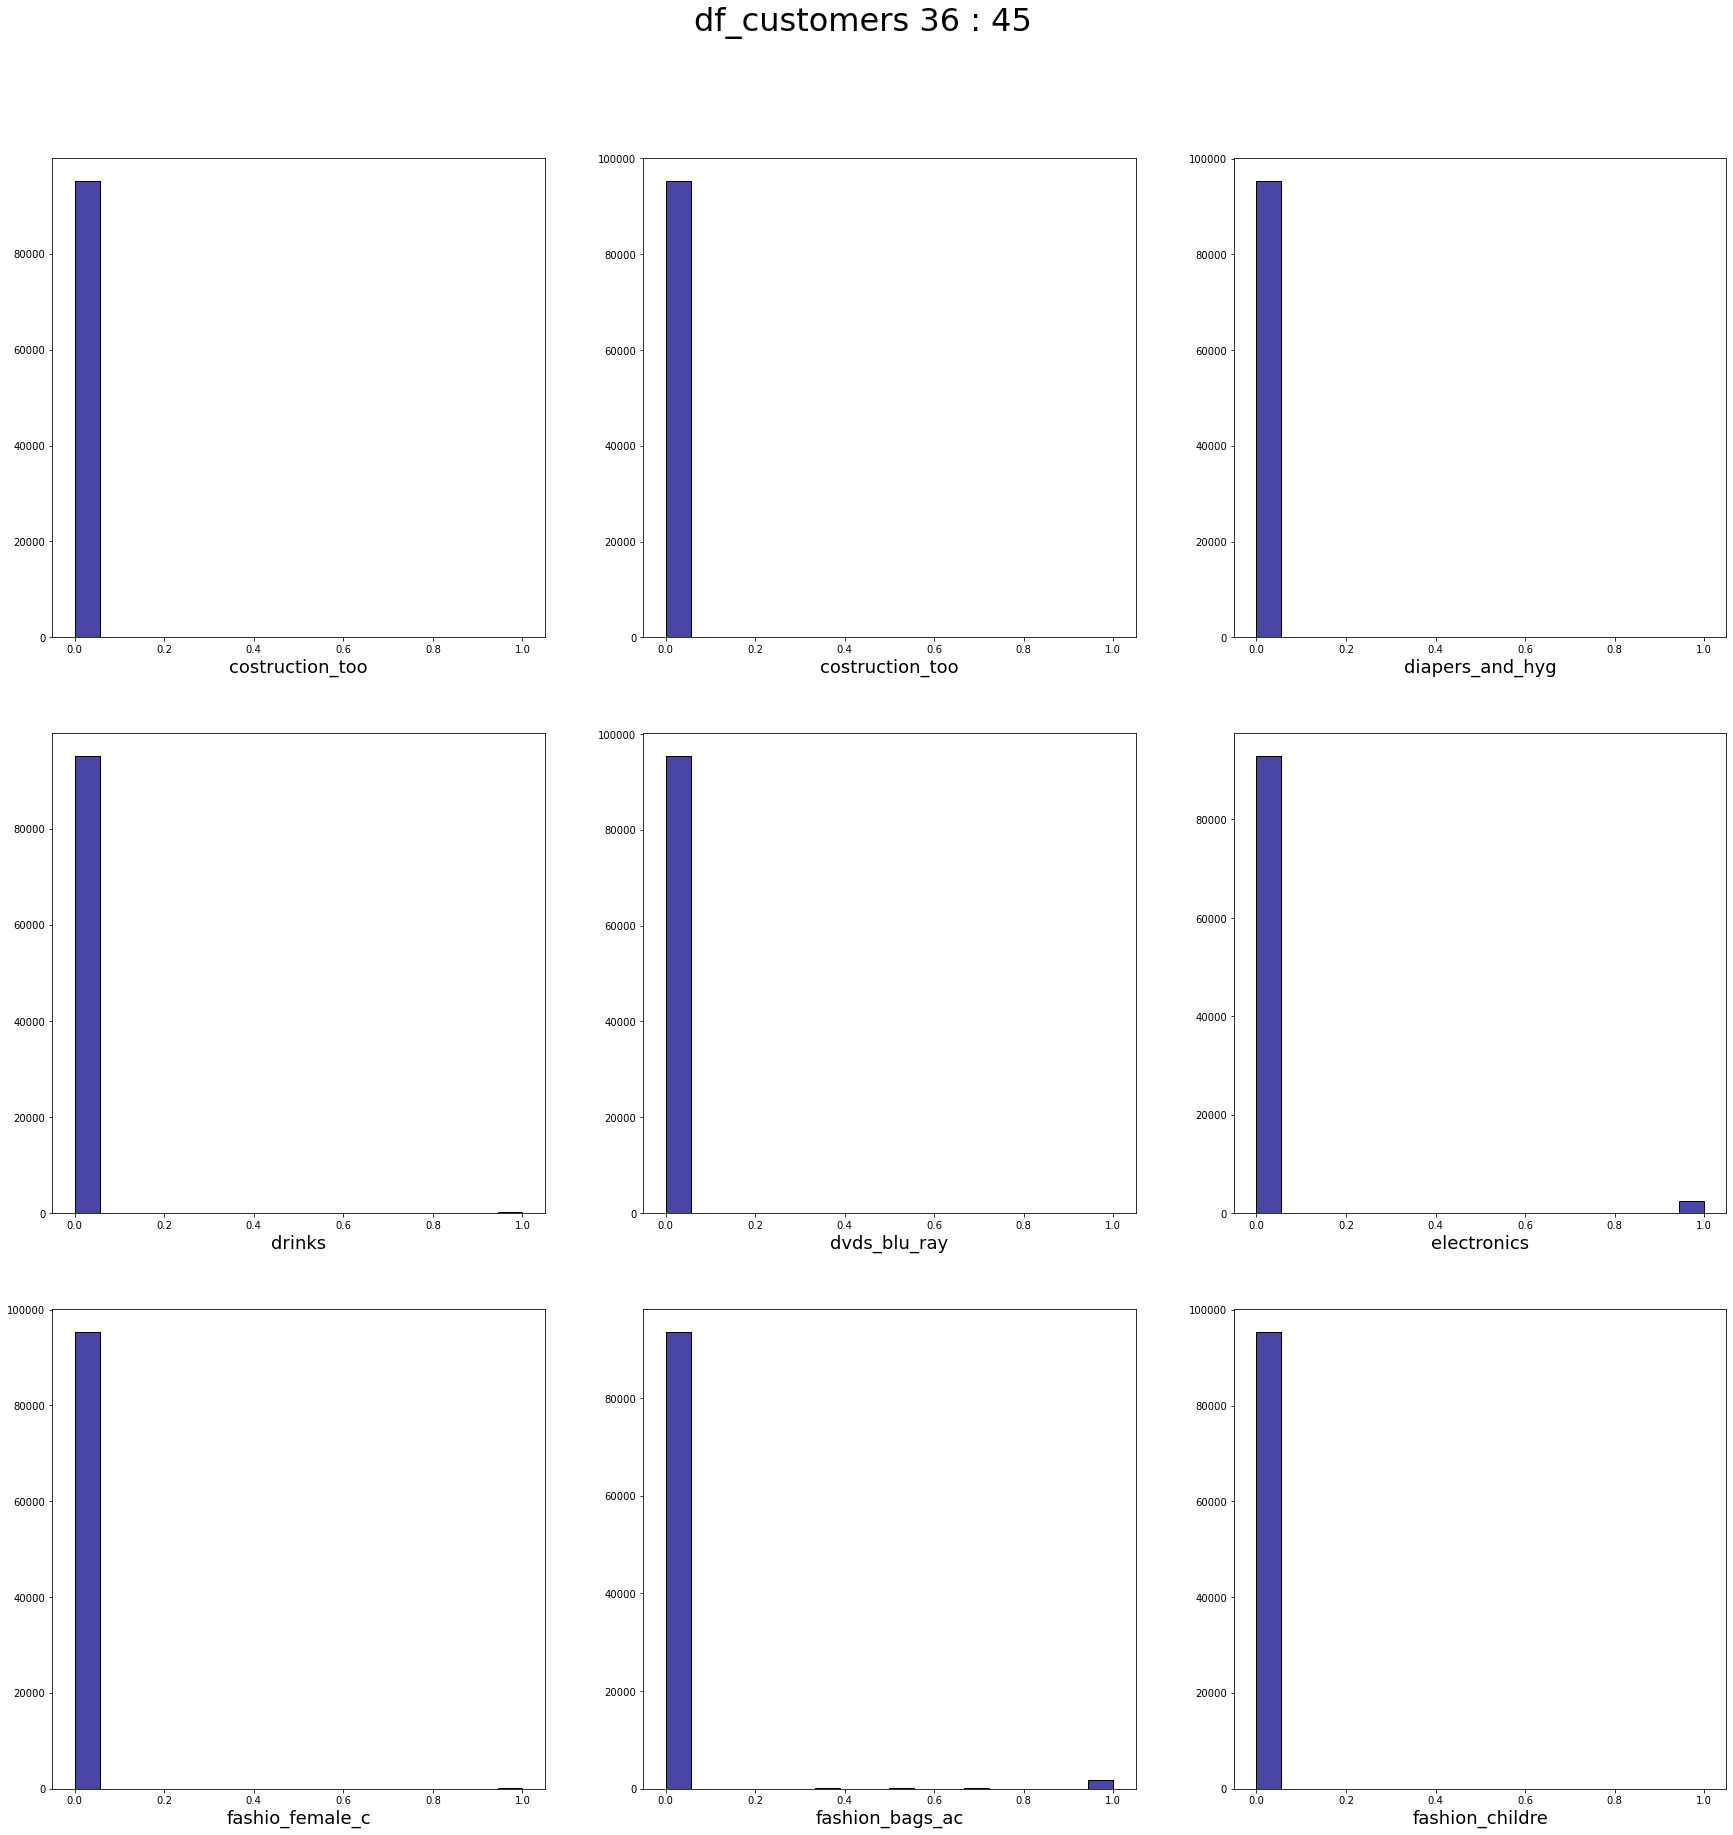

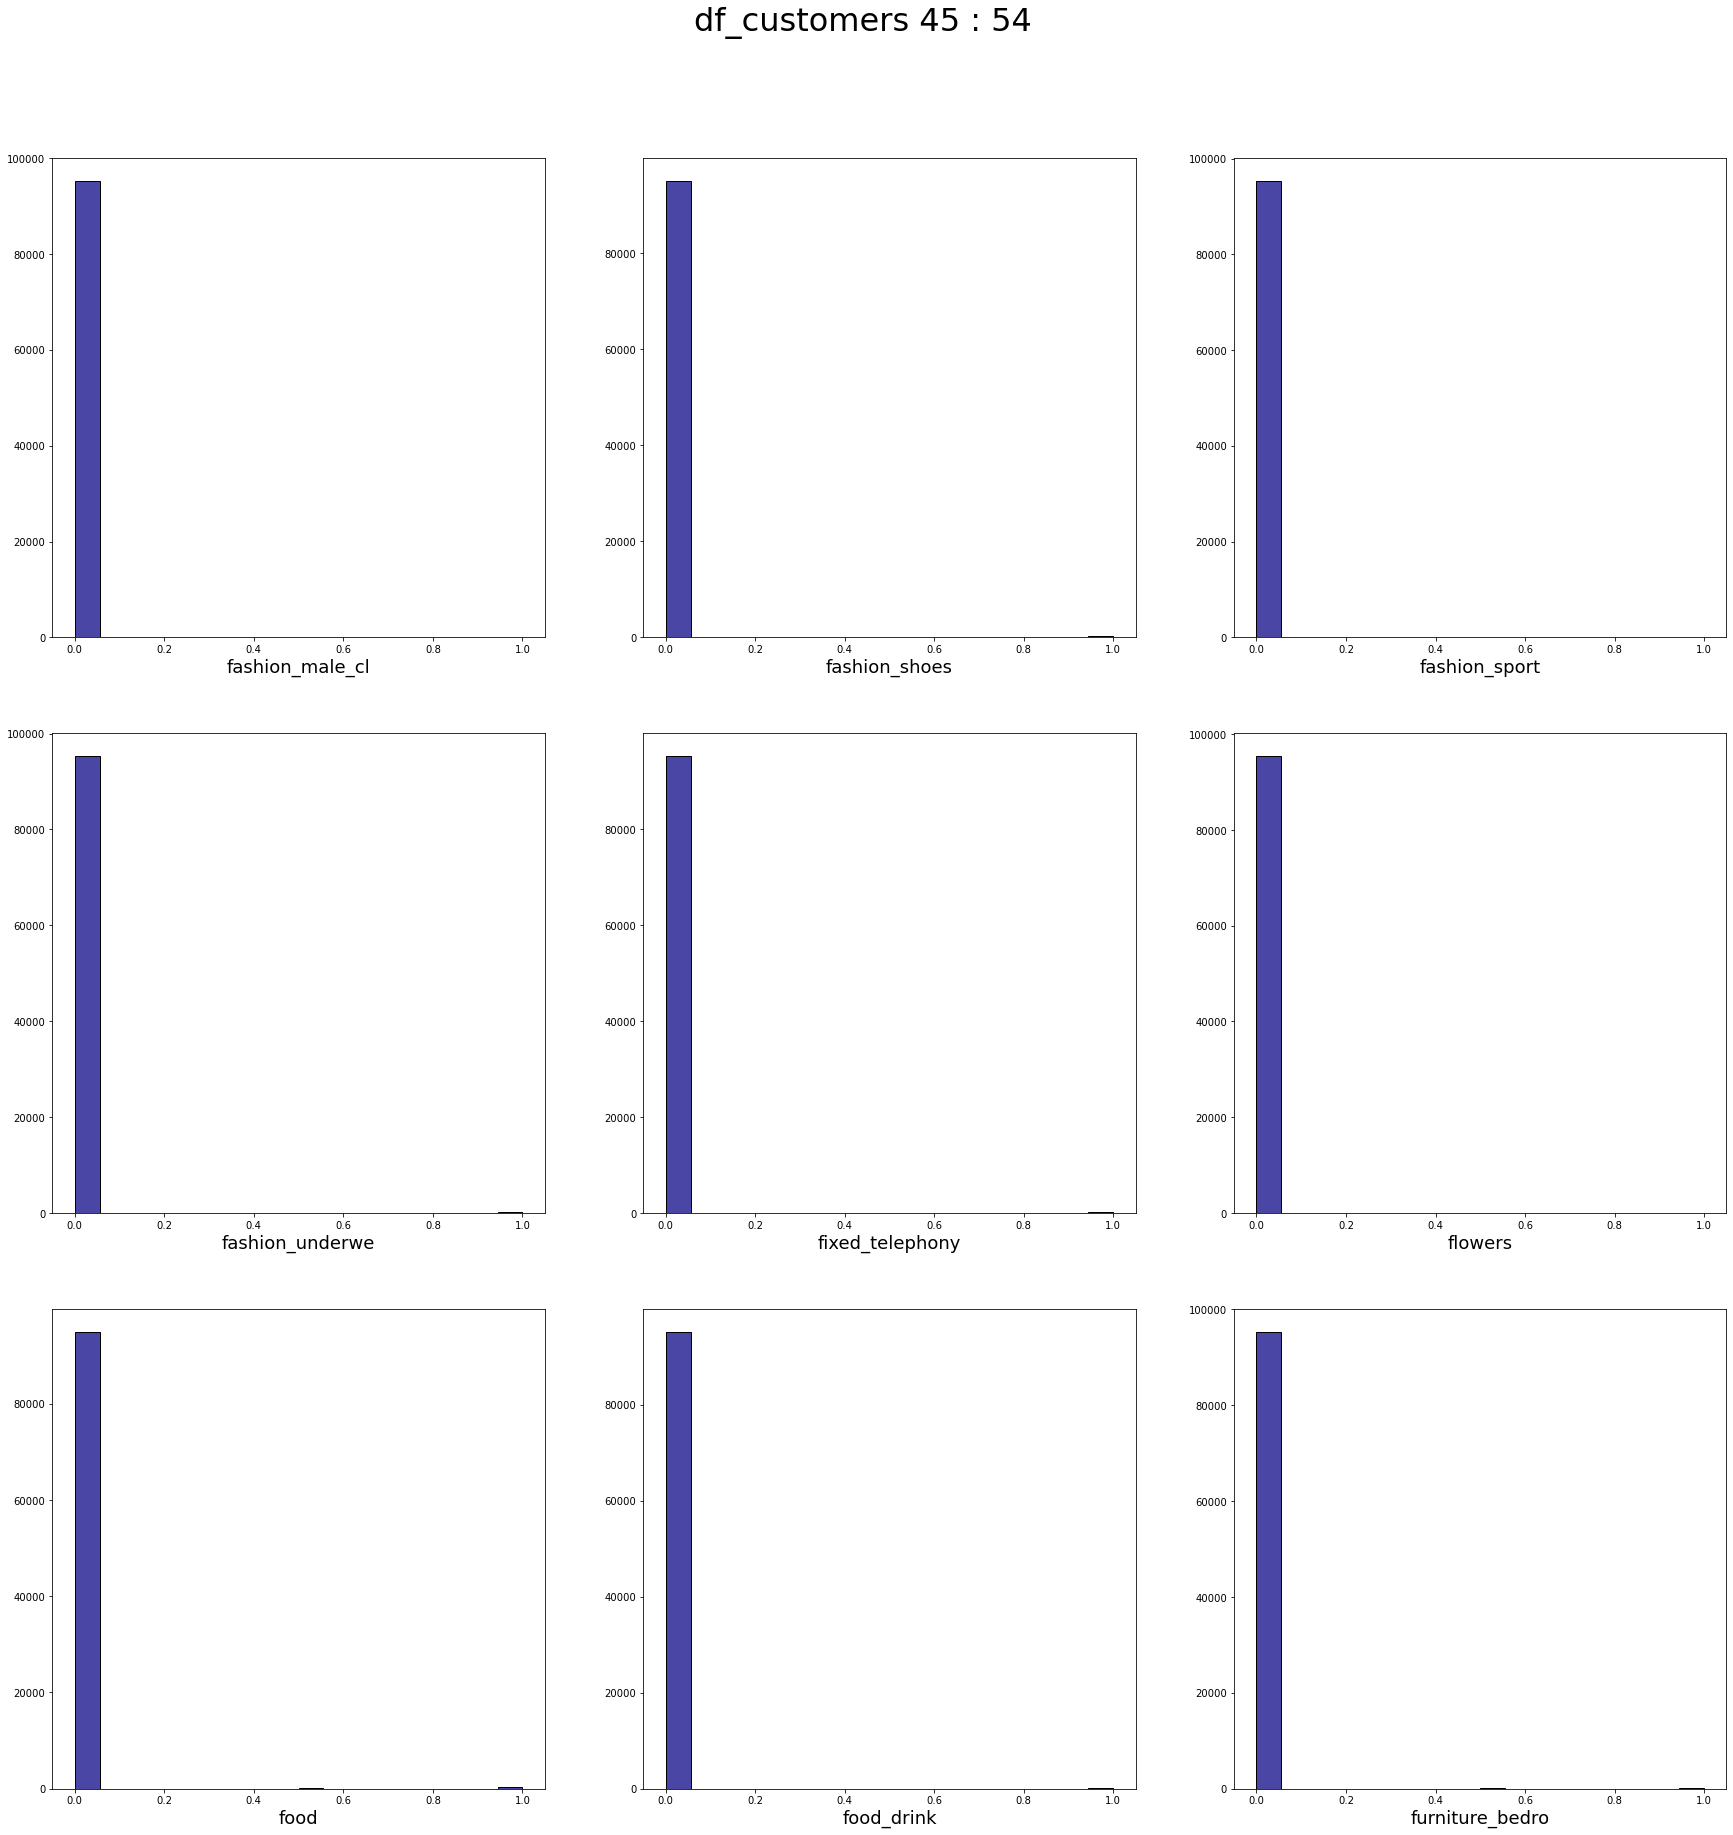

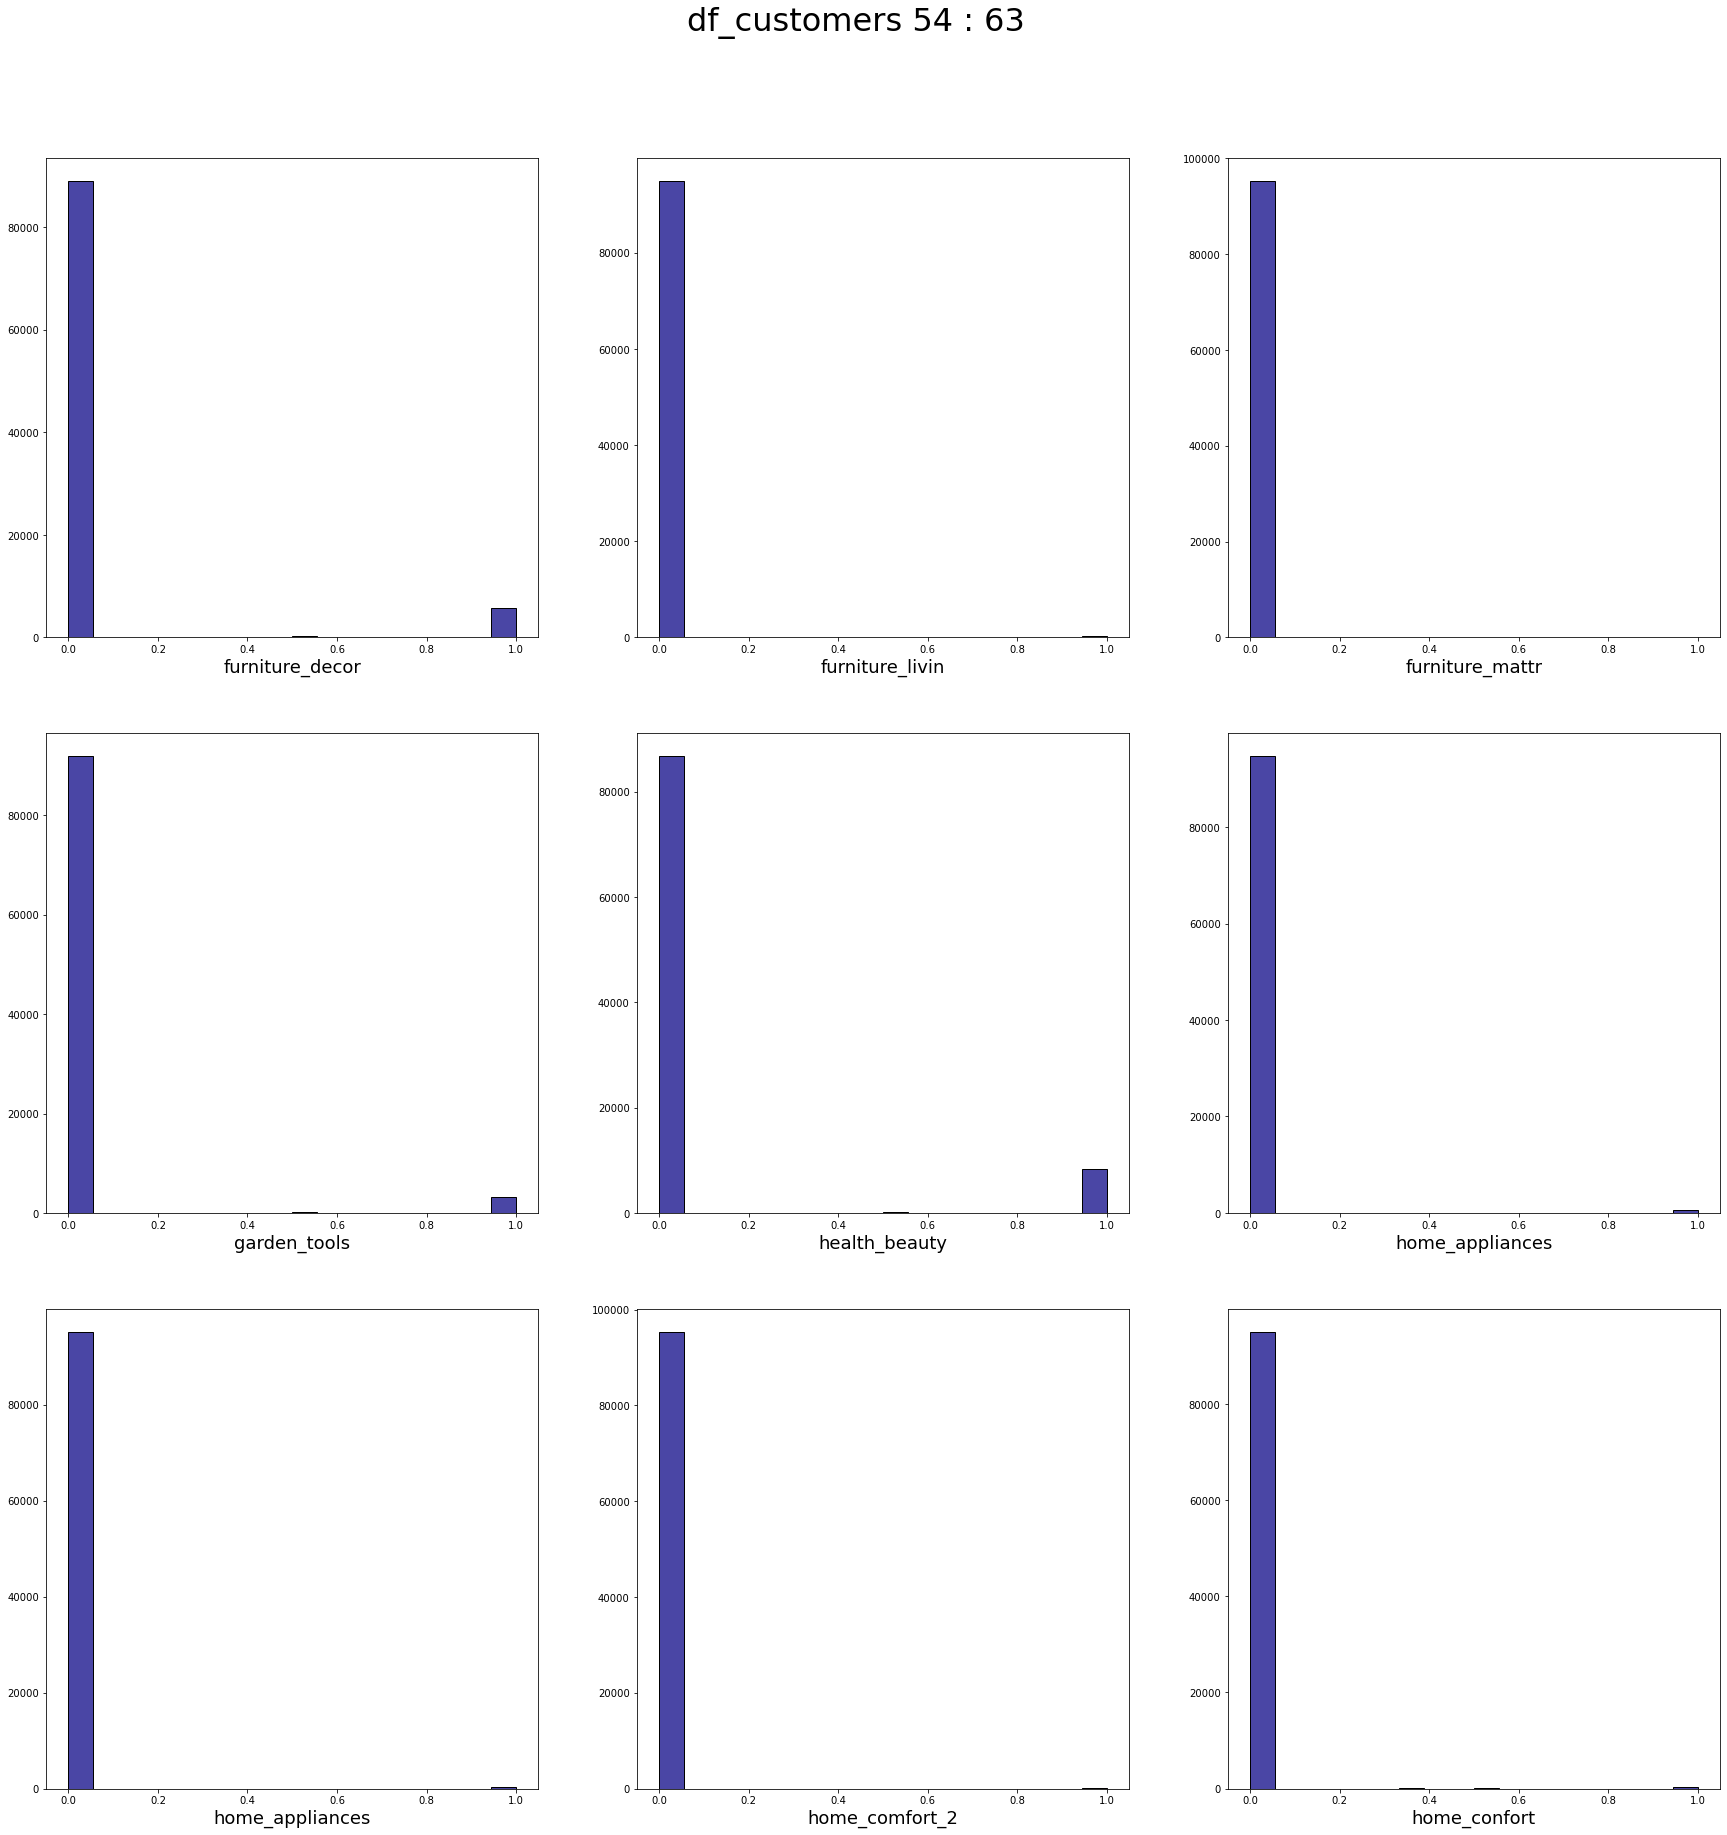

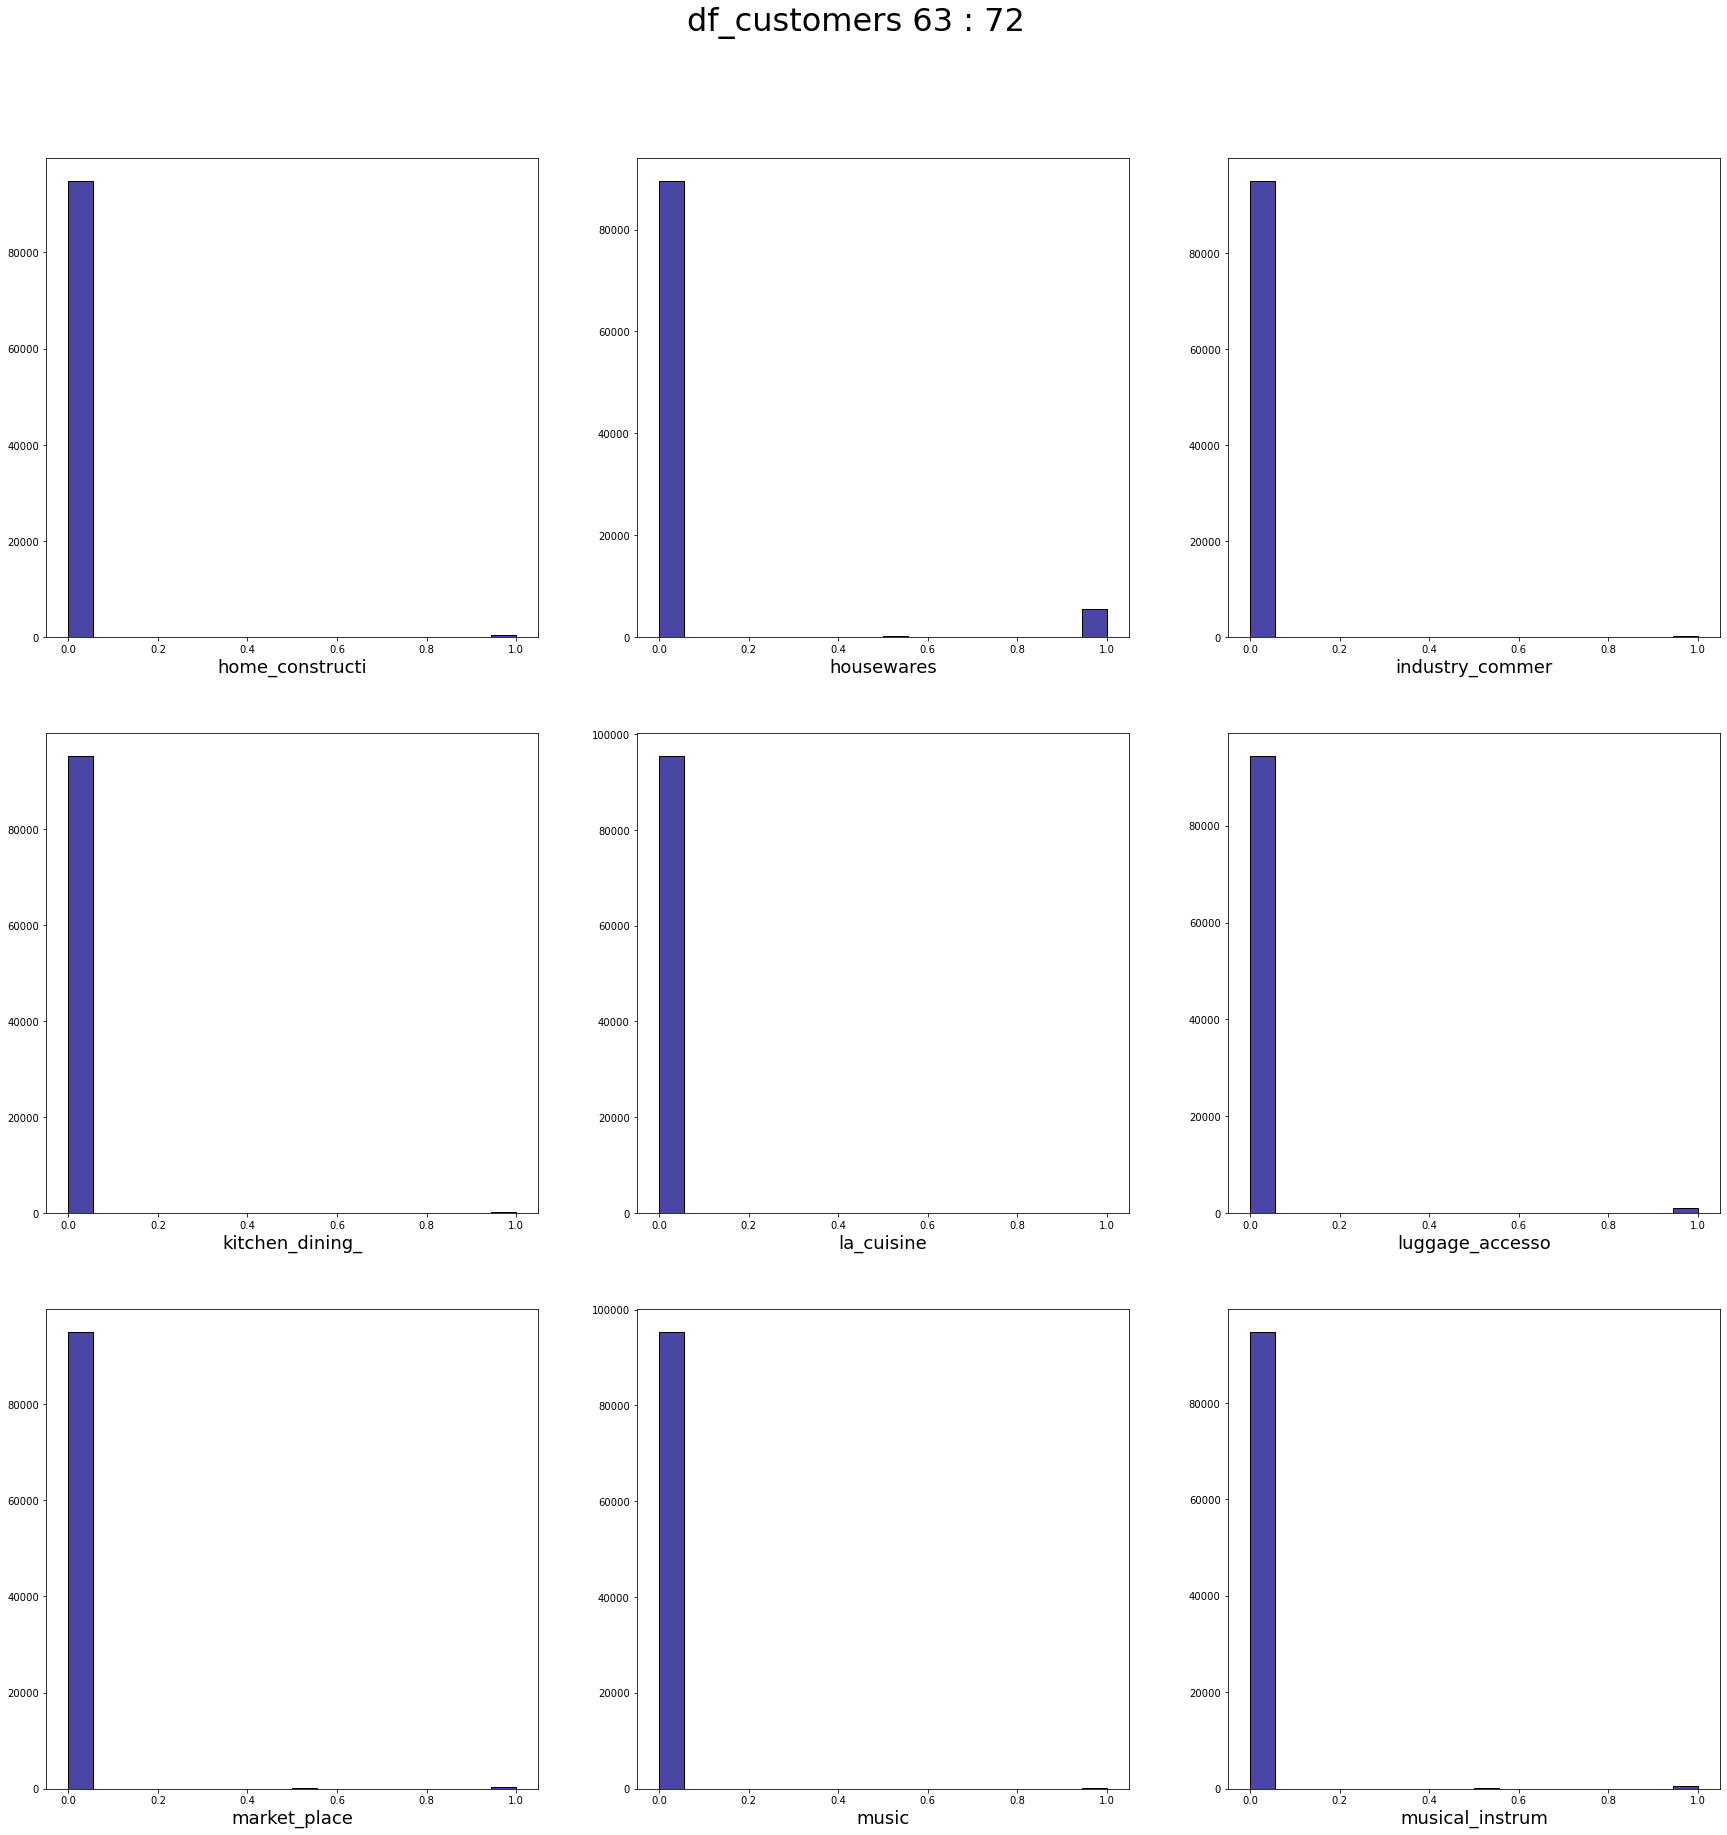

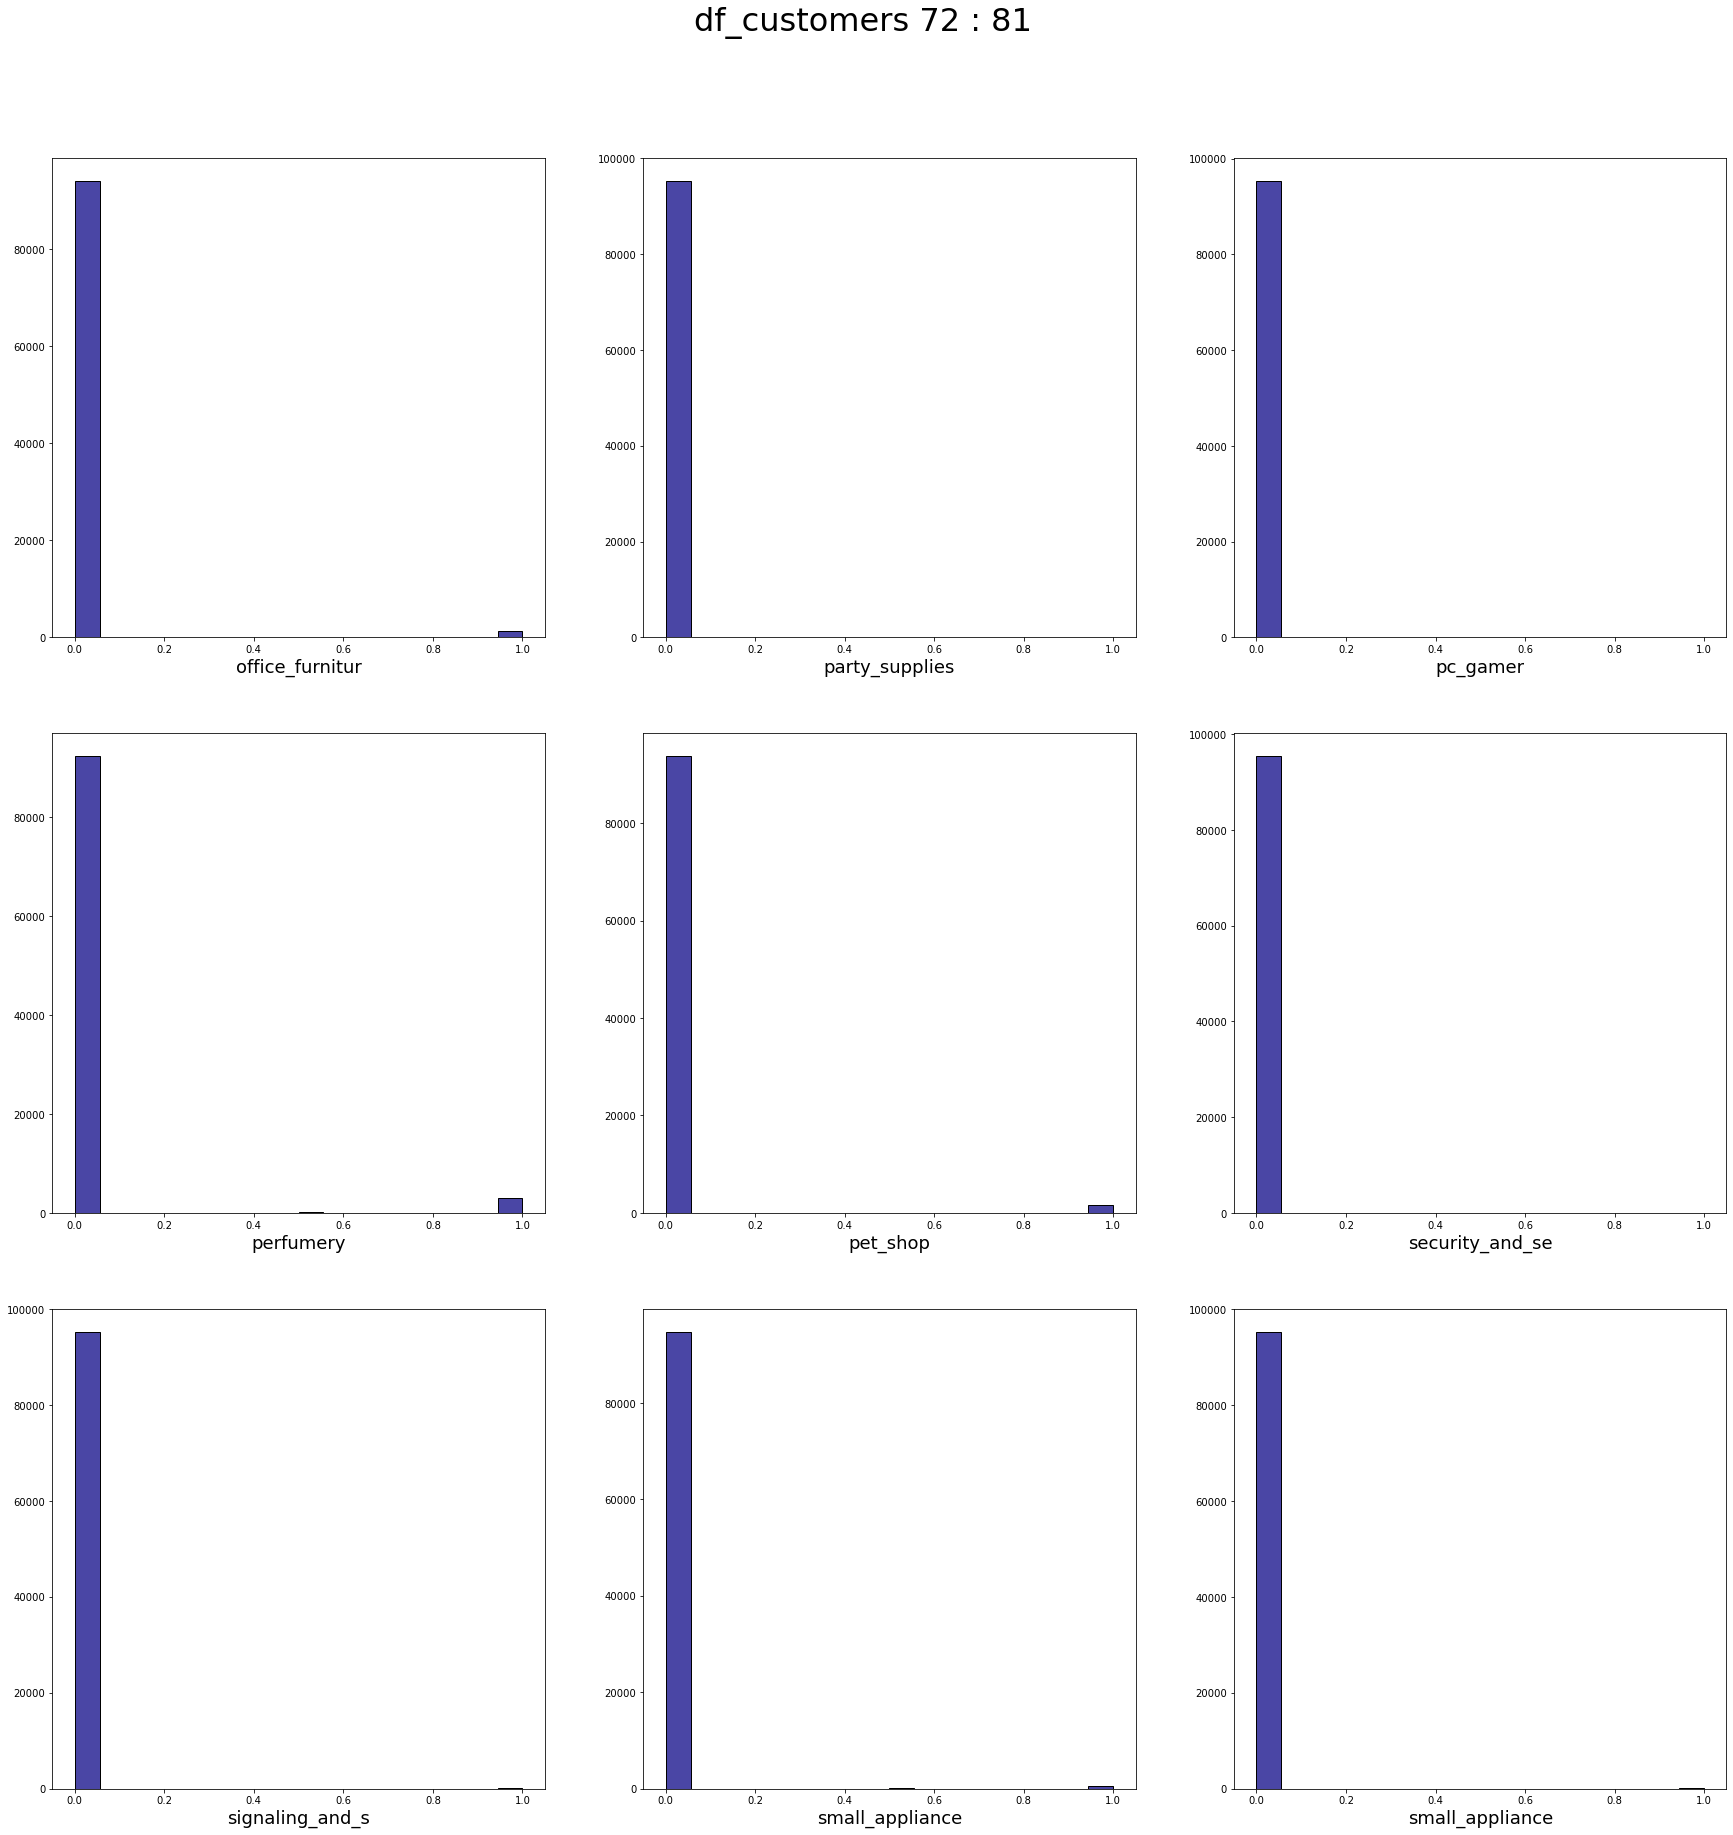

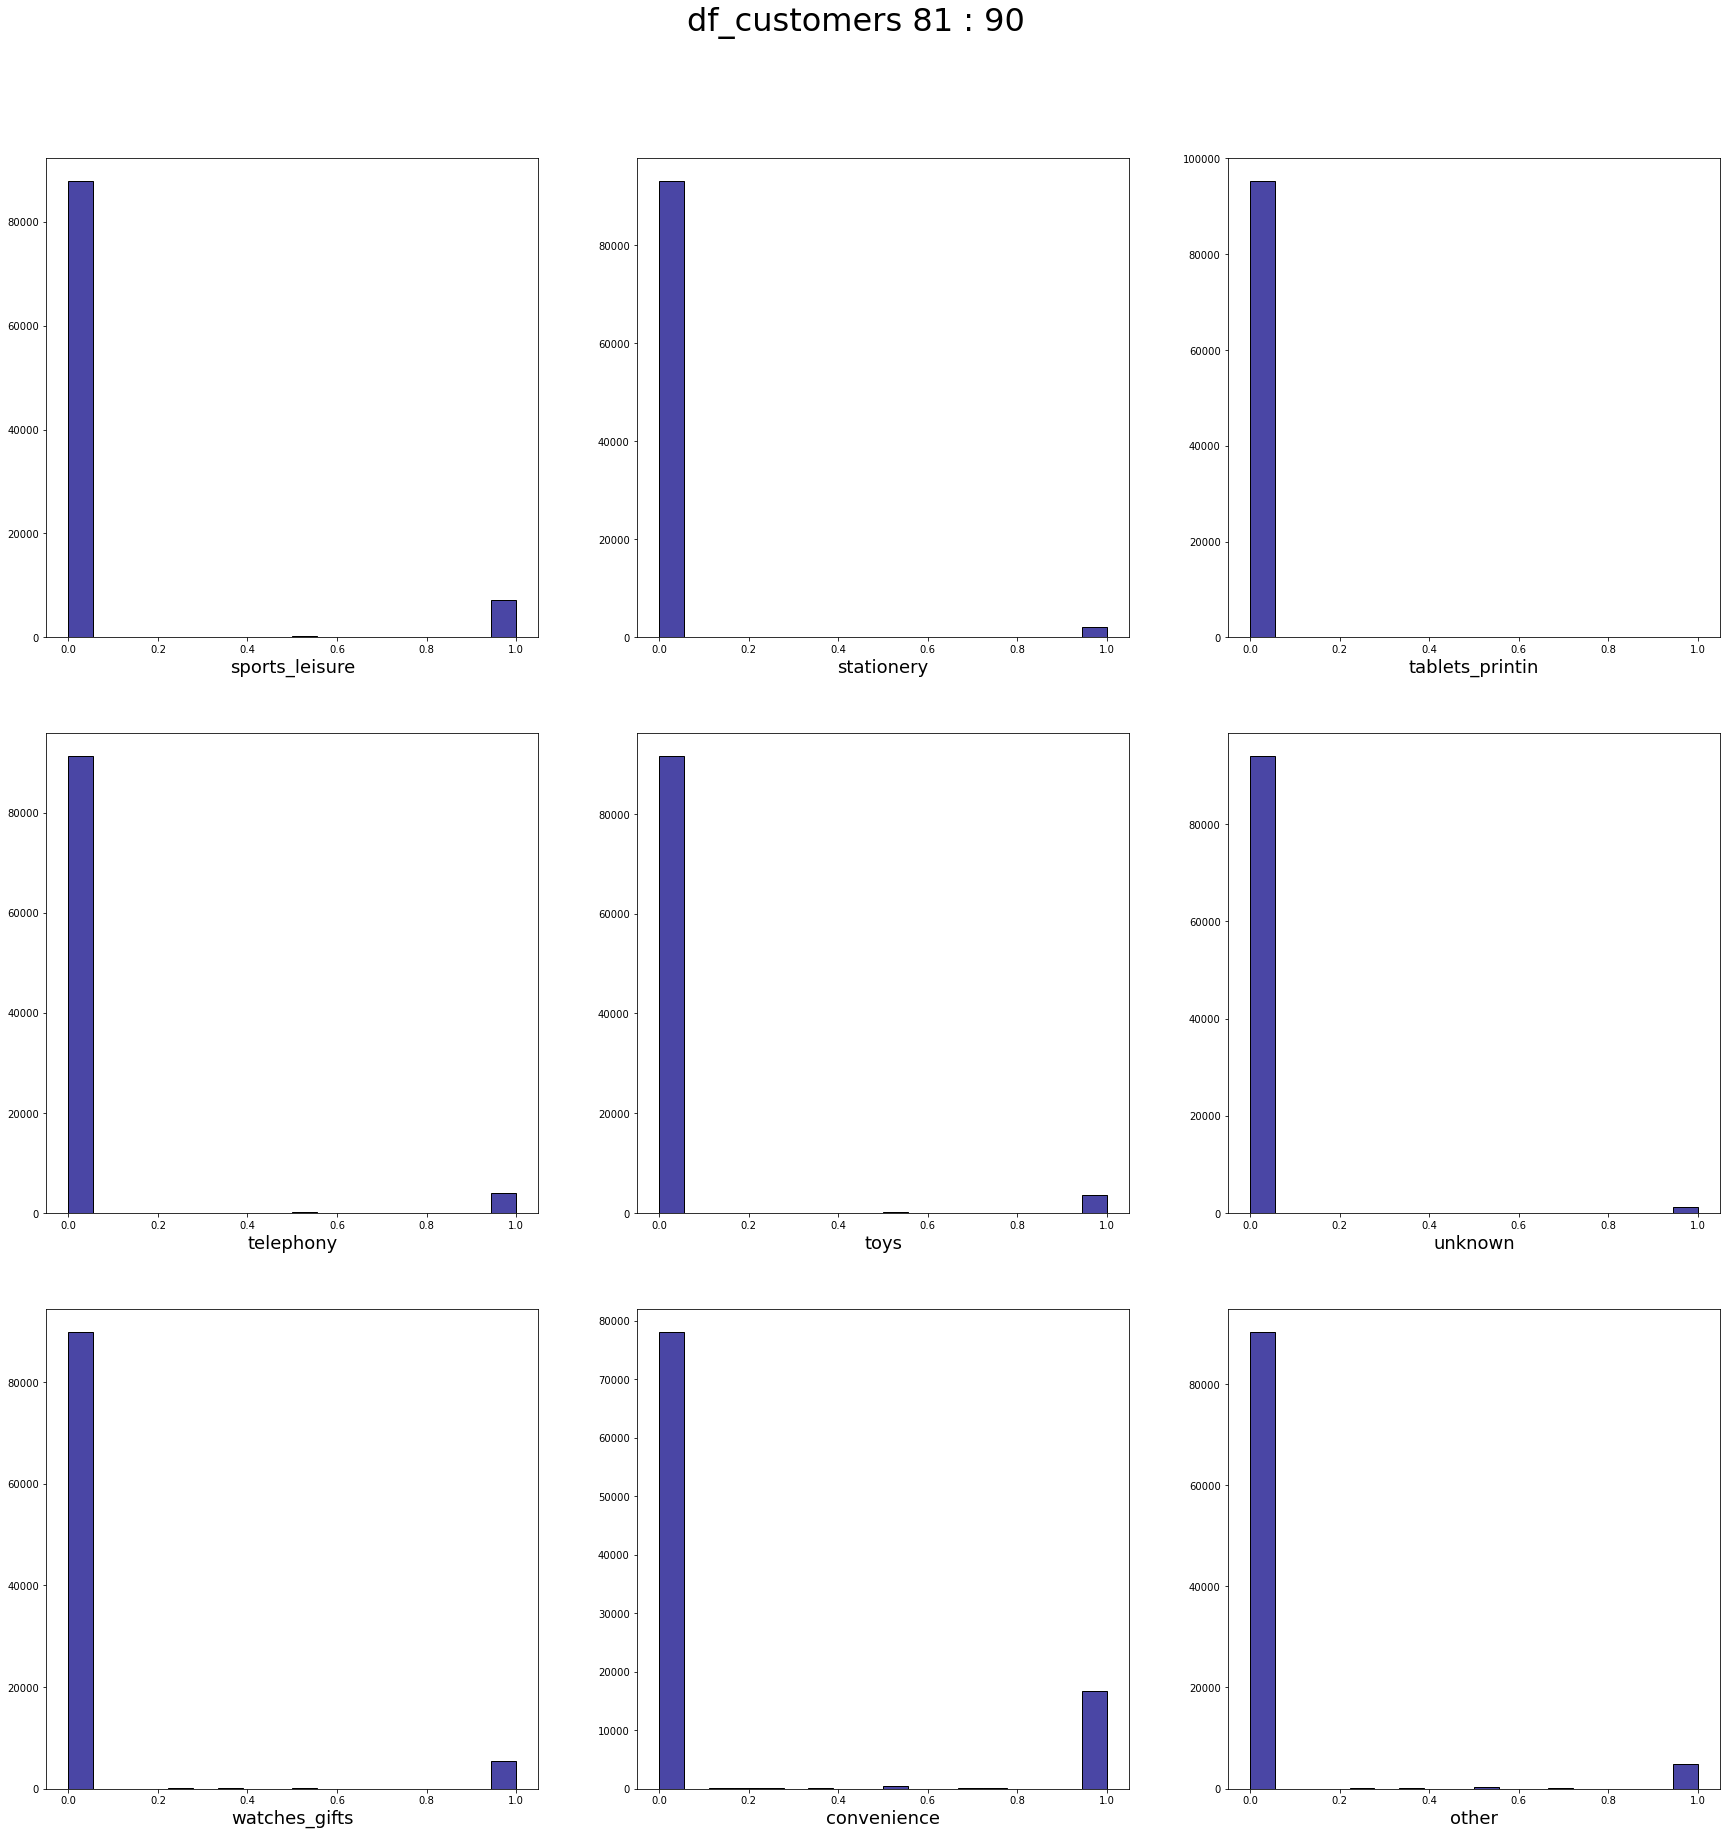

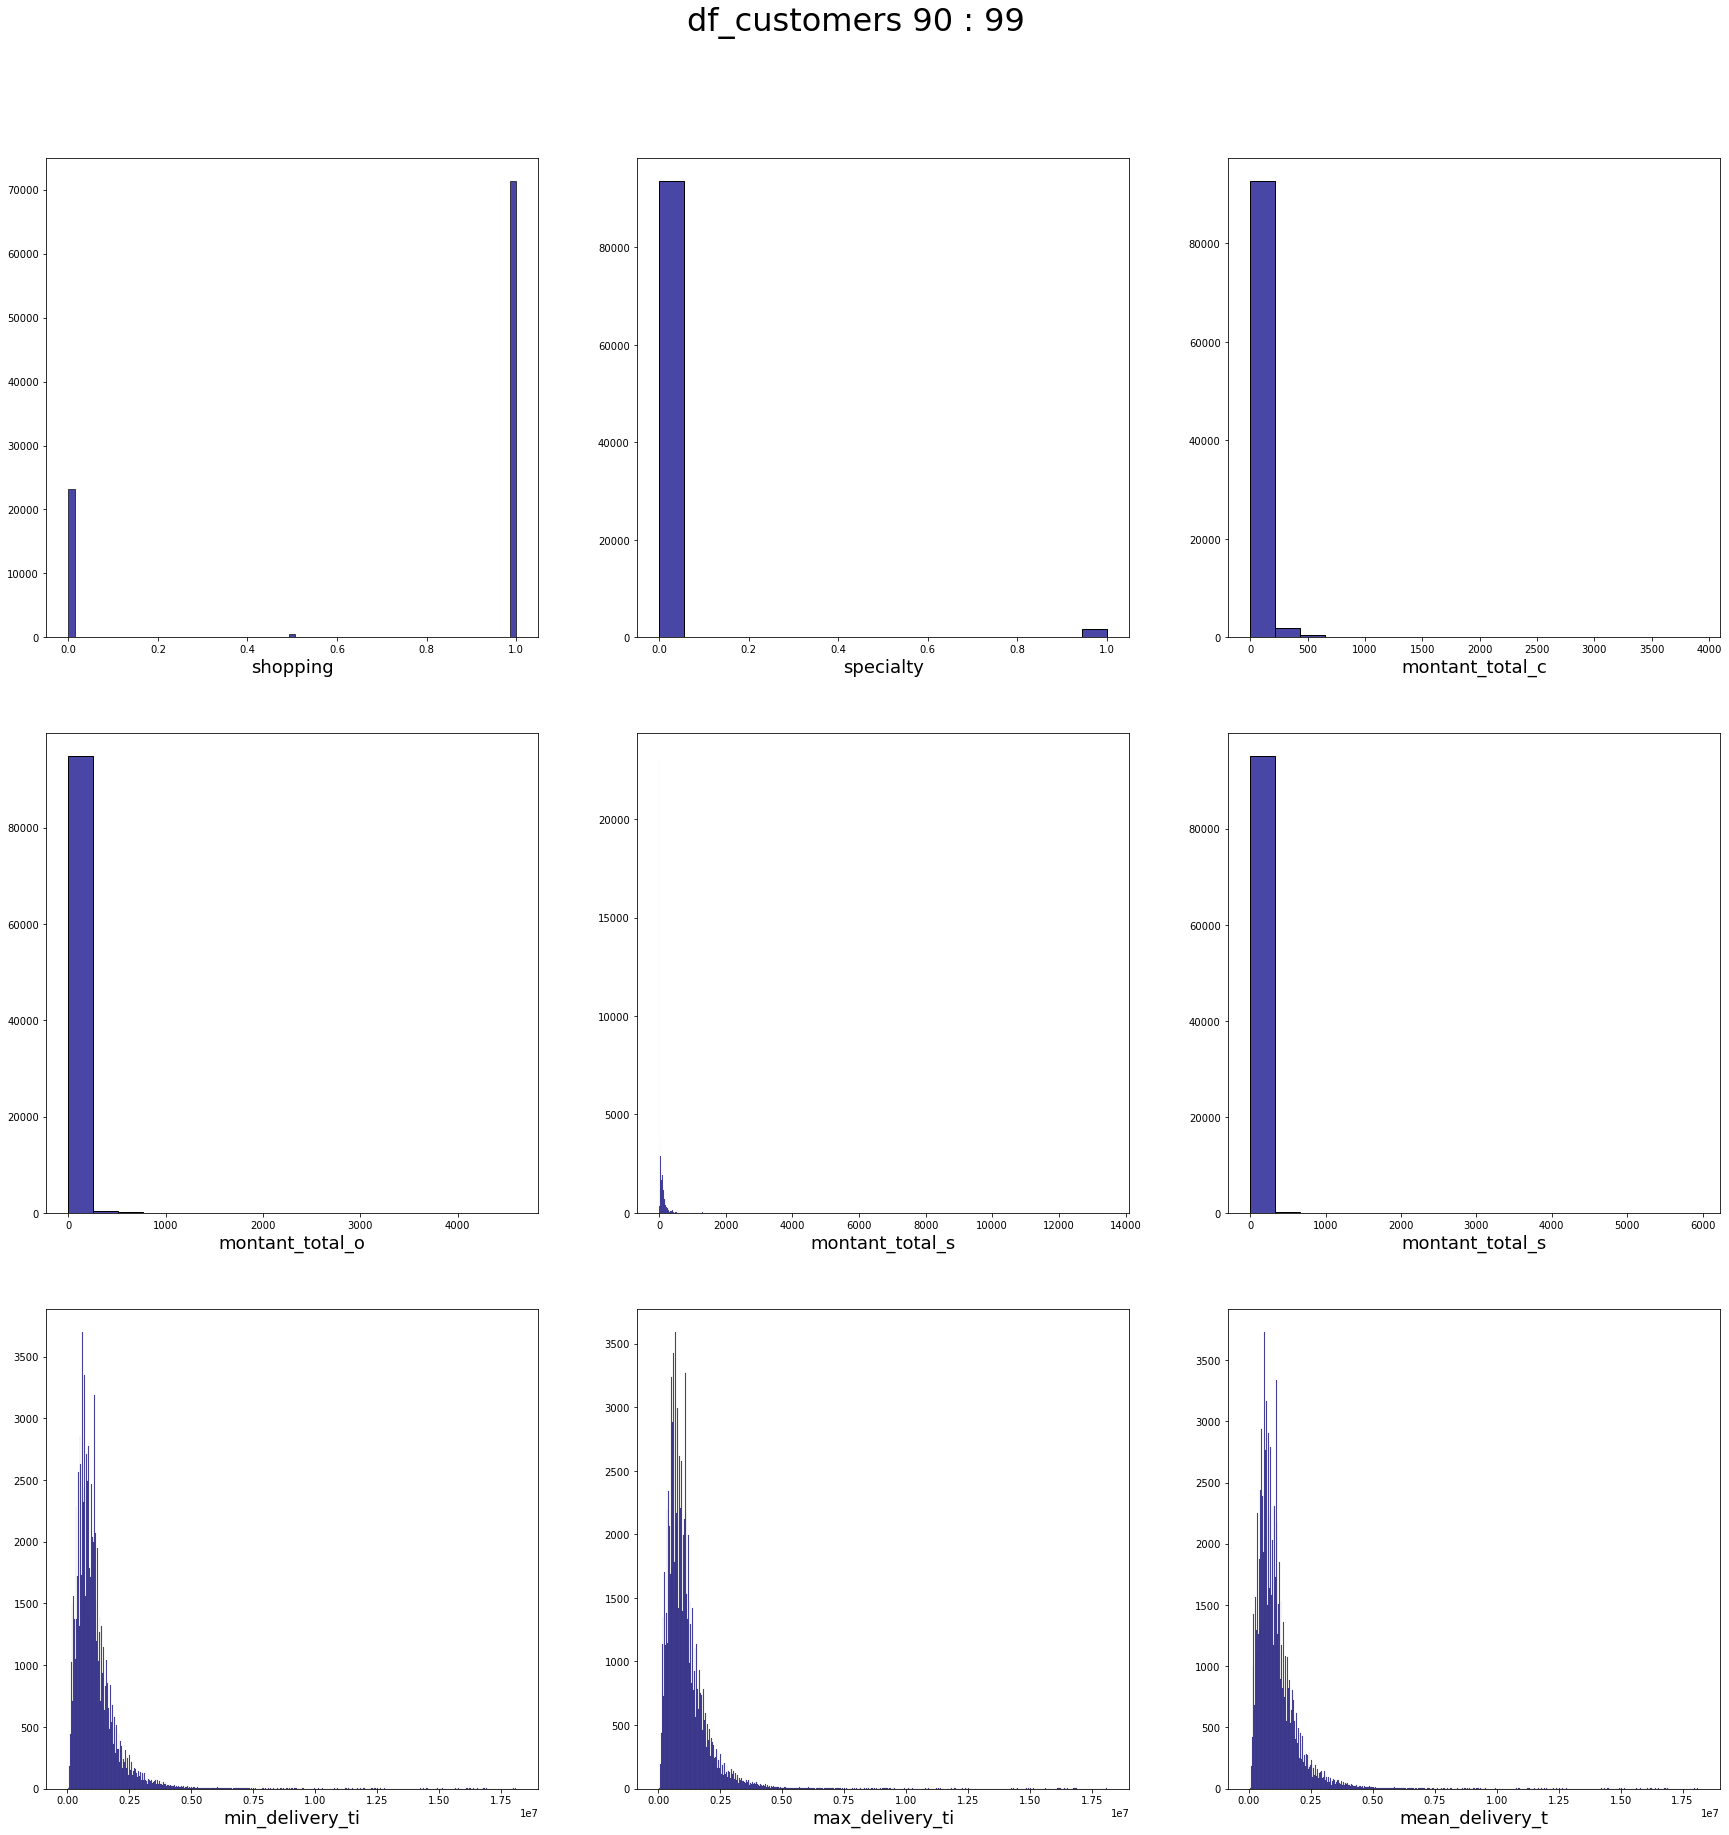

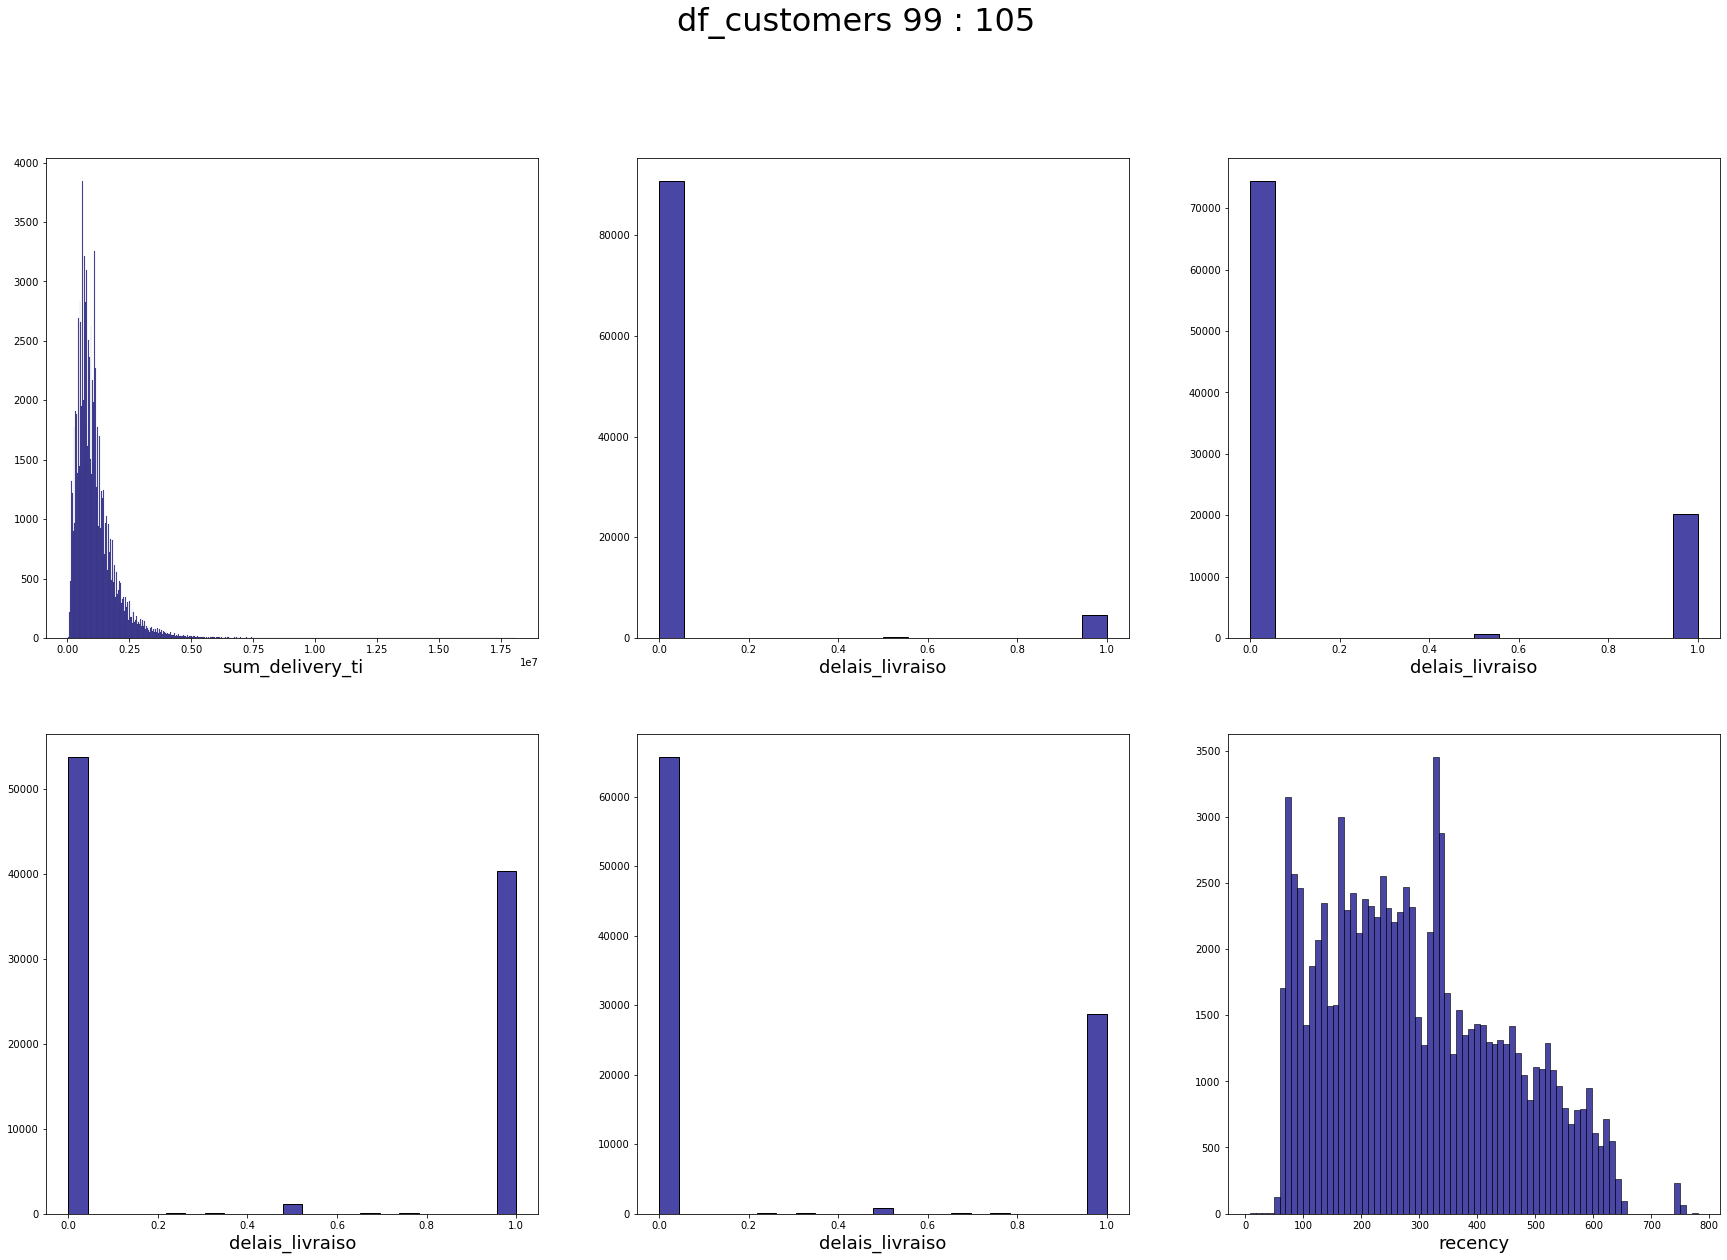

In [104]:
# Affiche en plusieurs bloc carré de taille size_squared la distribution de chaque colonnes dans dataframe
def plot_sghisto_blocks(dataframe, size_squared, title="", color=COLOR_PRIMARY):
    for i, j in zip(
        range(0, dataframe.shape[1], size_squared),
        range(size_squared, dataframe.shape[1] + size_squared, size_squared),
    ):
        if j > dataframe.shape[1]:
            j = dataframe.shape[1]
        title_ij = f"{title} {i} : {j}"
        plot_sghisto(dataframe.iloc[:, i:j], dtype="all", title=title_ij, color=color)


plot_sghisto_blocks(df_customers, 3 * 3, title="df_customers", color=COLOR_PRIMARY)

In [105]:
df_corr = df_customers.corr()

<AxesSubplot:title={'center':'Matrice de corrélation'}>

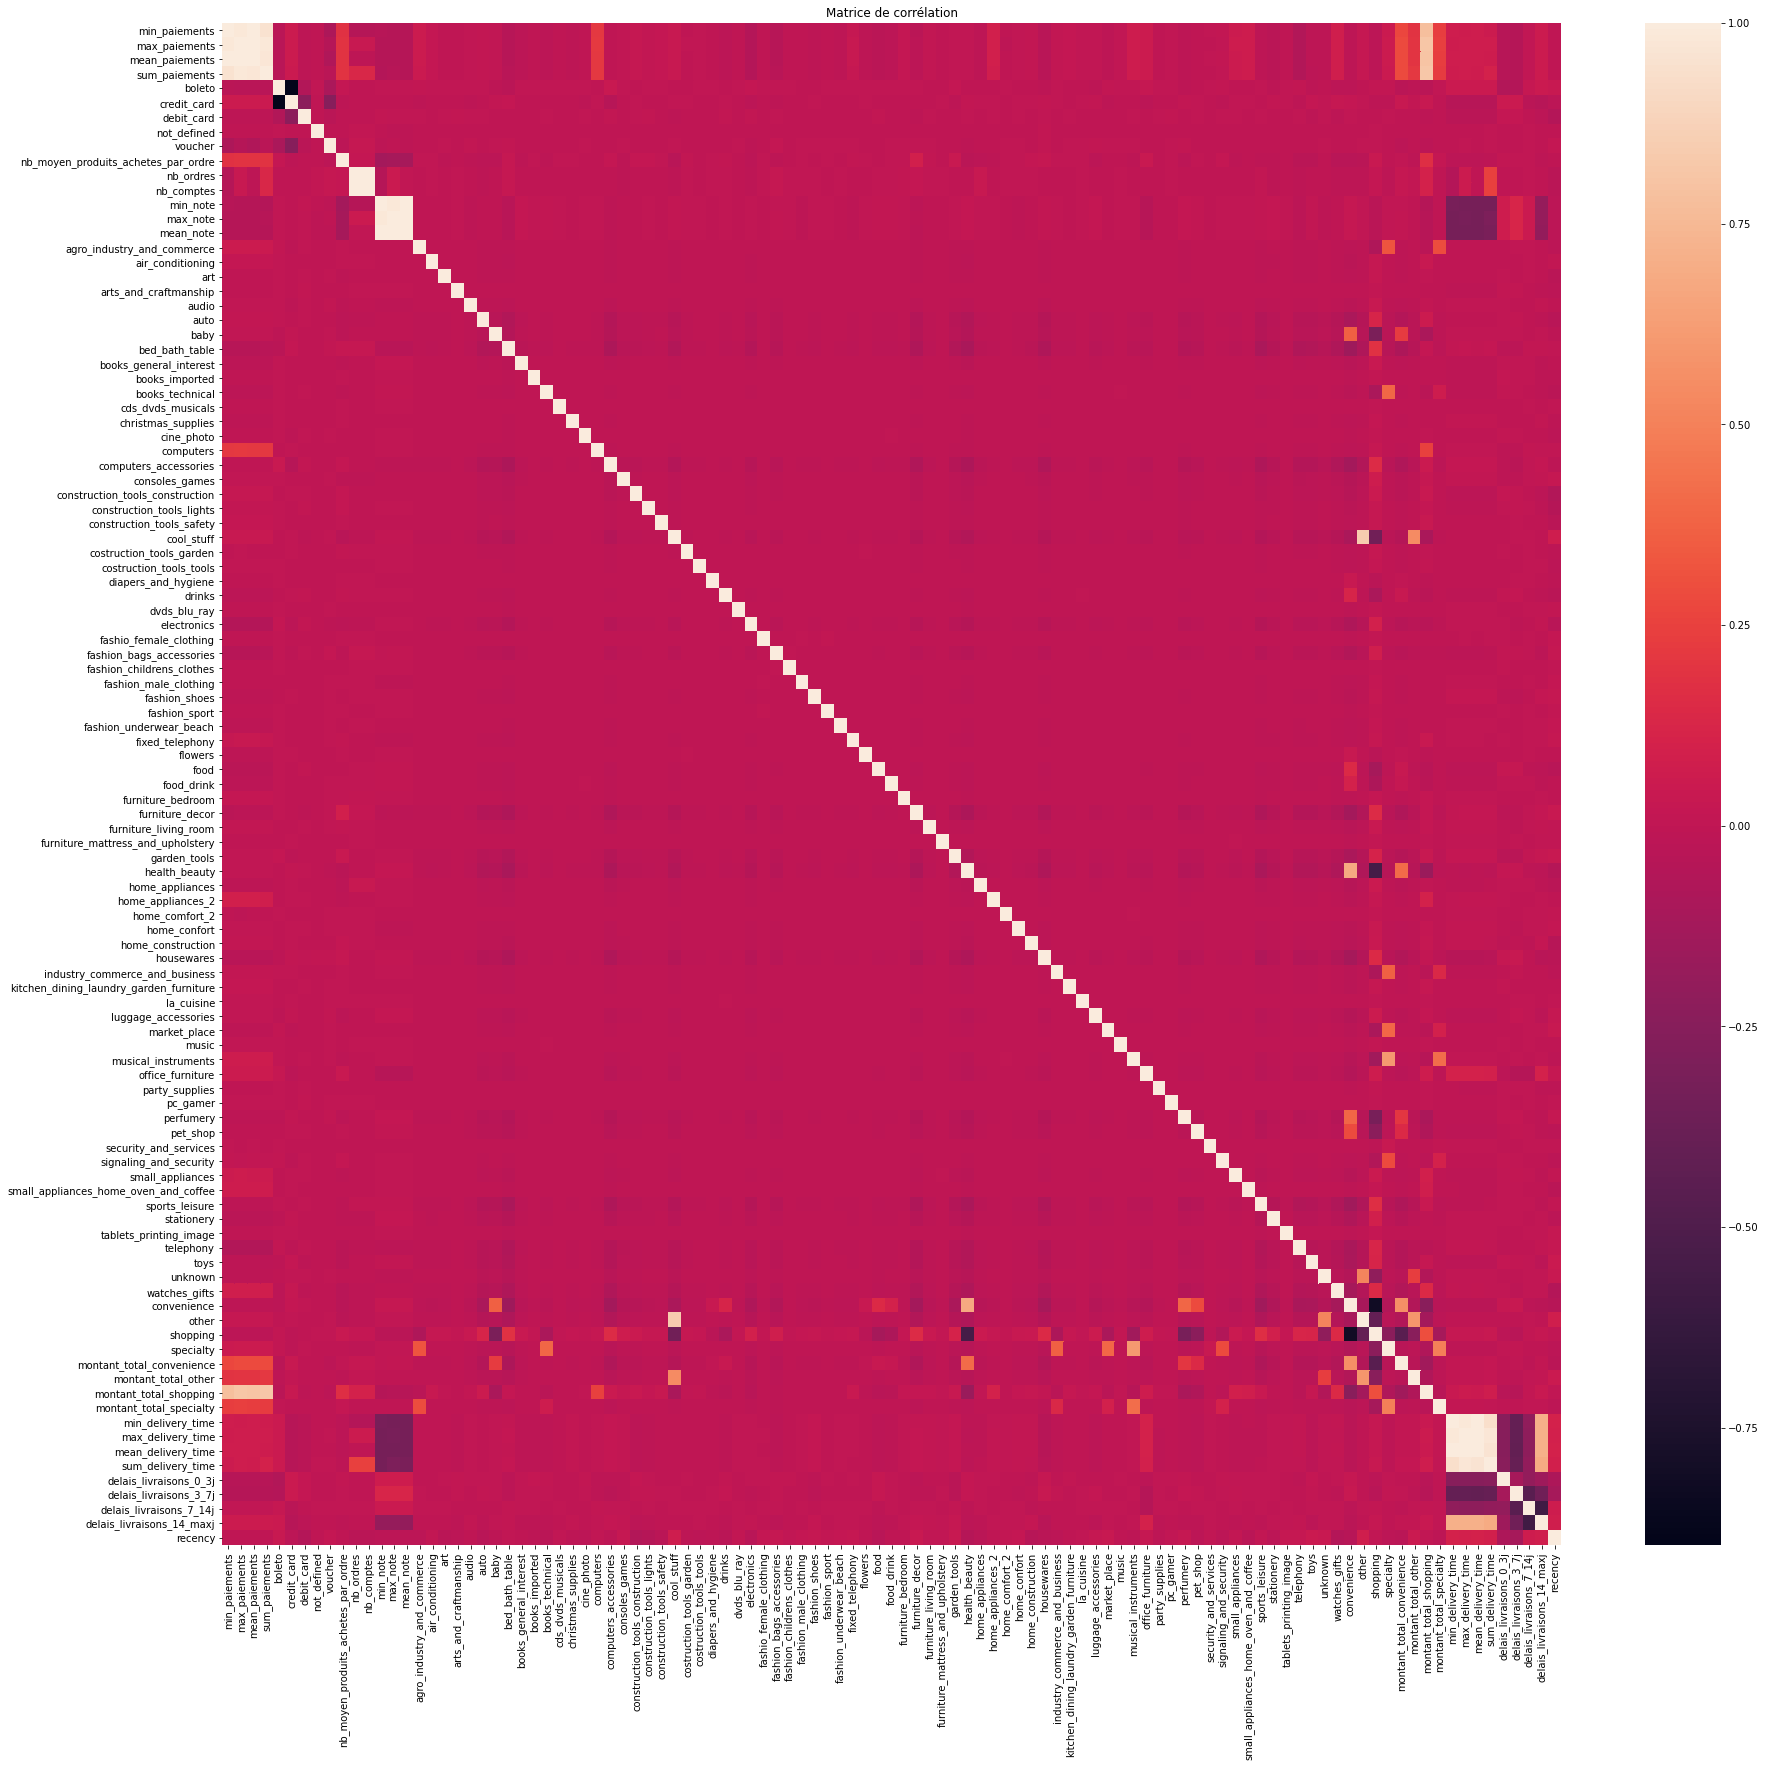

In [106]:
plt.figure(figsize=(30, 28))
plt.title("Matrice de corrélation")
sns.heatmap(df_corr)

In [107]:
# Masque permettant de ne garder que les variables ayant des hautes corrélations (sauf identité)
mask = df_corr[~((df_corr <= 0.7) & (df_corr >= -0.7)) & (df_corr != 1)].notna().any()

<AxesSubplot:title={'center':'Matrice de corrélation - réduite'}>

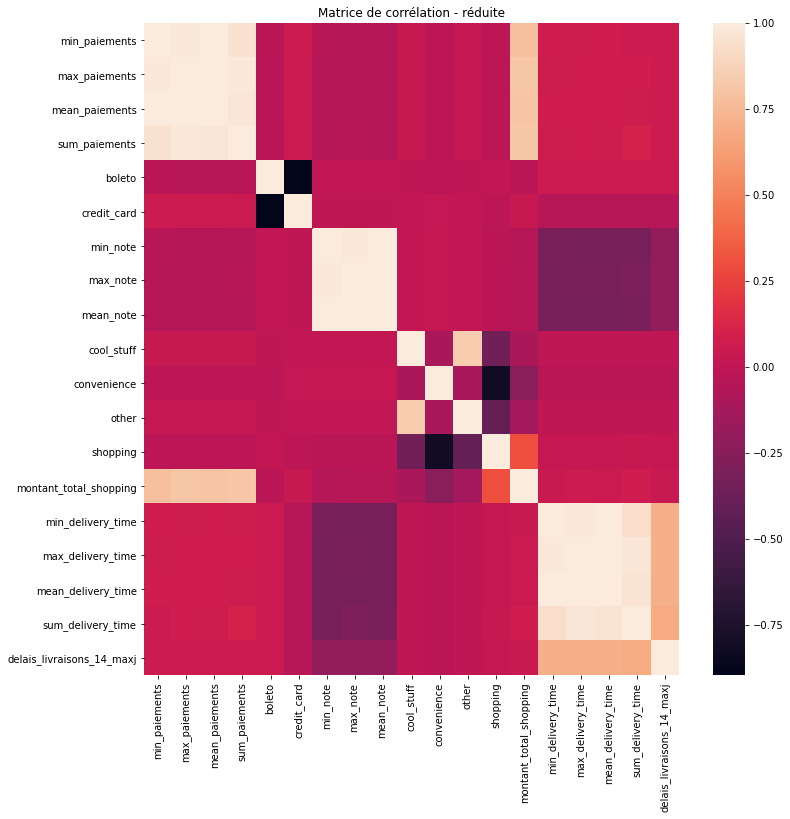

In [108]:
plt.figure(figsize=(12, 12))
plt.title("Matrice de corrélation - réduite")
sns.heatmap(df_corr.loc[mask, mask])

### 4) Traitement pour segmentation avançée - Frequence de mise a jour

On va retirer les 6 derniers mois pour observer si les clusters sont différents.

In [104]:
NOW = dt.datetime(2018, 10, 25)
NOW_MINUS_6MONTHS = dt.datetime(2018, 4, 25)

In [105]:
df_customers_c = df_customers.copy()
df_geolocalisation_c = df_geolocalisation.copy()
df_order_items_c = df_order_items.copy()
df_order_payments_c = df_order_payments.copy()
df_order_reviews_c = df_order_reviews.copy()
df_orders_c = df_orders.copy()
df_products_c = df_products.copy()
df_sellers_c = df_sellers.copy()
df_translation_c = df_translation.copy()

In [106]:
# On retire les ordres de plus de 6 mois
df_orders_c= df_orders_c[df_orders_c['order_purchase_timestamp'] < NOW_MINUS_6MONTHS ]

In [107]:
# On retire les clients sans ordres
client_par_ordres = pd.merge(
    df_customers_c,
    df_orders_c,
    how="left",
    left_on="customer_id",
    right_on="customer_id",
)
client_par_ordres= client_par_ordres[~client_par_ordres['order_id'].isna()]
df_customers_c = df_customers_c.iloc[client_par_ordres.index]

In [108]:
# On execute le même traitement
mapper_categories_to_four_types = {
    "health_beauty": "convenience",
    "computers_accessories": "shopping",
    "auto": "shopping",
    "bed_bath_table": "shopping",
    "furniture_decor": "shopping",
    "sports_leisure": "shopping",
    "perfumery": "convenience",
    "housewares": "shopping",
    "telephony": "shopping",
    "watches_gifts": "shopping",
    "food_drink": "convenience",
    "baby": "convenience",
    "stationery": "shopping",
    "tablets_printing_image": "shopping",
    "toys": "shopping",
    "fixed_telephony": "shopping",
    "garden_tools": "shopping",
    "fashion_bags_accessories": "shopping",
    "small_appliances": "shopping",
    "consoles_games": "shopping",
    "audio": "shopping",
    "fashion_shoes": "shopping",
    "cool_stuff": "other",
    "luggage_accessories": "shopping",
    "air_conditioning": "shopping",
    "construction_tools_construction": "shopping",
    "kitchen_dining_laundry_garden_furniture": "shopping",
    "costruction_tools_garden": "shopping",
    "fashion_male_clothing": "shopping",
    "pet_shop": "convenience",
    "office_furniture": "shopping",
    "market_place": "specialty",
    "electronics": "shopping",
    "home_appliances": "shopping",
    "party_supplies": "shopping",
    "home_confort": "shopping",
    "costruction_tools_tools": "shopping",
    "agro_industry_and_commerce": "specialty",
    "furniture_mattress_and_upholstery": "shopping",
    "books_technical": "specialty",
    "home_construction": "shopping",
    "musical_instruments": "specialty",
    "furniture_living_room": "shopping",
    "construction_tools_lights": "shopping",
    "industry_commerce_and_business": "specialty",
    "food": "convenience",
    "art": "shopping",
    "furniture_bedroom": "shopping",
    "books_general_interest": "shopping",
    "construction_tools_safety": "shopping",
    "fashion_underwear_beach": "shopping",
    "fashion_sport": "shopping",
    "signaling_and_security": "specialty",
    "computers": "shopping",
    "christmas_supplies": "shopping",
    "fashio_female_clothing": "shopping",
    "home_appliances_2": "shopping",
    "books_imported": "shopping",
    "drinks": "convenience",
    "cine_photo": "shopping",
    "la_cuisine": "shopping",
    "music": "shopping",
    "home_comfort_2": "shopping",
    "small_appliances_home_oven_and_coffee": "shopping",
    "cds_dvds_musicals": "shopping",
    "dvds_blu_ray": "shopping",
    "flowers": "convenience",
    "arts_and_craftmanship": "shopping",
    "diapers_and_hygiene": "convenience",
    "fashion_childrens_clothes": "shopping",
    "security_and_services": "specialty",
    "unknown": "other",
    "pc_gamer": "shopping",
}

for key, value in mapper_categories_to_four_types.items():
    index = df_translation_c[
        df_translation_c["product_category_name_english"] == key
    ].index
    df_translation_c.loc[index, "product_type"] = value


df_orders_c["delivery_time"] = (
    df_orders_c["order_delivered_customer_date"]
    - df_orders_c["order_purchase_timestamp"]
)

delivery_time_mean = df_orders_c[
    df_orders_c["order_delivered_customer_date"]
    > df_orders_c["order_purchase_timestamp"]
]["delivery_time"].mean()

def check_valeurs(x):
    if x.total_seconds() < 0:
        x = delivery_time_mean
    return x

# correction des valeurs aberrantes, replace par la moyenne
df_orders_c["delivery_time"] = df_orders_c.loc[:, "delivery_time"].map(check_valeurs)

def conversion_timedelta(x):
    return x.total_seconds()

# conversion en seconde
df_orders_c["delivery_time_s"] = df_orders_c.loc[:, "delivery_time"].map(
    conversion_timedelta
)

ordres_par_client = pd.merge(
    df_orders_c,
    df_customers_c,
    how="left",
    left_on="customer_id",
    right_on="customer_id",
)

paiements_ordres_par_client = pd.merge(
    df_order_payments_c,
    ordres_par_client,
    how="left",
    left_on="order_id",
    right_on="order_id",
)

df_order_items_c = pd.merge(
    df_order_items_c,
    df_products_c,
    how="left",
    left_on="product_id",
    right_on="product_id",
)
df_order_items_c = pd.merge(
    df_order_items_c,
    df_translation_c,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name",
)

produits_par_ordre = pd.merge(
    df_orders_c, df_order_items_c, how="left", left_on="order_id", right_on="order_id"
)


produits_par_client = pd.merge(
    produits_par_ordre,
    df_customers_c,
    how="left",
    left_on="customer_id",
    right_on="customer_id",
)


reviews_par_client = pd.merge(
    df_order_reviews_c,
    ordres_par_client,
    how="left",
    left_on="order_id",
    right_on="order_id",
    validate="many_to_one",
)


# Nombre d'ordres par client
nb_ordres = ordres_par_client.groupby("customer_unique_id").agg(
    nb_ordres=("order_id", "count")
)


# stats sur paiements par client
paiements = paiements_ordres_par_client.groupby(["customer_unique_id"]).agg(
    min_paiements=("payment_value", "min"),
    max_paiements=("payment_value", "max"),
    mean_paiements=("payment_value", "mean"),
    sum_paiements=("payment_value", "sum"),
)


# Nombre de paiements pour differents moyens de paiement par client (boleto	credit_card	debit_card	not_defined	voucher)
nb_paiements_pour_differents_moyens_de_paiement = pd.crosstab(
    paiements_ordres_par_client["customer_unique_id"],
    paiements_ordres_par_client["payment_type"],
)


# Nombre de paiements
nb_paiements = nb_paiements_pour_differents_moyens_de_paiement.sum(axis=1)

# Ratio des differents moyens de paiement par client
ratio_differents_moyens_de_paiement = nb_paiements_pour_differents_moyens_de_paiement.divide(
    nb_paiements, axis=0
)

# verification du ratio
ratio_differents_moyens_de_paiement.sum(axis=1).describe()

# Nombre de produits achetés par client
nb_produits_achetes = produits_par_client.groupby("customer_unique_id").agg(
    nb_produits_achetes=("order_item_id", "count")
)


# Certains clients ont un ordre mais pas de produits achetés car l'ordre a été annulé ou indisponible
ordres_par_client[
    ordres_par_client["customer_unique_id"] == "009b0127b727ab0ba422f6d9604487c7"
]

# Nombre moyen de produits achetés par ordre et par client
nb_moyen_produits_achetes_par_ordre = (
    nb_produits_achetes["nb_produits_achetes"] / nb_ordres["nb_ordres"]
).to_frame(name="nb_moyen_produits_achetes_par_ordre")

# Nombre de comptes clients par client
nb_comptes = df_customers_c.groupby("customer_unique_id").agg(
    nb_comptes=("customer_id", "count")
)


# stats notes du client
notes = reviews_par_client.groupby("customer_unique_id").agg(
    min_note=("review_score", "min"),
    max_note=("review_score", "max"),
    mean_note=("review_score", "mean"),
)


# Nombre d'ordres pour chaque categories
nb_ordres_categories = pd.crosstab(
    produits_par_client["customer_unique_id"],
    produits_par_client["product_category_name_english"],
)


# Nombre d'ordres des clients ayants commandés
nb_ordres_not_na = nb_ordres_categories.sum(axis=1)

# Ratio des differents moyens de paiement par client
ratio_ordres_categories = nb_ordres_categories.divide(nb_ordres_not_na, axis=0)

# verification du ratio
ratio_ordres_categories.sum(axis=1).sum()

# Nombre d'ordres pour differents types de produits ( 1-4)
nb_ordres_types = pd.crosstab(
    produits_par_client["customer_unique_id"], produits_par_client["product_type"]
)

# Ratio des differents types de produits
ratio_ordres_types = nb_ordres_types.divide(nb_ordres_types.sum(axis=1), axis=0)

# verification du ratio
ratio_ordres_types.sum(axis=1).sum()

# Montant total depensé par client pour differents types de produits ( 1-4) hors frais

montant_total_types = produits_par_client.groupby(
    ["customer_unique_id", "product_type"]
).agg(montant_total_types=("price", "sum"))
montant_total_types = montant_total_types.unstack().fillna(0)
montant_total_types = montant_total_types["montant_total_types"]
montant_total_types = montant_total_types.add_prefix("montant_total_")


# stats sur delais de livraison par client
delais_livraison = ordres_par_client.groupby(["customer_unique_id"]).agg(
    min_delivery_time=("delivery_time_s", "min"),
    max_delivery_time=("delivery_time_s", "max"),
    mean_delivery_time=("delivery_time_s", "mean"),
    sum_delivery_time=("delivery_time_s", "sum"),
)


# buckets sur delais de livraison par client
max_delais_livraison = delais_livraison["max_delivery_time"].max()
# 0-3j-7j-14j-60j
bins = pd.IntervalIndex.from_tuples(
    [(0, 259200), (259200, 604800), (604800, 1209600), (1209600, max_delais_livraison)]
)

delais_livraisons_buckets = (
    ordres_par_client.groupby(
        ["customer_unique_id", pd.cut(ordres_par_client.delivery_time_s, bins=bins)]
    )
    .size()
    .unstack()
)

# rename columns
columns = pd.CategoricalIndex(
    [
        "delais_livraisons_0_3j",
        "delais_livraisons_3_7j",
        "delais_livraisons_7_14j",
        "delais_livraisons_14_maxj",
    ]
)
delais_livraisons_buckets.columns = columns

# Ratio delais_livraisons_buckets
ratio_delais_livraisons_buckets = delais_livraisons_buckets.divide(
    delais_livraisons_buckets.sum(axis=1), axis=0
)

ratio_delais_livraisons_buckets.describe()

# verification du ratio
ratio_delais_livraisons_buckets.sum(axis=1).sum()

# recency
NOW = dt.datetime(2018, 10, 25)

recency = ordres_par_client.groupby("customer_unique_id").agg(
    recency=("order_purchase_timestamp", lambda x: (NOW - x.max()).days)
)


list_df_features = [
    paiements,
    ratio_differents_moyens_de_paiement,
    nb_moyen_produits_achetes_par_ordre,
    nb_ordres,
    nb_comptes,
    notes,
    ratio_ordres_categories,
    ratio_ordres_types,
    montant_total_types,
    delais_livraison,
    ratio_delais_livraisons_buckets,
    recency,
]

df_customers_6m = pd.DataFrame({})
for df in list_df_features:
    df_customers_6m = pd.merge(
        df_customers_6m, df, how="outer", left_index=True, right_index=True
    )

df_customers_6m.isna().sum()

# Suppression des valeurs ayant un probleme d'intégrité sur orderid (hard delete sur bdd)
# Personne ayant commandé et payé puis annulé
df_customers_6m = df_customers_6m.dropna()

df_customers_6m.to_csv("data/df_customers_6m.csv")